In [97]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
class NerualNetwork:
    
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        # activation function is the sigmoid function
     
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)

        #Matrix of hiddenNodes x InputNodes, H rows, I col 
        self.whi = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) #(numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        #Matrix of outputNodes x hiddenNodes, O rows, H col 
        self.ohw = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) #(numpy.random.rand(self.onodes, self.hnodes) - 0.5) 
        self.lr = learningRate
        

    def train(self,input_list,target_list):
        # convert inputs list to 2d array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        #print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.ohw, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        
         # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.ohw.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.ohw += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        #print("Matrix of outputNodes x hiddenNodes rows: {} col : {}, array shape: {} \n {}".format(self.onodes,self.hnodes,self.ohw.shape, self.ohw)) #debug
        # update the weights for the links between the input and hidden layers
        self.whi += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        #print("Matrix of hiddenNodes x InputNodes, {} rows, {} col: {}, array shape: {}".format(self.hnodes,self.inodes,self.whi.shape,self.whi)) #debug

    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        #print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.ohw, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T

        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.ohw.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)

        # calculate the signal out of the input layer
        inputs = np.dot(self.whi.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs

<h1><center>self.inodes</center></h1>

self.inodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of inputNodes x 1. 

$$
\mathbf{self.indoes}
=
\begin{bmatrix}
{inputNode_1}
\\ \vdots & \\ 
{inputNode_n}
\end{bmatrix}
$$

<h1><center>self.hnodes</center></h1>

self.hnodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of hiddenNodes x 1. 

$$
\mathbf{self.hnodes}
=
\begin{bmatrix}
{hiddenNodes_1}
\\ \vdots & \\ 
{hiddenNodes_n}
\end{bmatrix}
$$

<h1><center>self.onodes</center></h1>

self.onodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of outputNodes x 1. 

$$
\mathbf{self.onodes}
=
\begin{bmatrix}
{outputNodes_1}
\\ \vdots & \\ 
{outputNodes_n}
\end{bmatrix}
$$

In [99]:
inputNodes = 3
hiddenNodes = 3
outputNodes = 3

learningRate = 0.3

NN = NerualNetwork(inputNodes,hiddenNodes,outputNodes,learningRate)

In [100]:
print("Input Nodes: {} , Hidden Nodes: {}, Output Nodes: {} , Learning Rate: {} \n".format(NN.inodes,NN.hnodes,NN.onodes,NN.lr)) #e
print("Input to Hidden Connection Matrix: \n {} \n\n Hidden to Output Connection Matrix: \n {}".format(NN.whi,NN.ohw))

Input Nodes: 3 , Hidden Nodes: 3, Output Nodes: 3 , Learning Rate: 0.3 

Input to Hidden Connection Matrix: 
 [[-0.20726517  1.56067729  0.08015367]
 [-1.11198794 -0.11473154  0.74906365]
 [-0.09940229 -0.25043205 -0.21753577]] 

 Hidden to Output Connection Matrix: 
 [[ 0.48951989 -0.34241989 -0.01484499]
 [-0.50792418 -0.10363869 -0.90450602]
 [ 0.01532663  0.0381302  -0.2665904 ]]


In [101]:
NN.query([1,2,3])

array([[0.55535892],
       [0.318227  ],
       [0.49565409]])

In [102]:
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_train_100.csv",'r')
mnist_train_100 = data_file.readlines()
data_file.close()

In [103]:
len(mnist_train_100)

100

In [104]:
#Create the graph of the index from the dataset to visualize data
def createGraph(index,image_array):
    all_nums = list()
    all_labels = list()
    all_labels = image_array[index][0]
    image_array = image_array[index].split(',')
    for i in image_array:
        all_nums.append(i)
    #print('label: {}'.format(all_labels[index]))
    #print('all_nums[{}] : {}'.format(index,all_nums[index]))
    #debugprint('type of all_nums[{}] : \n {}'.format(index,type(all_nums[index]))) #debug
    image_array = np.asfarray(all_nums[1:]).reshape((28,28))
    print("label: {}".format(all_labels[0]))
    #print(image_array) #debug
    plt.imshow(image_array,cmap='Greys',interpolation='None')
    
#Create the graph of the index from the dataset to visualize data
def createGraphNomalized(index,image_array, normalized_labels):
    showarray = image_array[index].reshape((28,28))
    print("label: {}".format(normalized_labels[index]))
    plt.imshow(showarray,cmap='Greys',interpolation='None')    

#Normalization is to map input ranges to ranges of activation function of nodes.
def normalizeData(data_list):
    scaled_input = [None] * len(data_list)
    scaled_input_labels = [None] * len(data_list)
    for x in range(len(data_list)):
        scaled_input[x] = list()
        for y in data_list[x]:
            #print("Data_list[{}] /n {}".format(x,data_list[x])) #debug
            all_values = data_list[x].split(',')
            scaled_input_labels[x] = all_values[0]
            scaled_input[x] = (np.asfarray(all_values[1:]) / 255 * 0.99 ) +0.01 
            #print("scaled_input[{}] /n {}".format(x,scaled_input[x])) #debug
    return scaled_input, scaled_input_labels

def normalizeData2(data_list):
    scaled_input = [None] * len(data_list)
    scaled_input_labels = [None] * len(data_list)
    for x in range(len(data_list)):
        scaled_input[x] = list()
        #print("scaled_input: {}".format(data_list[x]))
        all_values = data_list[x].split(',')
        scaled_input_labels[x] = all_values[0]
        scaled_input[x] = (np.asfarray(all_values[1:]) / 255 * 0.99 ) +0.01 
        #print("scaled_input[{}] /n {}".format(x,scaled_input[x])) #debug
    return scaled_input, scaled_input_labels

In [105]:
normalizeData2(mnist_train_100)

([array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
         0.01      , 0.01      , 0

label: 4


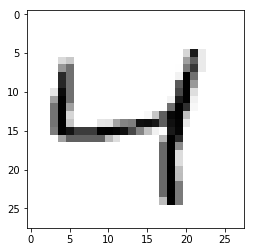

In [106]:
createGraph(2,mnist_train_100) #image with raw values matrix of 28x28 range of 0 - 255 to rep darkness of each pixel 

<h1><center>Image matrix</center></h1>


\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

In [107]:
normalized,normalized_labels = normalizeData2(mnist_train_100)

label: 5


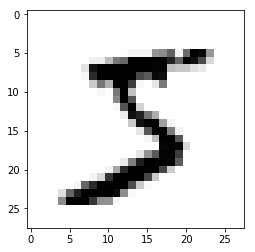

In [108]:
createGraphNomalized(0,normalized,normalized_labels)

In [158]:
inputNodes = 784 #each pixel will be used as an input the image is 28*28=784 pixels
hiddenNodes = 100 #value much more aribrary and I will try experimenting with it
outputNodes = 10 #can label a number from 0-9 hence 10 output nodes

learningRate = 0.3

MNISTNN = NerualNetwork(inputNodes,hiddenNodes,outputNodes,learningRate)

In [159]:
for x in range(len(normalized)): #tranining the network on the normalized data with loop
    targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
    inputs = normalized[x] #selecting array of 784 pixels for input
    targets[int(normalized_labels[x])] = 0.99 #setting correct output array configuration 
    MNISTNN.train(inputs,targets) #training on 1 entry 

In [160]:
#testing data
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_test_10.csv",'r')
mnist_test_10 = data_file.readlines()
data_file.close()

In [161]:
normalized_test,normalized_labels_test = normalizeData2(mnist_test_10)

label: 1


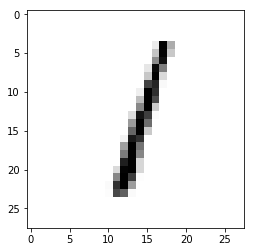

In [162]:
createGraphNomalized(2,normalized_test,normalized_labels_test)

In [163]:
def printQuery(result_array):
    best_answer = 0
    for i in range(len(result_array)):
        print("{} : {} %".format(i,result_array[i][0] * 100))
    print("Best Guess: {}".format(np.argmax(result_array)))

In [164]:
printQuery(MNISTNN.query(normalized_test[2]))

0 : 5.380701988144597 %
1 : 93.5379129598029 %
2 : 1.5119715446891655 %
3 : 4.8388299919319495 %
4 : 1.956170197792907 %
5 : 6.586732513965268 %
6 : 2.9805755559513583 %
7 : 8.863686008971392 %
8 : 6.663996591082484 %
9 : 0.36433897262564924 %
Best Guess: 1


In [165]:
def trackResults(test_array, label_array,NN):
    scorecard = []
    for i in range(len(test_array)):
        correct_label = int(label_array[i])
        print("loop: {}".format(i))
        print("correct label: {}".format(correct_label))
        outputs = NN.query(test_array[i])
        label = np.argmax(outputs)
        print("Network answer: {} \n".format(label))
        if(label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
    scorecard_array = np.asarray(scorecard)
    print("performance = {} %".format(scorecard_array.sum() / scorecard_array.size * 100))

In [166]:
trackResults(normalized_test,normalized_labels_test,MNISTNN)

loop: 0
correct label: 7
Network answer: 7 

loop: 1
correct label: 2
Network answer: 6 

loop: 2
correct label: 1
Network answer: 1 

loop: 3
correct label: 0
Network answer: 0 

loop: 4
correct label: 4
Network answer: 4 

loop: 5
correct label: 1
Network answer: 1 

loop: 6
correct label: 4
Network answer: 4 

loop: 7
correct label: 9
Network answer: 4 

loop: 8
correct label: 5
Network answer: 4 

loop: 9
correct label: 9
Network answer: 7 

performance = 60.0 %


In [167]:
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_train.csv",'r')
mnist_train_full = data_file.readlines()
data_file.close()

label: 5


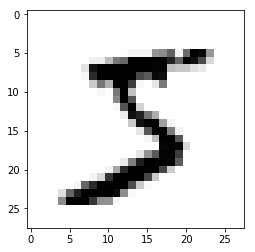

In [168]:
createGraph(0,mnist_train_full)

In [169]:
normalized_full_train,normalized_full_train_labels = normalizeData2(mnist_train_full)

label: 5


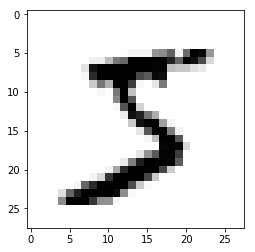

In [170]:
createGraphNomalized(0,normalized_full_train,normalized_full_train_labels)

In [171]:
for x in range(len(normalized_full_train)): #tranining the network on the normalized data with loop
    targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
    inputs = normalized_full_train[x] #selecting array of 784 pixels for input
    targets[int(normalized_full_train_labels[x])] = 0.99 #setting correct output array configuration 
    MNISTNN.train(inputs,targets) #training on 1 entry 

In [172]:
trackResults(normalized_test,normalized_labels_test,MNISTNN)

loop: 0
correct label: 7
Network answer: 7 

loop: 1
correct label: 2
Network answer: 2 

loop: 2
correct label: 1
Network answer: 1 

loop: 3
correct label: 0
Network answer: 0 

loop: 4
correct label: 4
Network answer: 4 

loop: 5
correct label: 1
Network answer: 1 

loop: 6
correct label: 4
Network answer: 4 

loop: 7
correct label: 9
Network answer: 9 

loop: 8
correct label: 5
Network answer: 9 

loop: 9
correct label: 9
Network answer: 9 

performance = 90.0 %


In [173]:
data_file = open("/home/tomi/data/howToMakeANN/mnist_train.csv", 'r')
data_train_full = data_file.readlines()
data_file.close

<function TextIOWrapper.close()>

In [174]:
normalized_full_test, normalized_full_test_labels = normalizeData2(data_train_full)

label: 2


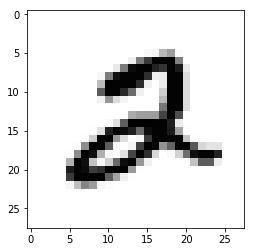

In [175]:
createGraphNomalized(5, normalized_full_test,normalized_full_test_labels)

In [176]:
trackResults(normalized_full_test,normalized_full_test_labels,MNISTNN)

loop: 0
correct label: 5
Network answer: 5 

loop: 1
correct label: 0
Network answer: 0 

loop: 2
correct label: 4
Network answer: 4 

loop: 3
correct label: 1
Network answer: 1 

loop: 4
correct label: 9
Network answer: 9 

loop: 5
correct label: 2
Network answer: 2 

loop: 6
correct label: 1
Network answer: 1 

loop: 7
correct label: 3
Network answer: 3 

loop: 8
correct label: 1
Network answer: 1 

loop: 9
correct label: 4
Network answer: 4 

loop: 10
correct label: 3
Network answer: 3 

loop: 11
correct label: 5
Network answer: 5 

loop: 12
correct label: 3
Network answer: 3 

loop: 13
correct label: 6
Network answer: 6 

loop: 14
correct label: 1
Network answer: 1 

loop: 15
correct label: 7
Network answer: 7 

loop: 16
correct label: 2
Network answer: 2 

loop: 17
correct label: 8
Network answer: 8 

loop: 18
correct label: 6
Network answer: 6 

loop: 19
correct label: 9
Network answer: 9 

loop: 20
correct label: 4
Network answer: 4 

loop: 21
correct label: 0
Network answer: 0 

Network answer: 8 

loop: 241
correct label: 6
Network answer: 6 

loop: 242
correct label: 3
Network answer: 3 

loop: 243
correct label: 7
Network answer: 7 

loop: 244
correct label: 5
Network answer: 5 

loop: 245
correct label: 8
Network answer: 8 

loop: 246
correct label: 0
Network answer: 0 

loop: 247
correct label: 9
Network answer: 9 

loop: 248
correct label: 1
Network answer: 1 

loop: 249
correct label: 0
Network answer: 0 

loop: 250
correct label: 3
Network answer: 6 

loop: 251
correct label: 1
Network answer: 1 

loop: 252
correct label: 2
Network answer: 2 

loop: 253
correct label: 2
Network answer: 2 

loop: 254
correct label: 3
Network answer: 3 

loop: 255
correct label: 3
Network answer: 3 

loop: 256
correct label: 6
Network answer: 6 

loop: 257
correct label: 4
Network answer: 4 

loop: 258
correct label: 7
Network answer: 7 

loop: 259
correct label: 5
Network answer: 5 

loop: 260
correct label: 0
Network answer: 0 

loop: 261
correct label: 6
Network answe

Network answer: 7 

loop: 587
correct label: 1
Network answer: 1 

loop: 588
correct label: 2
Network answer: 1 

loop: 589
correct label: 9
Network answer: 9 

loop: 590
correct label: 4
Network answer: 4 

loop: 591
correct label: 2
Network answer: 2 

loop: 592
correct label: 6
Network answer: 6 

loop: 593
correct label: 1
Network answer: 1 

loop: 594
correct label: 8
Network answer: 8 

loop: 595
correct label: 9
Network answer: 9 

loop: 596
correct label: 0
Network answer: 0 

loop: 597
correct label: 6
Network answer: 6 

loop: 598
correct label: 6
Network answer: 6 

loop: 599
correct label: 7
Network answer: 7 

loop: 600
correct label: 9
Network answer: 9 

loop: 601
correct label: 9
Network answer: 9 

loop: 602
correct label: 8
Network answer: 8 

loop: 603
correct label: 0
Network answer: 0 

loop: 604
correct label: 1
Network answer: 1 

loop: 605
correct label: 4
Network answer: 4 

loop: 606
correct label: 4
Network answer: 4 

loop: 607
correct label: 6
Network answe

loop: 961
correct label: 1
Network answer: 1 

loop: 962
correct label: 7
Network answer: 7 

loop: 963
correct label: 8
Network answer: 8 

loop: 964
correct label: 5
Network answer: 5 

loop: 965
correct label: 0
Network answer: 0 

loop: 966
correct label: 3
Network answer: 6 

loop: 967
correct label: 4
Network answer: 4 

loop: 968
correct label: 7
Network answer: 7 

loop: 969
correct label: 7
Network answer: 7 

loop: 970
correct label: 5
Network answer: 5 

loop: 971
correct label: 7
Network answer: 7 

loop: 972
correct label: 8
Network answer: 8 

loop: 973
correct label: 6
Network answer: 6 

loop: 974
correct label: 9
Network answer: 8 

loop: 975
correct label: 3
Network answer: 3 

loop: 976
correct label: 8
Network answer: 8 

loop: 977
correct label: 6
Network answer: 6 

loop: 978
correct label: 1
Network answer: 1 

loop: 979
correct label: 0
Network answer: 0 

loop: 980
correct label: 9
Network answer: 9 

loop: 981
correct label: 7
Network answer: 7 

loop: 982
cor

Network answer: 8 

loop: 1248
correct label: 4
Network answer: 0 

loop: 1249
correct label: 2
Network answer: 2 

loop: 1250
correct label: 9
Network answer: 9 

loop: 1251
correct label: 7
Network answer: 7 

loop: 1252
correct label: 1
Network answer: 1 

loop: 1253
correct label: 4
Network answer: 4 

loop: 1254
correct label: 8
Network answer: 8 

loop: 1255
correct label: 2
Network answer: 2 

loop: 1256
correct label: 9
Network answer: 9 

loop: 1257
correct label: 6
Network answer: 6 

loop: 1258
correct label: 4
Network answer: 4 

loop: 1259
correct label: 1
Network answer: 1 

loop: 1260
correct label: 3
Network answer: 3 

loop: 1261
correct label: 4
Network answer: 4 

loop: 1262
correct label: 2
Network answer: 2 

loop: 1263
correct label: 5
Network answer: 8 

loop: 1264
correct label: 2
Network answer: 2 

loop: 1265
correct label: 5
Network answer: 5 

loop: 1266
correct label: 6
Network answer: 6 

loop: 1267
correct label: 8
Network answer: 8 

loop: 1268
correct l

correct label: 1
Network answer: 1 

loop: 1628
correct label: 4
Network answer: 4 

loop: 1629
correct label: 2
Network answer: 2 

loop: 1630
correct label: 4
Network answer: 4 

loop: 1631
correct label: 3
Network answer: 3 

loop: 1632
correct label: 9
Network answer: 9 

loop: 1633
correct label: 4
Network answer: 4 

loop: 1634
correct label: 3
Network answer: 8 

loop: 1635
correct label: 5
Network answer: 5 

loop: 1636
correct label: 7
Network answer: 7 

loop: 1637
correct label: 6
Network answer: 6 

loop: 1638
correct label: 5
Network answer: 5 

loop: 1639
correct label: 7
Network answer: 7 

loop: 1640
correct label: 1
Network answer: 1 

loop: 1641
correct label: 8
Network answer: 8 

loop: 1642
correct label: 6
Network answer: 6 

loop: 1643
correct label: 9
Network answer: 9 

loop: 1644
correct label: 3
Network answer: 3 

loop: 1645
correct label: 0
Network answer: 0 

loop: 1646
correct label: 4
Network answer: 4 

loop: 1647
correct label: 1
Network answer: 1 

loo

Network answer: 9 

loop: 1961
correct label: 5
Network answer: 5 

loop: 1962
correct label: 9
Network answer: 9 

loop: 1963
correct label: 0
Network answer: 0 

loop: 1964
correct label: 8
Network answer: 8 

loop: 1965
correct label: 5
Network answer: 5 

loop: 1966
correct label: 8
Network answer: 8 

loop: 1967
correct label: 4
Network answer: 4 

loop: 1968
correct label: 9
Network answer: 7 

loop: 1969
correct label: 0
Network answer: 0 

loop: 1970
correct label: 5
Network answer: 5 

loop: 1971
correct label: 3
Network answer: 3 

loop: 1972
correct label: 2
Network answer: 2 

loop: 1973
correct label: 4
Network answer: 4 

loop: 1974
correct label: 8
Network answer: 8 

loop: 1975
correct label: 7
Network answer: 7 

loop: 1976
correct label: 4
Network answer: 4 

loop: 1977
correct label: 1
Network answer: 1 

loop: 1978
correct label: 5
Network answer: 5 

loop: 1979
correct label: 4
Network answer: 4 

loop: 1980
correct label: 6
Network answer: 6 

loop: 1981
correct l


loop: 2294
correct label: 4
Network answer: 4 

loop: 2295
correct label: 6
Network answer: 6 

loop: 2296
correct label: 6
Network answer: 6 

loop: 2297
correct label: 7
Network answer: 7 

loop: 2298
correct label: 0
Network answer: 0 

loop: 2299
correct label: 9
Network answer: 9 

loop: 2300
correct label: 6
Network answer: 6 

loop: 2301
correct label: 1
Network answer: 1 

loop: 2302
correct label: 8
Network answer: 8 

loop: 2303
correct label: 8
Network answer: 8 

loop: 2304
correct label: 5
Network answer: 5 

loop: 2305
correct label: 2
Network answer: 2 

loop: 2306
correct label: 1
Network answer: 1 

loop: 2307
correct label: 1
Network answer: 1 

loop: 2308
correct label: 5
Network answer: 5 

loop: 2309
correct label: 2
Network answer: 2 

loop: 2310
correct label: 0
Network answer: 0 

loop: 2311
correct label: 6
Network answer: 6 

loop: 2312
correct label: 9
Network answer: 9 

loop: 2313
correct label: 5
Network answer: 5 

loop: 2314
correct label: 2
Network ans

loop: 2627
correct label: 3
Network answer: 3 

loop: 2628
correct label: 8
Network answer: 8 

loop: 2629
correct label: 0
Network answer: 0 

loop: 2630
correct label: 1
Network answer: 1 

loop: 2631
correct label: 6
Network answer: 6 

loop: 2632
correct label: 3
Network answer: 3 

loop: 2633
correct label: 9
Network answer: 9 

loop: 2634
correct label: 7
Network answer: 7 

loop: 2635
correct label: 6
Network answer: 6 

loop: 2636
correct label: 8
Network answer: 5 

loop: 2637
correct label: 6
Network answer: 6 

loop: 2638
correct label: 6
Network answer: 6 

loop: 2639
correct label: 5
Network answer: 5 

loop: 2640
correct label: 9
Network answer: 9 

loop: 2641
correct label: 2
Network answer: 2 

loop: 2642
correct label: 0
Network answer: 0 

loop: 2643
correct label: 9
Network answer: 9 

loop: 2644
correct label: 6
Network answer: 6 

loop: 2645
correct label: 1
Network answer: 1 

loop: 2646
correct label: 5
Network answer: 5 

loop: 2647
correct label: 4
Network answ

loop: 2960
correct label: 3
Network answer: 3 

loop: 2961
correct label: 3
Network answer: 3 

loop: 2962
correct label: 4
Network answer: 4 

loop: 2963
correct label: 4
Network answer: 4 

loop: 2964
correct label: 3
Network answer: 3 

loop: 2965
correct label: 5
Network answer: 5 

loop: 2966
correct label: 5
Network answer: 5 

loop: 2967
correct label: 6
Network answer: 6 

loop: 2968
correct label: 5
Network answer: 5 

loop: 2969
correct label: 7
Network answer: 7 

loop: 2970
correct label: 1
Network answer: 1 

loop: 2971
correct label: 8
Network answer: 8 

loop: 2972
correct label: 8
Network answer: 8 

loop: 2973
correct label: 9
Network answer: 9 

loop: 2974
correct label: 0
Network answer: 0 

loop: 2975
correct label: 0
Network answer: 0 

loop: 2976
correct label: 2
Network answer: 2 

loop: 2977
correct label: 1
Network answer: 1 

loop: 2978
correct label: 6
Network answer: 6 

loop: 2979
correct label: 2
Network answer: 2 

loop: 2980
correct label: 7
Network answ

correct label: 8
Network answer: 8 

loop: 3294
correct label: 6
Network answer: 6 

loop: 3295
correct label: 1
Network answer: 1 

loop: 3296
correct label: 9
Network answer: 9 

loop: 3297
correct label: 6
Network answer: 6 

loop: 3298
correct label: 7
Network answer: 7 

loop: 3299
correct label: 8
Network answer: 8 

loop: 3300
correct label: 2
Network answer: 2 

loop: 3301
correct label: 5
Network answer: 5 

loop: 3302
correct label: 9
Network answer: 9 

loop: 3303
correct label: 9
Network answer: 9 

loop: 3304
correct label: 2
Network answer: 2 

loop: 3305
correct label: 2
Network answer: 2 

loop: 3306
correct label: 1
Network answer: 1 

loop: 3307
correct label: 2
Network answer: 2 

loop: 3308
correct label: 2
Network answer: 2 

loop: 3309
correct label: 0
Network answer: 0 

loop: 3310
correct label: 9
Network answer: 9 

loop: 3311
correct label: 9
Network answer: 9 

loop: 3312
correct label: 4
Network answer: 4 

loop: 3313
correct label: 2
Network answer: 2 

loo

correct label: 3
Network answer: 2 

loop: 3627
correct label: 2
Network answer: 2 

loop: 3628
correct label: 1
Network answer: 1 

loop: 3629
correct label: 6
Network answer: 6 

loop: 3630
correct label: 8
Network answer: 8 

loop: 3631
correct label: 4
Network answer: 4 

loop: 3632
correct label: 0
Network answer: 0 

loop: 3633
correct label: 7
Network answer: 7 

loop: 3634
correct label: 5
Network answer: 5 

loop: 3635
correct label: 5
Network answer: 5 

loop: 3636
correct label: 9
Network answer: 9 

loop: 3637
correct label: 5
Network answer: 5 

loop: 3638
correct label: 5
Network answer: 5 

loop: 3639
correct label: 4
Network answer: 4 

loop: 3640
correct label: 7
Network answer: 7 

loop: 3641
correct label: 7
Network answer: 7 

loop: 3642
correct label: 2
Network answer: 2 

loop: 3643
correct label: 8
Network answer: 8 

loop: 3644
correct label: 1
Network answer: 1 

loop: 3645
correct label: 9
Network answer: 9 

loop: 3646
correct label: 6
Network answer: 6 

loo

Network answer: 8 

loop: 3960
correct label: 6
Network answer: 6 

loop: 3961
correct label: 8
Network answer: 8 

loop: 3962
correct label: 1
Network answer: 1 

loop: 3963
correct label: 1
Network answer: 1 

loop: 3964
correct label: 0
Network answer: 0 

loop: 3965
correct label: 2
Network answer: 2 

loop: 3966
correct label: 1
Network answer: 1 

loop: 3967
correct label: 9
Network answer: 9 

loop: 3968
correct label: 8
Network answer: 8 

loop: 3969
correct label: 3
Network answer: 3 

loop: 3970
correct label: 9
Network answer: 9 

loop: 3971
correct label: 1
Network answer: 1 

loop: 3972
correct label: 5
Network answer: 5 

loop: 3973
correct label: 4
Network answer: 4 

loop: 3974
correct label: 5
Network answer: 5 

loop: 3975
correct label: 2
Network answer: 2 

loop: 3976
correct label: 8
Network answer: 8 

loop: 3977
correct label: 9
Network answer: 9 

loop: 3978
correct label: 4
Network answer: 4 

loop: 3979
correct label: 8
Network answer: 8 

loop: 3980
correct l


loop: 4293
correct label: 2
Network answer: 2 

loop: 4294
correct label: 1
Network answer: 1 

loop: 4295
correct label: 3
Network answer: 3 

loop: 4296
correct label: 7
Network answer: 7 

loop: 4297
correct label: 4
Network answer: 4 

loop: 4298
correct label: 7
Network answer: 7 

loop: 4299
correct label: 5
Network answer: 5 

loop: 4300
correct label: 1
Network answer: 1 

loop: 4301
correct label: 6
Network answer: 6 

loop: 4302
correct label: 5
Network answer: 5 

loop: 4303
correct label: 7
Network answer: 7 

loop: 4304
correct label: 5
Network answer: 5 

loop: 4305
correct label: 8
Network answer: 8 

loop: 4306
correct label: 9
Network answer: 9 

loop: 4307
correct label: 9
Network answer: 9 

loop: 4308
correct label: 8
Network answer: 8 

loop: 4309
correct label: 5
Network answer: 5 

loop: 4310
correct label: 0
Network answer: 0 

loop: 4311
correct label: 1
Network answer: 1 

loop: 4312
correct label: 5
Network answer: 5 

loop: 4313
correct label: 9
Network ans

loop: 4626
correct label: 4
Network answer: 4 

loop: 4627
correct label: 9
Network answer: 9 

loop: 4628
correct label: 3
Network answer: 3 

loop: 4629
correct label: 0
Network answer: 0 

loop: 4630
correct label: 9
Network answer: 9 

loop: 4631
correct label: 6
Network answer: 6 

loop: 4632
correct label: 3
Network answer: 3 

loop: 4633
correct label: 4
Network answer: 4 

loop: 4634
correct label: 8
Network answer: 9 

loop: 4635
correct label: 6
Network answer: 6 

loop: 4636
correct label: 4
Network answer: 9 

loop: 4637
correct label: 8
Network answer: 8 

loop: 4638
correct label: 3
Network answer: 2 

loop: 4639
correct label: 1
Network answer: 1 

loop: 4640
correct label: 6
Network answer: 5 

loop: 4641
correct label: 4
Network answer: 4 

loop: 4642
correct label: 0
Network answer: 0 

loop: 4643
correct label: 7
Network answer: 7 

loop: 4644
correct label: 1
Network answer: 1 

loop: 4645
correct label: 5
Network answer: 5 

loop: 4646
correct label: 2
Network answ

Network answer: 9 

loop: 4874
correct label: 4
Network answer: 4 

loop: 4875
correct label: 7
Network answer: 7 

loop: 4876
correct label: 7
Network answer: 7 

loop: 4877
correct label: 4
Network answer: 4 

loop: 4878
correct label: 3
Network answer: 8 

loop: 4879
correct label: 9
Network answer: 9 

loop: 4880
correct label: 2
Network answer: 2 

loop: 4881
correct label: 3
Network answer: 3 

loop: 4882
correct label: 6
Network answer: 6 

loop: 4883
correct label: 3
Network answer: 3 

loop: 4884
correct label: 1
Network answer: 1 

loop: 4885
correct label: 5
Network answer: 5 

loop: 4886
correct label: 6
Network answer: 6 

loop: 4887
correct label: 8
Network answer: 8 

loop: 4888
correct label: 7
Network answer: 7 

loop: 4889
correct label: 0
Network answer: 0 

loop: 4890
correct label: 4
Network answer: 4 

loop: 4891
correct label: 3
Network answer: 3 

loop: 4892
correct label: 0
Network answer: 0 

loop: 4893
correct label: 7
Network answer: 7 

loop: 4894
correct l

Network answer: 3 

loop: 5208
correct label: 9
Network answer: 9 

loop: 5209
correct label: 9
Network answer: 9 

loop: 5210
correct label: 5
Network answer: 5 

loop: 5211
correct label: 5
Network answer: 5 

loop: 5212
correct label: 9
Network answer: 9 

loop: 5213
correct label: 6
Network answer: 6 

loop: 5214
correct label: 7
Network answer: 7 

loop: 5215
correct label: 8
Network answer: 8 

loop: 5216
correct label: 2
Network answer: 2 

loop: 5217
correct label: 4
Network answer: 4 

loop: 5218
correct label: 6
Network answer: 6 

loop: 5219
correct label: 9
Network answer: 9 

loop: 5220
correct label: 8
Network answer: 8 

loop: 5221
correct label: 1
Network answer: 1 

loop: 5222
correct label: 6
Network answer: 6 

loop: 5223
correct label: 7
Network answer: 7 

loop: 5224
correct label: 9
Network answer: 9 

loop: 5225
correct label: 1
Network answer: 1 

loop: 5226
correct label: 6
Network answer: 6 

loop: 5227
correct label: 2
Network answer: 2 

loop: 5228
correct l


loop: 5459
correct label: 9
Network answer: 9 

loop: 5460
correct label: 8
Network answer: 8 

loop: 5461
correct label: 0
Network answer: 0 

loop: 5462
correct label: 0
Network answer: 0 

loop: 5463
correct label: 8
Network answer: 8 

loop: 5464
correct label: 0
Network answer: 0 

loop: 5465
correct label: 7
Network answer: 7 

loop: 5466
correct label: 6
Network answer: 6 

loop: 5467
correct label: 3
Network answer: 3 

loop: 5468
correct label: 0
Network answer: 0 

loop: 5469
correct label: 0
Network answer: 0 

loop: 5470
correct label: 0
Network answer: 0 

loop: 5471
correct label: 3
Network answer: 3 

loop: 5472
correct label: 7
Network answer: 7 

loop: 5473
correct label: 7
Network answer: 7 

loop: 5474
correct label: 8
Network answer: 8 

loop: 5475
correct label: 0
Network answer: 0 

loop: 5476
correct label: 8
Network answer: 8 

loop: 5477
correct label: 1
Network answer: 1 

loop: 5478
correct label: 9
Network answer: 9 

loop: 5479
correct label: 1
Network ans

Network answer: 9 

loop: 5747
correct label: 0
Network answer: 0 

loop: 5748
correct label: 3
Network answer: 3 

loop: 5749
correct label: 1
Network answer: 1 

loop: 5750
correct label: 6
Network answer: 6 

loop: 5751
correct label: 2
Network answer: 2 

loop: 5752
correct label: 5
Network answer: 5 

loop: 5753
correct label: 3
Network answer: 3 

loop: 5754
correct label: 7
Network answer: 7 

loop: 5755
correct label: 4
Network answer: 4 

loop: 5756
correct label: 1
Network answer: 1 

loop: 5757
correct label: 5
Network answer: 5 

loop: 5758
correct label: 2
Network answer: 2 

loop: 5759
correct label: 6
Network answer: 6 

loop: 5760
correct label: 1
Network answer: 1 

loop: 5761
correct label: 7
Network answer: 9 

loop: 5762
correct label: 2
Network answer: 2 

loop: 5763
correct label: 8
Network answer: 8 

loop: 5764
correct label: 4
Network answer: 4 

loop: 5765
correct label: 9
Network answer: 9 

loop: 5766
correct label: 6
Network answer: 6 

loop: 5767
correct l

Network answer: 1 

loop: 6083
correct label: 1
Network answer: 1 

loop: 6084
correct label: 9
Network answer: 9 

loop: 6085
correct label: 6
Network answer: 6 

loop: 6086
correct label: 5
Network answer: 5 

loop: 6087
correct label: 7
Network answer: 7 

loop: 6088
correct label: 7
Network answer: 7 

loop: 6089
correct label: 3
Network answer: 3 

loop: 6090
correct label: 6
Network answer: 6 

loop: 6091
correct label: 7
Network answer: 7 

loop: 6092
correct label: 9
Network answer: 9 

loop: 6093
correct label: 8
Network answer: 8 

loop: 6094
correct label: 0
Network answer: 0 

loop: 6095
correct label: 4
Network answer: 4 

loop: 6096
correct label: 5
Network answer: 5 

loop: 6097
correct label: 0
Network answer: 0 

loop: 6098
correct label: 3
Network answer: 3 

loop: 6099
correct label: 2
Network answer: 2 

loop: 6100
correct label: 9
Network answer: 9 

loop: 6101
correct label: 4
Network answer: 4 

loop: 6102
correct label: 6
Network answer: 8 

loop: 6103
correct l

correct label: 1
Network answer: 1 

loop: 6459
correct label: 9
Network answer: 9 

loop: 6460
correct label: 9
Network answer: 9 

loop: 6461
correct label: 0
Network answer: 0 

loop: 6462
correct label: 4
Network answer: 4 

loop: 6463
correct label: 1
Network answer: 1 

loop: 6464
correct label: 6
Network answer: 6 

loop: 6465
correct label: 2
Network answer: 2 

loop: 6466
correct label: 2
Network answer: 8 

loop: 6467
correct label: 3
Network answer: 3 

loop: 6468
correct label: 0
Network answer: 0 

loop: 6469
correct label: 4
Network answer: 4 

loop: 6470
correct label: 8
Network answer: 8 

loop: 6471
correct label: 5
Network answer: 5 

loop: 6472
correct label: 5
Network answer: 5 

loop: 6473
correct label: 6
Network answer: 6 

loop: 6474
correct label: 6
Network answer: 6 

loop: 6475
correct label: 7
Network answer: 7 

loop: 6476
correct label: 7
Network answer: 7 

loop: 6477
correct label: 8
Network answer: 8 

loop: 6478
correct label: 2
Network answer: 2 

loo

Network answer: 9 

loop: 6718
correct label: 1
Network answer: 1 

loop: 6719
correct label: 3
Network answer: 3 

loop: 6720
correct label: 6
Network answer: 6 

loop: 6721
correct label: 6
Network answer: 6 

loop: 6722
correct label: 7
Network answer: 7 

loop: 6723
correct label: 0
Network answer: 0 

loop: 6724
correct label: 4
Network answer: 4 

loop: 6725
correct label: 2
Network answer: 2 

loop: 6726
correct label: 6
Network answer: 6 

loop: 6727
correct label: 6
Network answer: 6 

loop: 6728
correct label: 8
Network answer: 8 

loop: 6729
correct label: 4
Network answer: 4 

loop: 6730
correct label: 0
Network answer: 0 

loop: 6731
correct label: 8
Network answer: 8 

loop: 6732
correct label: 6
Network answer: 6 

loop: 6733
correct label: 4
Network answer: 4 

loop: 6734
correct label: 9
Network answer: 9 

loop: 6735
correct label: 5
Network answer: 5 

loop: 6736
correct label: 1
Network answer: 1 

loop: 6737
correct label: 0
Network answer: 0 

loop: 6738
correct l

Network answer: 4 

loop: 7125
correct label: 7
Network answer: 9 

loop: 7126
correct label: 6
Network answer: 6 

loop: 7127
correct label: 0
Network answer: 0 

loop: 7128
correct label: 0
Network answer: 0 

loop: 7129
correct label: 0
Network answer: 0 

loop: 7130
correct label: 0
Network answer: 0 

loop: 7131
correct label: 1
Network answer: 1 

loop: 7132
correct label: 3
Network answer: 3 

loop: 7133
correct label: 5
Network answer: 5 

loop: 7134
correct label: 3
Network answer: 3 

loop: 7135
correct label: 0
Network answer: 0 

loop: 7136
correct label: 8
Network answer: 3 

loop: 7137
correct label: 5
Network answer: 5 

loop: 7138
correct label: 1
Network answer: 1 

loop: 7139
correct label: 2
Network answer: 2 

loop: 7140
correct label: 2
Network answer: 2 

loop: 7141
correct label: 8
Network answer: 8 

loop: 7142
correct label: 8
Network answer: 8 

loop: 7143
correct label: 0
Network answer: 0 

loop: 7144
correct label: 5
Network answer: 5 

loop: 7145
correct l

Network answer: 5 

loop: 7322
correct label: 3
Network answer: 3 

loop: 7323
correct label: 5
Network answer: 5 

loop: 7324
correct label: 1
Network answer: 1 

loop: 7325
correct label: 0
Network answer: 0 

loop: 7326
correct label: 2
Network answer: 2 

loop: 7327
correct label: 4
Network answer: 4 

loop: 7328
correct label: 8
Network answer: 8 

loop: 7329
correct label: 8
Network answer: 8 

loop: 7330
correct label: 1
Network answer: 1 

loop: 7331
correct label: 7
Network answer: 7 

loop: 7332
correct label: 3
Network answer: 3 

loop: 7333
correct label: 4
Network answer: 4 

loop: 7334
correct label: 7
Network answer: 7 

loop: 7335
correct label: 9
Network answer: 9 

loop: 7336
correct label: 3
Network answer: 3 

loop: 7337
correct label: 2
Network answer: 2 

loop: 7338
correct label: 0
Network answer: 0 

loop: 7339
correct label: 3
Network answer: 3 

loop: 7340
correct label: 7
Network answer: 7 

loop: 7341
correct label: 6
Network answer: 6 

loop: 7342
correct l

loop: 7791
correct label: 9
Network answer: 9 

loop: 7792
correct label: 2
Network answer: 2 

loop: 7793
correct label: 8
Network answer: 8 

loop: 7794
correct label: 3
Network answer: 3 

loop: 7795
correct label: 7
Network answer: 7 

loop: 7796
correct label: 2
Network answer: 2 

loop: 7797
correct label: 8
Network answer: 8 

loop: 7798
correct label: 9
Network answer: 9 

loop: 7799
correct label: 8
Network answer: 8 

loop: 7800
correct label: 3
Network answer: 3 

loop: 7801
correct label: 2
Network answer: 2 

loop: 7802
correct label: 5
Network answer: 5 

loop: 7803
correct label: 3
Network answer: 3 

loop: 7804
correct label: 4
Network answer: 4 

loop: 7805
correct label: 9
Network answer: 9 

loop: 7806
correct label: 1
Network answer: 1 

loop: 7807
correct label: 0
Network answer: 0 

loop: 7808
correct label: 7
Network answer: 3 

loop: 7809
correct label: 7
Network answer: 7 

loop: 7810
correct label: 8
Network answer: 8 

loop: 7811
correct label: 9
Network answ

loop: 8624
correct label: 5
Network answer: 9 

loop: 8625
correct label: 1
Network answer: 1 

loop: 8626
correct label: 9
Network answer: 9 

loop: 8627
correct label: 6
Network answer: 6 

loop: 8628
correct label: 6
Network answer: 6 

loop: 8629
correct label: 7
Network answer: 9 

loop: 8630
correct label: 9
Network answer: 9 

loop: 8631
correct label: 2
Network answer: 2 

loop: 8632
correct label: 2
Network answer: 2 

loop: 8633
correct label: 1
Network answer: 1 

loop: 8634
correct label: 4
Network answer: 4 

loop: 8635
correct label: 3
Network answer: 3 

loop: 8636
correct label: 6
Network answer: 6 

loop: 8637
correct label: 7
Network answer: 9 

loop: 8638
correct label: 6
Network answer: 6 

loop: 8639
correct label: 5
Network answer: 5 

loop: 8640
correct label: 2
Network answer: 2 

loop: 8641
correct label: 9
Network answer: 9 

loop: 8642
correct label: 5
Network answer: 5 

loop: 8643
correct label: 3
Network answer: 3 

loop: 8644
correct label: 4
Network answ

correct label: 9
Network answer: 4 

loop: 9291
correct label: 5
Network answer: 5 

loop: 9292
correct label: 1
Network answer: 1 

loop: 9293
correct label: 3
Network answer: 3 

loop: 9294
correct label: 3
Network answer: 7 

loop: 9295
correct label: 6
Network answer: 6 

loop: 9296
correct label: 0
Network answer: 0 

loop: 9297
correct label: 0
Network answer: 0 

loop: 9298
correct label: 1
Network answer: 1 

loop: 9299
correct label: 1
Network answer: 1 

loop: 9300
correct label: 3
Network answer: 3 

loop: 9301
correct label: 2
Network answer: 2 

loop: 9302
correct label: 3
Network answer: 3 

loop: 9303
correct label: 3
Network answer: 3 

loop: 9304
correct label: 9
Network answer: 9 

loop: 9305
correct label: 6
Network answer: 6 

loop: 9306
correct label: 9
Network answer: 9 

loop: 9307
correct label: 7
Network answer: 7 

loop: 9308
correct label: 9
Network answer: 9 

loop: 9309
correct label: 8
Network answer: 8 

loop: 9310
correct label: 0
Network answer: 0 

loo

Network answer: 5 

loop: 9946
correct label: 6
Network answer: 6 

loop: 9947
correct label: 5
Network answer: 5 

loop: 9948
correct label: 8
Network answer: 6 

loop: 9949
correct label: 9
Network answer: 9 

loop: 9950
correct label: 9
Network answer: 9 

loop: 9951
correct label: 5
Network answer: 5 

loop: 9952
correct label: 8
Network answer: 8 

loop: 9953
correct label: 3
Network answer: 3 

loop: 9954
correct label: 7
Network answer: 7 

loop: 9955
correct label: 7
Network answer: 7 

loop: 9956
correct label: 8
Network answer: 8 

loop: 9957
correct label: 4
Network answer: 4 

loop: 9958
correct label: 5
Network answer: 5 

loop: 9959
correct label: 3
Network answer: 3 

loop: 9960
correct label: 1
Network answer: 1 

loop: 9961
correct label: 6
Network answer: 6 

loop: 9962
correct label: 2
Network answer: 2 

loop: 9963
correct label: 0
Network answer: 0 

loop: 9964
correct label: 2
Network answer: 2 

loop: 9965
correct label: 0
Network answer: 0 

loop: 9966
correct l

Network answer: 0 

loop: 10457
correct label: 7
Network answer: 7 

loop: 10458
correct label: 1
Network answer: 1 

loop: 10459
correct label: 4
Network answer: 4 

loop: 10460
correct label: 4
Network answer: 4 

loop: 10461
correct label: 7
Network answer: 7 

loop: 10462
correct label: 4
Network answer: 4 

loop: 10463
correct label: 6
Network answer: 6 

loop: 10464
correct label: 2
Network answer: 2 

loop: 10465
correct label: 5
Network answer: 5 

loop: 10466
correct label: 3
Network answer: 3 

loop: 10467
correct label: 4
Network answer: 4 

loop: 10468
correct label: 1
Network answer: 1 

loop: 10469
correct label: 0
Network answer: 0 

loop: 10470
correct label: 3
Network answer: 3 

loop: 10471
correct label: 0
Network answer: 0 

loop: 10472
correct label: 2
Network answer: 2 

loop: 10473
correct label: 6
Network answer: 6 

loop: 10474
correct label: 7
Network answer: 7 

loop: 10475
correct label: 6
Network answer: 6 

loop: 10476
correct label: 2
Network answer: 2 



loop: 10956
correct label: 6
Network answer: 6 

loop: 10957
correct label: 2
Network answer: 2 

loop: 10958
correct label: 5
Network answer: 5 

loop: 10959
correct label: 2
Network answer: 2 

loop: 10960
correct label: 4
Network answer: 4 

loop: 10961
correct label: 5
Network answer: 5 

loop: 10962
correct label: 2
Network answer: 2 

loop: 10963
correct label: 8
Network answer: 8 

loop: 10964
correct label: 4
Network answer: 4 

loop: 10965
correct label: 7
Network answer: 7 

loop: 10966
correct label: 3
Network answer: 9 

loop: 10967
correct label: 4
Network answer: 4 

loop: 10968
correct label: 6
Network answer: 6 

loop: 10969
correct label: 7
Network answer: 7 

loop: 10970
correct label: 9
Network answer: 9 

loop: 10971
correct label: 1
Network answer: 1 

loop: 10972
correct label: 2
Network answer: 2 

loop: 10973
correct label: 8
Network answer: 8 

loop: 10974
correct label: 0
Network answer: 0 

loop: 10975
correct label: 0
Network answer: 0 

loop: 10976
correct 

Network answer: 1 

loop: 11609
correct label: 5
Network answer: 5 

loop: 11610
correct label: 6
Network answer: 6 

loop: 11611
correct label: 8
Network answer: 8 

loop: 11612
correct label: 0
Network answer: 0 

loop: 11613
correct label: 8
Network answer: 8 

loop: 11614
correct label: 8
Network answer: 8 

loop: 11615
correct label: 0
Network answer: 0 

loop: 11616
correct label: 7
Network answer: 7 

loop: 11617
correct label: 9
Network answer: 9 

loop: 11618
correct label: 3
Network answer: 3 

loop: 11619
correct label: 3
Network answer: 5 

loop: 11620
correct label: 0
Network answer: 0 

loop: 11621
correct label: 2
Network answer: 2 

loop: 11622
correct label: 1
Network answer: 1 

loop: 11623
correct label: 7
Network answer: 7 

loop: 11624
correct label: 4
Network answer: 4 

loop: 11625
correct label: 8
Network answer: 8 

loop: 11626
correct label: 9
Network answer: 9 

loop: 11627
correct label: 4
Network answer: 4 

loop: 11628
correct label: 9
Network answer: 9 



Network answer: 0 

loop: 12181
correct label: 5
Network answer: 5 

loop: 12182
correct label: 8
Network answer: 8 

loop: 12183
correct label: 3
Network answer: 2 

loop: 12184
correct label: 0
Network answer: 0 

loop: 12185
correct label: 7
Network answer: 7 

loop: 12186
correct label: 3
Network answer: 3 

loop: 12187
correct label: 4
Network answer: 4 

loop: 12188
correct label: 7
Network answer: 7 

loop: 12189
correct label: 3
Network answer: 2 

loop: 12190
correct label: 8
Network answer: 8 

loop: 12191
correct label: 6
Network answer: 6 

loop: 12192
correct label: 4
Network answer: 4 

loop: 12193
correct label: 0
Network answer: 0 

loop: 12194
correct label: 4
Network answer: 4 

loop: 12195
correct label: 0
Network answer: 0 

loop: 12196
correct label: 2
Network answer: 2 

loop: 12197
correct label: 4
Network answer: 4 

loop: 12198
correct label: 8
Network answer: 8 

loop: 12199
correct label: 6
Network answer: 6 

loop: 12200
correct label: 9
Network answer: 9 



correct label: 4
Network answer: 4 

loop: 12789
correct label: 9
Network answer: 9 

loop: 12790
correct label: 4
Network answer: 4 

loop: 12791
correct label: 1
Network answer: 1 

loop: 12792
correct label: 9
Network answer: 9 

loop: 12793
correct label: 1
Network answer: 1 

loop: 12794
correct label: 7
Network answer: 7 

loop: 12795
correct label: 4
Network answer: 4 

loop: 12796
correct label: 0
Network answer: 0 

loop: 12797
correct label: 2
Network answer: 2 

loop: 12798
correct label: 1
Network answer: 1 

loop: 12799
correct label: 0
Network answer: 0 

loop: 12800
correct label: 5
Network answer: 5 

loop: 12801
correct label: 6
Network answer: 6 

loop: 12802
correct label: 2
Network answer: 2 

loop: 12803
correct label: 2
Network answer: 2 

loop: 12804
correct label: 5
Network answer: 5 

loop: 12805
correct label: 1
Network answer: 1 

loop: 12806
correct label: 7
Network answer: 7 

loop: 12807
correct label: 1
Network answer: 1 

loop: 12808
correct label: 2
Net

Network answer: 8 

loop: 13342
correct label: 8
Network answer: 8 

loop: 13343
correct label: 8
Network answer: 8 

loop: 13344
correct label: 0
Network answer: 0 

loop: 13345
correct label: 5
Network answer: 5 

loop: 13346
correct label: 8
Network answer: 5 

loop: 13347
correct label: 0
Network answer: 0 

loop: 13348
correct label: 5
Network answer: 5 

loop: 13349
correct label: 6
Network answer: 6 

loop: 13350
correct label: 4
Network answer: 9 

loop: 13351
correct label: 6
Network answer: 6 

loop: 13352
correct label: 3
Network answer: 9 

loop: 13353
correct label: 3
Network answer: 3 

loop: 13354
correct label: 8
Network answer: 8 

loop: 13355
correct label: 7
Network answer: 7 

loop: 13356
correct label: 9
Network answer: 9 

loop: 13357
correct label: 6
Network answer: 6 

loop: 13358
correct label: 9
Network answer: 9 

loop: 13359
correct label: 9
Network answer: 9 

loop: 13360
correct label: 5
Network answer: 5 

loop: 13361
correct label: 9
Network answer: 9 



Network answer: 8 

loop: 13579
correct label: 3
Network answer: 3 

loop: 13580
correct label: 5
Network answer: 5 

loop: 13581
correct label: 1
Network answer: 1 

loop: 13582
correct label: 0
Network answer: 0 

loop: 13583
correct label: 0
Network answer: 0 

loop: 13584
correct label: 1
Network answer: 1 

loop: 13585
correct label: 2
Network answer: 2 

loop: 13586
correct label: 2
Network answer: 2 

loop: 13587
correct label: 6
Network answer: 6 

loop: 13588
correct label: 8
Network answer: 8 

loop: 13589
correct label: 0
Network answer: 0 

loop: 13590
correct label: 1
Network answer: 1 

loop: 13591
correct label: 5
Network answer: 5 

loop: 13592
correct label: 8
Network answer: 8 

loop: 13593
correct label: 6
Network answer: 6 

loop: 13594
correct label: 5
Network answer: 8 

loop: 13595
correct label: 6
Network answer: 6 

loop: 13596
correct label: 9
Network answer: 9 

loop: 13597
correct label: 8
Network answer: 8 

loop: 13598
correct label: 6
Network answer: 6 



Network answer: 4 

loop: 13903
correct label: 1
Network answer: 1 

loop: 13904
correct label: 9
Network answer: 9 

loop: 13905
correct label: 7
Network answer: 9 

loop: 13906
correct label: 3
Network answer: 3 

loop: 13907
correct label: 7
Network answer: 7 

loop: 13908
correct label: 4
Network answer: 4 

loop: 13909
correct label: 3
Network answer: 3 

loop: 13910
correct label: 2
Network answer: 2 

loop: 13911
correct label: 0
Network answer: 0 

loop: 13912
correct label: 6
Network answer: 4 

loop: 13913
correct label: 0
Network answer: 0 

loop: 13914
correct label: 2
Network answer: 2 

loop: 13915
correct label: 7
Network answer: 7 

loop: 13916
correct label: 0
Network answer: 0 

loop: 13917
correct label: 8
Network answer: 8 

loop: 13918
correct label: 0
Network answer: 0 

loop: 13919
correct label: 2
Network answer: 2 

loop: 13920
correct label: 8
Network answer: 4 

loop: 13921
correct label: 0
Network answer: 0 

loop: 13922
correct label: 2
Network answer: 2 




loop: 14139
correct label: 2
Network answer: 2 

loop: 14140
correct label: 8
Network answer: 8 

loop: 14141
correct label: 7
Network answer: 7 

loop: 14142
correct label: 9
Network answer: 9 

loop: 14143
correct label: 5
Network answer: 5 

loop: 14144
correct label: 5
Network answer: 0 

loop: 14145
correct label: 7
Network answer: 7 

loop: 14146
correct label: 9
Network answer: 9 

loop: 14147
correct label: 6
Network answer: 6 

loop: 14148
correct label: 0
Network answer: 0 

loop: 14149
correct label: 1
Network answer: 1 

loop: 14150
correct label: 5
Network answer: 5 

loop: 14151
correct label: 9
Network answer: 9 

loop: 14152
correct label: 7
Network answer: 1 

loop: 14153
correct label: 0
Network answer: 0 

loop: 14154
correct label: 1
Network answer: 1 

loop: 14155
correct label: 6
Network answer: 6 

loop: 14156
correct label: 4
Network answer: 4 

loop: 14157
correct label: 0
Network answer: 0 

loop: 14158
correct label: 0
Network answer: 0 

loop: 14159
correct

Network answer: 6 

loop: 14501
correct label: 4
Network answer: 4 

loop: 14502
correct label: 9
Network answer: 9 

loop: 14503
correct label: 1
Network answer: 1 

loop: 14504
correct label: 9
Network answer: 9 

loop: 14505
correct label: 7
Network answer: 7 

loop: 14506
correct label: 7
Network answer: 7 

loop: 14507
correct label: 5
Network answer: 5 

loop: 14508
correct label: 2
Network answer: 2 

loop: 14509
correct label: 1
Network answer: 1 

loop: 14510
correct label: 2
Network answer: 2 

loop: 14511
correct label: 0
Network answer: 0 

loop: 14512
correct label: 5
Network answer: 5 

loop: 14513
correct label: 0
Network answer: 0 

loop: 14514
correct label: 3
Network answer: 3 

loop: 14515
correct label: 2
Network answer: 2 

loop: 14516
correct label: 1
Network answer: 1 

loop: 14517
correct label: 2
Network answer: 2 

loop: 14518
correct label: 0
Network answer: 0 

loop: 14519
correct label: 7
Network answer: 7 

loop: 14520
correct label: 4
Network answer: 4 



Network answer: 0 

loop: 14818
correct label: 9
Network answer: 9 

loop: 14819
correct label: 2
Network answer: 2 

loop: 14820
correct label: 0
Network answer: 0 

loop: 14821
correct label: 1
Network answer: 1 

loop: 14822
correct label: 9
Network answer: 9 

loop: 14823
correct label: 3
Network answer: 3 

loop: 14824
correct label: 7
Network answer: 7 

loop: 14825
correct label: 3
Network answer: 3 

loop: 14826
correct label: 8
Network answer: 8 

loop: 14827
correct label: 9
Network answer: 9 

loop: 14828
correct label: 5
Network answer: 5 

loop: 14829
correct label: 7
Network answer: 7 

loop: 14830
correct label: 8
Network answer: 8 

loop: 14831
correct label: 8
Network answer: 8 

loop: 14832
correct label: 7
Network answer: 7 

loop: 14833
correct label: 7
Network answer: 7 

loop: 14834
correct label: 1
Network answer: 1 

loop: 14835
correct label: 2
Network answer: 2 

loop: 14836
correct label: 2
Network answer: 7 

loop: 14837
correct label: 2
Network answer: 2 



Network answer: 0 

loop: 15018
correct label: 9
Network answer: 9 

loop: 15019
correct label: 7
Network answer: 9 

loop: 15020
correct label: 1
Network answer: 1 

loop: 15021
correct label: 8
Network answer: 8 

loop: 15022
correct label: 3
Network answer: 3 

loop: 15023
correct label: 4
Network answer: 4 

loop: 15024
correct label: 5
Network answer: 8 

loop: 15025
correct label: 6
Network answer: 6 

loop: 15026
correct label: 1
Network answer: 1 

loop: 15027
correct label: 4
Network answer: 4 

loop: 15028
correct label: 0
Network answer: 0 

loop: 15029
correct label: 9
Network answer: 9 

loop: 15030
correct label: 2
Network answer: 2 

loop: 15031
correct label: 3
Network answer: 3 

loop: 15032
correct label: 6
Network answer: 6 

loop: 15033
correct label: 8
Network answer: 8 

loop: 15034
correct label: 1
Network answer: 1 

loop: 15035
correct label: 4
Network answer: 4 

loop: 15036
correct label: 6
Network answer: 6 

loop: 15037
correct label: 7
Network answer: 7 



loop: 15286
correct label: 8
Network answer: 8 

loop: 15287
correct label: 6
Network answer: 6 

loop: 15288
correct label: 0
Network answer: 0 

loop: 15289
correct label: 8
Network answer: 8 

loop: 15290
correct label: 1
Network answer: 1 

loop: 15291
correct label: 0
Network answer: 0 

loop: 15292
correct label: 3
Network answer: 3 

loop: 15293
correct label: 1
Network answer: 1 

loop: 15294
correct label: 4
Network answer: 4 

loop: 15295
correct label: 2
Network answer: 2 

loop: 15296
correct label: 2
Network answer: 2 

loop: 15297
correct label: 3
Network answer: 3 

loop: 15298
correct label: 4
Network answer: 4 

loop: 15299
correct label: 4
Network answer: 4 

loop: 15300
correct label: 1
Network answer: 1 

loop: 15301
correct label: 5
Network answer: 5 

loop: 15302
correct label: 9
Network answer: 9 

loop: 15303
correct label: 6
Network answer: 6 

loop: 15304
correct label: 5
Network answer: 5 

loop: 15305
correct label: 7
Network answer: 7 

loop: 15306
correct 

Network answer: 7 

loop: 15907
correct label: 3
Network answer: 3 

loop: 15908
correct label: 6
Network answer: 6 

loop: 15909
correct label: 7
Network answer: 7 

loop: 15910
correct label: 0
Network answer: 0 

loop: 15911
correct label: 8
Network answer: 8 

loop: 15912
correct label: 9
Network answer: 9 

loop: 15913
correct label: 9
Network answer: 9 

loop: 15914
correct label: 6
Network answer: 6 

loop: 15915
correct label: 5
Network answer: 5 

loop: 15916
correct label: 4
Network answer: 4 

loop: 15917
correct label: 2
Network answer: 2 

loop: 15918
correct label: 5
Network answer: 5 

loop: 15919
correct label: 8
Network answer: 8 

loop: 15920
correct label: 1
Network answer: 1 

loop: 15921
correct label: 1
Network answer: 1 

loop: 15922
correct label: 7
Network answer: 7 

loop: 15923
correct label: 7
Network answer: 7 

loop: 15924
correct label: 6
Network answer: 6 

loop: 15925
correct label: 2
Network answer: 2 

loop: 15926
correct label: 0
Network answer: 0 




loop: 16119
correct label: 0
Network answer: 0 

loop: 16120
correct label: 5
Network answer: 5 

loop: 16121
correct label: 1
Network answer: 1 

loop: 16122
correct label: 0
Network answer: 0 

loop: 16123
correct label: 2
Network answer: 2 

loop: 16124
correct label: 2
Network answer: 2 

loop: 16125
correct label: 3
Network answer: 8 

loop: 16126
correct label: 5
Network answer: 5 

loop: 16127
correct label: 4
Network answer: 4 

loop: 16128
correct label: 8
Network answer: 8 

loop: 16129
correct label: 5
Network answer: 5 

loop: 16130
correct label: 1
Network answer: 7 

loop: 16131
correct label: 6
Network answer: 6 

loop: 16132
correct label: 9
Network answer: 9 

loop: 16133
correct label: 7
Network answer: 7 

loop: 16134
correct label: 3
Network answer: 3 

loop: 16135
correct label: 8
Network answer: 8 

loop: 16136
correct label: 0
Network answer: 0 

loop: 16137
correct label: 9
Network answer: 9 

loop: 16138
correct label: 7
Network answer: 7 

loop: 16139
correct

loop: 16452
correct label: 6
Network answer: 6 

loop: 16453
correct label: 3
Network answer: 3 

loop: 16454
correct label: 7
Network answer: 7 

loop: 16455
correct label: 1
Network answer: 1 

loop: 16456
correct label: 2
Network answer: 2 

loop: 16457
correct label: 8
Network answer: 8 

loop: 16458
correct label: 1
Network answer: 1 

loop: 16459
correct label: 4
Network answer: 4 

loop: 16460
correct label: 0
Network answer: 0 

loop: 16461
correct label: 2
Network answer: 2 

loop: 16462
correct label: 3
Network answer: 3 

loop: 16463
correct label: 9
Network answer: 9 

loop: 16464
correct label: 4
Network answer: 4 

loop: 16465
correct label: 8
Network answer: 8 

loop: 16466
correct label: 4
Network answer: 4 

loop: 16467
correct label: 8
Network answer: 8 

loop: 16468
correct label: 1
Network answer: 1 

loop: 16469
correct label: 6
Network answer: 6 

loop: 16470
correct label: 9
Network answer: 9 

loop: 16471
correct label: 5
Network answer: 5 

loop: 16472
correct 

Network answer: 0 

loop: 16762
correct label: 8
Network answer: 8 

loop: 16763
correct label: 3
Network answer: 3 

loop: 16764
correct label: 3
Network answer: 3 

loop: 16765
correct label: 4
Network answer: 4 

loop: 16766
correct label: 6
Network answer: 6 

loop: 16767
correct label: 5
Network answer: 5 

loop: 16768
correct label: 6
Network answer: 6 

loop: 16769
correct label: 6
Network answer: 6 

loop: 16770
correct label: 9
Network answer: 9 

loop: 16771
correct label: 7
Network answer: 7 

loop: 16772
correct label: 2
Network answer: 2 

loop: 16773
correct label: 8
Network answer: 8 

loop: 16774
correct label: 3
Network answer: 3 

loop: 16775
correct label: 9
Network answer: 9 

loop: 16776
correct label: 9
Network answer: 9 

loop: 16777
correct label: 0
Network answer: 0 

loop: 16778
correct label: 9
Network answer: 9 

loop: 16779
correct label: 1
Network answer: 1 

loop: 16780
correct label: 5
Network answer: 5 

loop: 16781
correct label: 2
Network answer: 2 



Network answer: 3 

loop: 17101
correct label: 1
Network answer: 1 

loop: 17102
correct label: 4
Network answer: 4 

loop: 17103
correct label: 3
Network answer: 3 

loop: 17104
correct label: 3
Network answer: 3 

loop: 17105
correct label: 3
Network answer: 3 

loop: 17106
correct label: 0
Network answer: 0 

loop: 17107
correct label: 9
Network answer: 9 

loop: 17108
correct label: 0
Network answer: 0 

loop: 17109
correct label: 7
Network answer: 7 

loop: 17110
correct label: 2
Network answer: 3 

loop: 17111
correct label: 8
Network answer: 8 

loop: 17112
correct label: 8
Network answer: 5 

loop: 17113
correct label: 7
Network answer: 7 

loop: 17114
correct label: 7
Network answer: 7 

loop: 17115
correct label: 2
Network answer: 2 

loop: 17116
correct label: 3
Network answer: 3 

loop: 17117
correct label: 7
Network answer: 7 

loop: 17118
correct label: 5
Network answer: 5 

loop: 17119
correct label: 9
Network answer: 9 

loop: 17120
correct label: 6
Network answer: 6 



Network answer: 0 

loop: 17305
correct label: 1
Network answer: 1 

loop: 17306
correct label: 7
Network answer: 7 

loop: 17307
correct label: 7
Network answer: 7 

loop: 17308
correct label: 3
Network answer: 3 

loop: 17309
correct label: 6
Network answer: 6 

loop: 17310
correct label: 9
Network answer: 9 

loop: 17311
correct label: 9
Network answer: 9 

loop: 17312
correct label: 5
Network answer: 5 

loop: 17313
correct label: 4
Network answer: 4 

loop: 17314
correct label: 0
Network answer: 0 

loop: 17315
correct label: 2
Network answer: 2 

loop: 17316
correct label: 7
Network answer: 7 

loop: 17317
correct label: 9
Network answer: 9 

loop: 17318
correct label: 3
Network answer: 3 

loop: 17319
correct label: 9
Network answer: 9 

loop: 17320
correct label: 3
Network answer: 3 

loop: 17321
correct label: 4
Network answer: 4 

loop: 17322
correct label: 0
Network answer: 0 

loop: 17323
correct label: 9
Network answer: 9 

loop: 17324
correct label: 3
Network answer: 3 



Network answer: 2 

loop: 17698
correct label: 9
Network answer: 8 

loop: 17699
correct label: 3
Network answer: 3 

loop: 17700
correct label: 8
Network answer: 8 

loop: 17701
correct label: 4
Network answer: 4 

loop: 17702
correct label: 9
Network answer: 9 

loop: 17703
correct label: 7
Network answer: 7 

loop: 17704
correct label: 1
Network answer: 1 

loop: 17705
correct label: 8
Network answer: 8 

loop: 17706
correct label: 1
Network answer: 8 

loop: 17707
correct label: 9
Network answer: 9 

loop: 17708
correct label: 9
Network answer: 9 

loop: 17709
correct label: 0
Network answer: 0 

loop: 17710
correct label: 3
Network answer: 3 

loop: 17711
correct label: 1
Network answer: 1 

loop: 17712
correct label: 3
Network answer: 3 

loop: 17713
correct label: 2
Network answer: 2 

loop: 17714
correct label: 7
Network answer: 2 

loop: 17715
correct label: 3
Network answer: 3 

loop: 17716
correct label: 5
Network answer: 5 

loop: 17717
correct label: 4
Network answer: 4 



loop: 17951
correct label: 5
Network answer: 5 

loop: 17952
correct label: 8
Network answer: 8 

loop: 17953
correct label: 6
Network answer: 6 

loop: 17954
correct label: 4
Network answer: 4 

loop: 17955
correct label: 7
Network answer: 7 

loop: 17956
correct label: 0
Network answer: 0 

loop: 17957
correct label: 8
Network answer: 8 

loop: 17958
correct label: 9
Network answer: 3 

loop: 17959
correct label: 9
Network answer: 9 

loop: 17960
correct label: 1
Network answer: 1 

loop: 17961
correct label: 7
Network answer: 9 

loop: 17962
correct label: 7
Network answer: 7 

loop: 17963
correct label: 7
Network answer: 7 

loop: 17964
correct label: 1
Network answer: 1 

loop: 17965
correct label: 1
Network answer: 1 

loop: 17966
correct label: 3
Network answer: 3 

loop: 17967
correct label: 3
Network answer: 3 

loop: 17968
correct label: 0
Network answer: 0 

loop: 17969
correct label: 7
Network answer: 7 

loop: 17970
correct label: 4
Network answer: 4 

loop: 17971
correct 

correct label: 0
Network answer: 0 

loop: 18285
correct label: 3
Network answer: 3 

loop: 18286
correct label: 1
Network answer: 1 

loop: 18287
correct label: 3
Network answer: 3 

loop: 18288
correct label: 8
Network answer: 8 

loop: 18289
correct label: 7
Network answer: 7 

loop: 18290
correct label: 2
Network answer: 2 

loop: 18291
correct label: 8
Network answer: 8 

loop: 18292
correct label: 6
Network answer: 6 

loop: 18293
correct label: 1
Network answer: 8 

loop: 18294
correct label: 4
Network answer: 4 

loop: 18295
correct label: 0
Network answer: 0 

loop: 18296
correct label: 9
Network answer: 9 

loop: 18297
correct label: 4
Network answer: 4 

loop: 18298
correct label: 5
Network answer: 5 

loop: 18299
correct label: 3
Network answer: 3 

loop: 18300
correct label: 2
Network answer: 2 

loop: 18301
correct label: 0
Network answer: 0 

loop: 18302
correct label: 6
Network answer: 6 

loop: 18303
correct label: 6
Network answer: 6 

loop: 18304
correct label: 1
Net

correct label: 4
Network answer: 4 

loop: 18618
correct label: 8
Network answer: 8 

loop: 18619
correct label: 8
Network answer: 8 

loop: 18620
correct label: 2
Network answer: 2 

loop: 18621
correct label: 7
Network answer: 7 

loop: 18622
correct label: 2
Network answer: 2 

loop: 18623
correct label: 8
Network answer: 8 

loop: 18624
correct label: 9
Network answer: 9 

loop: 18625
correct label: 6
Network answer: 6 

loop: 18626
correct label: 3
Network answer: 3 

loop: 18627
correct label: 3
Network answer: 3 

loop: 18628
correct label: 9
Network answer: 9 

loop: 18629
correct label: 8
Network answer: 8 

loop: 18630
correct label: 3
Network answer: 3 

loop: 18631
correct label: 2
Network answer: 2 

loop: 18632
correct label: 2
Network answer: 2 

loop: 18633
correct label: 2
Network answer: 2 

loop: 18634
correct label: 2
Network answer: 2 

loop: 18635
correct label: 8
Network answer: 2 

loop: 18636
correct label: 4
Network answer: 4 

loop: 18637
correct label: 4
Net

Network answer: 7 

loop: 18951
correct label: 7
Network answer: 7 

loop: 18952
correct label: 8
Network answer: 8 

loop: 18953
correct label: 1
Network answer: 1 

loop: 18954
correct label: 4
Network answer: 4 

loop: 18955
correct label: 3
Network answer: 3 

loop: 18956
correct label: 6
Network answer: 6 

loop: 18957
correct label: 6
Network answer: 6 

loop: 18958
correct label: 1
Network answer: 1 

loop: 18959
correct label: 9
Network answer: 9 

loop: 18960
correct label: 3
Network answer: 3 

loop: 18961
correct label: 4
Network answer: 4 

loop: 18962
correct label: 7
Network answer: 9 

loop: 18963
correct label: 1
Network answer: 1 

loop: 18964
correct label: 3
Network answer: 3 

loop: 18965
correct label: 3
Network answer: 3 

loop: 18966
correct label: 7
Network answer: 7 

loop: 18967
correct label: 8
Network answer: 8 

loop: 18968
correct label: 5
Network answer: 5 

loop: 18969
correct label: 7
Network answer: 7 

loop: 18970
correct label: 0
Network answer: 0 



Network answer: 8 

loop: 19243
correct label: 1
Network answer: 1 

loop: 19244
correct label: 9
Network answer: 5 

loop: 19245
correct label: 2
Network answer: 2 

loop: 19246
correct label: 3
Network answer: 3 

loop: 19247
correct label: 3
Network answer: 3 

loop: 19248
correct label: 2
Network answer: 2 

loop: 19249
correct label: 4
Network answer: 4 

loop: 19250
correct label: 3
Network answer: 3 

loop: 19251
correct label: 7
Network answer: 7 

loop: 19252
correct label: 4
Network answer: 8 

loop: 19253
correct label: 8
Network answer: 8 

loop: 19254
correct label: 9
Network answer: 9 

loop: 19255
correct label: 9
Network answer: 9 

loop: 19256
correct label: 9
Network answer: 9 

loop: 19257
correct label: 7
Network answer: 7 

loop: 19258
correct label: 0
Network answer: 0 

loop: 19259
correct label: 7
Network answer: 7 

loop: 19260
correct label: 7
Network answer: 7 

loop: 19261
correct label: 0
Network answer: 0 

loop: 19262
correct label: 7
Network answer: 7 



correct label: 8
Network answer: 8 

loop: 19784
correct label: 2
Network answer: 2 

loop: 19785
correct label: 9
Network answer: 9 

loop: 19786
correct label: 0
Network answer: 0 

loop: 19787
correct label: 0
Network answer: 0 

loop: 19788
correct label: 6
Network answer: 6 

loop: 19789
correct label: 4
Network answer: 4 

loop: 19790
correct label: 8
Network answer: 8 

loop: 19791
correct label: 7
Network answer: 7 

loop: 19792
correct label: 8
Network answer: 8 

loop: 19793
correct label: 3
Network answer: 3 

loop: 19794
correct label: 4
Network answer: 4 

loop: 19795
correct label: 4
Network answer: 4 

loop: 19796
correct label: 0
Network answer: 0 

loop: 19797
correct label: 5
Network answer: 5 

loop: 19798
correct label: 0
Network answer: 0 

loop: 19799
correct label: 6
Network answer: 6 

loop: 19800
correct label: 7
Network answer: 7 

loop: 19801
correct label: 0
Network answer: 0 

loop: 19802
correct label: 2
Network answer: 2 

loop: 19803
correct label: 3
Net

Network answer: 6 

loop: 20117
correct label: 0
Network answer: 0 

loop: 20118
correct label: 4
Network answer: 4 

loop: 20119
correct label: 6
Network answer: 6 

loop: 20120
correct label: 5
Network answer: 5 

loop: 20121
correct label: 3
Network answer: 3 

loop: 20122
correct label: 6
Network answer: 6 

loop: 20123
correct label: 0
Network answer: 0 

loop: 20124
correct label: 6
Network answer: 6 

loop: 20125
correct label: 5
Network answer: 3 

loop: 20126
correct label: 9
Network answer: 9 

loop: 20127
correct label: 8
Network answer: 8 

loop: 20128
correct label: 0
Network answer: 0 

loop: 20129
correct label: 9
Network answer: 9 

loop: 20130
correct label: 9
Network answer: 9 

loop: 20131
correct label: 1
Network answer: 1 

loop: 20132
correct label: 1
Network answer: 1 

loop: 20133
correct label: 8
Network answer: 8 

loop: 20134
correct label: 7
Network answer: 7 

loop: 20135
correct label: 1
Network answer: 1 

loop: 20136
correct label: 6
Network answer: 6 




loop: 20450
correct label: 9
Network answer: 9 

loop: 20451
correct label: 3
Network answer: 3 

loop: 20452
correct label: 7
Network answer: 7 

loop: 20453
correct label: 5
Network answer: 5 

loop: 20454
correct label: 2
Network answer: 2 

loop: 20455
correct label: 4
Network answer: 4 

loop: 20456
correct label: 1
Network answer: 1 

loop: 20457
correct label: 9
Network answer: 9 

loop: 20458
correct label: 3
Network answer: 3 

loop: 20459
correct label: 1
Network answer: 1 

loop: 20460
correct label: 4
Network answer: 4 

loop: 20461
correct label: 1
Network answer: 1 

loop: 20462
correct label: 9
Network answer: 9 

loop: 20463
correct label: 0
Network answer: 0 

loop: 20464
correct label: 4
Network answer: 4 

loop: 20465
correct label: 1
Network answer: 1 

loop: 20466
correct label: 7
Network answer: 7 

loop: 20467
correct label: 4
Network answer: 4 

loop: 20468
correct label: 4
Network answer: 4 

loop: 20469
correct label: 6
Network answer: 6 

loop: 20470
correct

Network answer: 0 

loop: 21098
correct label: 3
Network answer: 3 

loop: 21099
correct label: 3
Network answer: 3 

loop: 21100
correct label: 6
Network answer: 6 

loop: 21101
correct label: 1
Network answer: 1 

loop: 21102
correct label: 3
Network answer: 3 

loop: 21103
correct label: 6
Network answer: 6 

loop: 21104
correct label: 8
Network answer: 8 

loop: 21105
correct label: 8
Network answer: 8 

loop: 21106
correct label: 8
Network answer: 8 

loop: 21107
correct label: 4
Network answer: 4 

loop: 21108
correct label: 9
Network answer: 9 

loop: 21109
correct label: 1
Network answer: 1 

loop: 21110
correct label: 8
Network answer: 8 

loop: 21111
correct label: 7
Network answer: 7 

loop: 21112
correct label: 3
Network answer: 5 

loop: 21113
correct label: 6
Network answer: 6 

loop: 21114
correct label: 5
Network answer: 5 

loop: 21115
correct label: 5
Network answer: 5 

loop: 21116
correct label: 3
Network answer: 3 

loop: 21117
correct label: 6
Network answer: 6 




loop: 21616
correct label: 9
Network answer: 9 

loop: 21617
correct label: 6
Network answer: 6 

loop: 21618
correct label: 1
Network answer: 1 

loop: 21619
correct label: 4
Network answer: 4 

loop: 21620
correct label: 0
Network answer: 0 

loop: 21621
correct label: 7
Network answer: 9 

loop: 21622
correct label: 3
Network answer: 3 

loop: 21623
correct label: 2
Network answer: 2 

loop: 21624
correct label: 7
Network answer: 7 

loop: 21625
correct label: 3
Network answer: 3 

loop: 21626
correct label: 5
Network answer: 5 

loop: 21627
correct label: 4
Network answer: 4 

loop: 21628
correct label: 0
Network answer: 0 

loop: 21629
correct label: 5
Network answer: 5 

loop: 21630
correct label: 2
Network answer: 2 

loop: 21631
correct label: 9
Network answer: 9 

loop: 21632
correct label: 5
Network answer: 5 

loop: 21633
correct label: 2
Network answer: 2 

loop: 21634
correct label: 1
Network answer: 1 

loop: 21635
correct label: 0
Network answer: 0 

loop: 21636
correct

Network answer: 6 

loop: 21930
correct label: 3
Network answer: 3 

loop: 21931
correct label: 4
Network answer: 4 

loop: 21932
correct label: 0
Network answer: 0 

loop: 21933
correct label: 0
Network answer: 0 

loop: 21934
correct label: 6
Network answer: 6 

loop: 21935
correct label: 4
Network answer: 4 

loop: 21936
correct label: 4
Network answer: 4 

loop: 21937
correct label: 7
Network answer: 7 

loop: 21938
correct label: 3
Network answer: 3 

loop: 21939
correct label: 3
Network answer: 3 

loop: 21940
correct label: 4
Network answer: 4 

loop: 21941
correct label: 6
Network answer: 6 

loop: 21942
correct label: 1
Network answer: 1 

loop: 21943
correct label: 8
Network answer: 8 

loop: 21944
correct label: 1
Network answer: 1 

loop: 21945
correct label: 0
Network answer: 0 

loop: 21946
correct label: 3
Network answer: 3 

loop: 21947
correct label: 3
Network answer: 3 

loop: 21948
correct label: 3
Network answer: 3 

loop: 21949
correct label: 7
Network answer: 7 



Network answer: 4 

loop: 22254
correct label: 0
Network answer: 0 

loop: 22255
correct label: 5
Network answer: 5 

loop: 22256
correct label: 9
Network answer: 9 

loop: 22257
correct label: 6
Network answer: 6 

loop: 22258
correct label: 6
Network answer: 6 

loop: 22259
correct label: 7
Network answer: 9 

loop: 22260
correct label: 6
Network answer: 6 

loop: 22261
correct label: 8
Network answer: 8 

loop: 22262
correct label: 4
Network answer: 4 

loop: 22263
correct label: 9
Network answer: 9 

loop: 22264
correct label: 5
Network answer: 5 

loop: 22265
correct label: 0
Network answer: 0 

loop: 22266
correct label: 8
Network answer: 8 

loop: 22267
correct label: 1
Network answer: 1 

loop: 22268
correct label: 5
Network answer: 5 

loop: 22269
correct label: 2
Network answer: 2 

loop: 22270
correct label: 0
Network answer: 0 

loop: 22271
correct label: 3
Network answer: 3 

loop: 22272
correct label: 5
Network answer: 5 

loop: 22273
correct label: 4
Network answer: 4 



Network answer: 6 

loop: 22449
correct label: 6
Network answer: 6 

loop: 22450
correct label: 9
Network answer: 9 

loop: 22451
correct label: 3
Network answer: 3 

loop: 22452
correct label: 1
Network answer: 1 

loop: 22453
correct label: 0
Network answer: 0 

loop: 22454
correct label: 7
Network answer: 7 

loop: 22455
correct label: 1
Network answer: 1 

loop: 22456
correct label: 4
Network answer: 4 

loop: 22457
correct label: 2
Network answer: 2 

loop: 22458
correct label: 9
Network answer: 9 

loop: 22459
correct label: 3
Network answer: 3 

loop: 22460
correct label: 3
Network answer: 3 

loop: 22461
correct label: 4
Network answer: 4 

loop: 22462
correct label: 1
Network answer: 1 

loop: 22463
correct label: 5
Network answer: 5 

loop: 22464
correct label: 1
Network answer: 1 

loop: 22465
correct label: 6
Network answer: 6 

loop: 22466
correct label: 1
Network answer: 1 

loop: 22467
correct label: 7
Network answer: 7 

loop: 22468
correct label: 3
Network answer: 3 



Network answer: 0 

loop: 22875
correct label: 9
Network answer: 9 

loop: 22876
correct label: 7
Network answer: 7 

loop: 22877
correct label: 0
Network answer: 0 

loop: 22878
correct label: 2
Network answer: 2 

loop: 22879
correct label: 1
Network answer: 1 

loop: 22880
correct label: 7
Network answer: 3 

loop: 22881
correct label: 2
Network answer: 2 

loop: 22882
correct label: 0
Network answer: 0 

loop: 22883
correct label: 3
Network answer: 3 

loop: 22884
correct label: 2
Network answer: 8 

loop: 22885
correct label: 4
Network answer: 9 

loop: 22886
correct label: 0
Network answer: 0 

loop: 22887
correct label: 5
Network answer: 5 

loop: 22888
correct label: 1
Network answer: 1 

loop: 22889
correct label: 6
Network answer: 6 

loop: 22890
correct label: 9
Network answer: 9 

loop: 22891
correct label: 7
Network answer: 7 

loop: 22892
correct label: 1
Network answer: 1 

loop: 22893
correct label: 8
Network answer: 8 

loop: 22894
correct label: 3
Network answer: 3 



loop: 23115
correct label: 1
Network answer: 1 

loop: 23116
correct label: 3
Network answer: 3 

loop: 23117
correct label: 2
Network answer: 2 

loop: 23118
correct label: 1
Network answer: 1 

loop: 23119
correct label: 3
Network answer: 3 

loop: 23120
correct label: 0
Network answer: 0 

loop: 23121
correct label: 4
Network answer: 4 

loop: 23122
correct label: 4
Network answer: 4 

loop: 23123
correct label: 5
Network answer: 8 

loop: 23124
correct label: 0
Network answer: 0 

loop: 23125
correct label: 6
Network answer: 6 

loop: 23126
correct label: 6
Network answer: 6 

loop: 23127
correct label: 7
Network answer: 7 

loop: 23128
correct label: 9
Network answer: 9 

loop: 23129
correct label: 8
Network answer: 8 

loop: 23130
correct label: 3
Network answer: 3 

loop: 23131
correct label: 0
Network answer: 0 

loop: 23132
correct label: 1
Network answer: 1 

loop: 23133
correct label: 1
Network answer: 1 

loop: 23134
correct label: 1
Network answer: 1 

loop: 23135
correct 

Network answer: 4 

loop: 23539
correct label: 9
Network answer: 9 

loop: 23540
correct label: 7
Network answer: 7 

loop: 23541
correct label: 0
Network answer: 0 

loop: 23542
correct label: 9
Network answer: 9 

loop: 23543
correct label: 1
Network answer: 1 

loop: 23544
correct label: 5
Network answer: 5 

loop: 23545
correct label: 2
Network answer: 2 

loop: 23546
correct label: 5
Network answer: 3 

loop: 23547
correct label: 3
Network answer: 3 

loop: 23548
correct label: 9
Network answer: 9 

loop: 23549
correct label: 4
Network answer: 4 

loop: 23550
correct label: 5
Network answer: 5 

loop: 23551
correct label: 7
Network answer: 7 

loop: 23552
correct label: 9
Network answer: 9 

loop: 23553
correct label: 8
Network answer: 8 

loop: 23554
correct label: 1
Network answer: 1 

loop: 23555
correct label: 9
Network answer: 9 

loop: 23556
correct label: 3
Network answer: 3 

loop: 23557
correct label: 0
Network answer: 0 

loop: 23558
correct label: 6
Network answer: 6 



correct label: 4
Network answer: 4 

loop: 23782
correct label: 7
Network answer: 7 

loop: 23783
correct label: 5
Network answer: 5 

loop: 23784
correct label: 7
Network answer: 7 

loop: 23785
correct label: 6
Network answer: 6 

loop: 23786
correct label: 0
Network answer: 0 

loop: 23787
correct label: 7
Network answer: 7 

loop: 23788
correct label: 1
Network answer: 1 

loop: 23789
correct label: 8
Network answer: 8 

loop: 23790
correct label: 6
Network answer: 6 

loop: 23791
correct label: 9
Network answer: 9 

loop: 23792
correct label: 5
Network answer: 5 

loop: 23793
correct label: 0
Network answer: 0 

loop: 23794
correct label: 2
Network answer: 2 

loop: 23795
correct label: 1
Network answer: 1 

loop: 23796
correct label: 3
Network answer: 3 

loop: 23797
correct label: 2
Network answer: 2 

loop: 23798
correct label: 7
Network answer: 7 

loop: 23799
correct label: 3
Network answer: 3 

loop: 23800
correct label: 2
Network answer: 2 

loop: 23801
correct label: 4
Net

Network answer: 6 

loop: 24080
correct label: 1
Network answer: 1 

loop: 24081
correct label: 0
Network answer: 0 

loop: 24082
correct label: 9
Network answer: 9 

loop: 24083
correct label: 1
Network answer: 1 

loop: 24084
correct label: 4
Network answer: 6 

loop: 24085
correct label: 0
Network answer: 0 

loop: 24086
correct label: 1
Network answer: 1 

loop: 24087
correct label: 4
Network answer: 9 

loop: 24088
correct label: 7
Network answer: 7 

loop: 24089
correct label: 2
Network answer: 2 

loop: 24090
correct label: 1
Network answer: 1 

loop: 24091
correct label: 6
Network answer: 6 

loop: 24092
correct label: 9
Network answer: 9 

loop: 24093
correct label: 5
Network answer: 5 

loop: 24094
correct label: 7
Network answer: 7 

loop: 24095
correct label: 3
Network answer: 3 

loop: 24096
correct label: 2
Network answer: 2 

loop: 24097
correct label: 5
Network answer: 5 

loop: 24098
correct label: 2
Network answer: 2 

loop: 24099
correct label: 3
Network answer: 3 



Network answer: 1 

loop: 24294
correct label: 3
Network answer: 3 

loop: 24295
correct label: 4
Network answer: 4 

loop: 24296
correct label: 4
Network answer: 4 

loop: 24297
correct label: 8
Network answer: 8 

loop: 24298
correct label: 4
Network answer: 4 

loop: 24299
correct label: 3
Network answer: 3 

loop: 24300
correct label: 9
Network answer: 9 

loop: 24301
correct label: 8
Network answer: 8 

loop: 24302
correct label: 4
Network answer: 4 

loop: 24303
correct label: 2
Network answer: 2 

loop: 24304
correct label: 6
Network answer: 6 

loop: 24305
correct label: 9
Network answer: 9 

loop: 24306
correct label: 1
Network answer: 1 

loop: 24307
correct label: 3
Network answer: 3 

loop: 24308
correct label: 0
Network answer: 0 

loop: 24309
correct label: 8
Network answer: 8 

loop: 24310
correct label: 5
Network answer: 8 

loop: 24311
correct label: 8
Network answer: 8 

loop: 24312
correct label: 8
Network answer: 8 

loop: 24313
correct label: 9
Network answer: 9 




loop: 24781
correct label: 4
Network answer: 4 

loop: 24782
correct label: 1
Network answer: 1 

loop: 24783
correct label: 3
Network answer: 3 

loop: 24784
correct label: 3
Network answer: 3 

loop: 24785
correct label: 6
Network answer: 6 

loop: 24786
correct label: 2
Network answer: 2 

loop: 24787
correct label: 3
Network answer: 3 

loop: 24788
correct label: 7
Network answer: 7 

loop: 24789
correct label: 3
Network answer: 3 

loop: 24790
correct label: 2
Network answer: 2 

loop: 24791
correct label: 8
Network answer: 8 

loop: 24792
correct label: 5
Network answer: 5 

loop: 24793
correct label: 1
Network answer: 1 

loop: 24794
correct label: 2
Network answer: 8 

loop: 24795
correct label: 4
Network answer: 4 

loop: 24796
correct label: 2
Network answer: 2 

loop: 24797
correct label: 7
Network answer: 7 

loop: 24798
correct label: 4
Network answer: 0 

loop: 24799
correct label: 5
Network answer: 5 

loop: 24800
correct label: 1
Network answer: 1 

loop: 24801
correct

Network answer: 2 

loop: 25404
correct label: 9
Network answer: 9 

loop: 25405
correct label: 6
Network answer: 6 

loop: 25406
correct label: 2
Network answer: 2 

loop: 25407
correct label: 5
Network answer: 5 

loop: 25408
correct label: 0
Network answer: 0 

loop: 25409
correct label: 3
Network answer: 3 

loop: 25410
correct label: 4
Network answer: 4 

loop: 25411
correct label: 5
Network answer: 5 

loop: 25412
correct label: 2
Network answer: 2 

loop: 25413
correct label: 3
Network answer: 3 

loop: 25414
correct label: 1
Network answer: 1 

loop: 25415
correct label: 8
Network answer: 8 

loop: 25416
correct label: 1
Network answer: 1 

loop: 25417
correct label: 3
Network answer: 3 

loop: 25418
correct label: 8
Network answer: 8 

loop: 25419
correct label: 4
Network answer: 4 

loop: 25420
correct label: 0
Network answer: 0 

loop: 25421
correct label: 1
Network answer: 1 

loop: 25422
correct label: 6
Network answer: 6 

loop: 25423
correct label: 5
Network answer: 5 



correct label: 5
Network answer: 5 

loop: 26114
correct label: 6
Network answer: 0 

loop: 26115
correct label: 8
Network answer: 8 

loop: 26116
correct label: 9
Network answer: 9 

loop: 26117
correct label: 0
Network answer: 0 

loop: 26118
correct label: 1
Network answer: 1 

loop: 26119
correct label: 6
Network answer: 6 

loop: 26120
correct label: 2
Network answer: 2 

loop: 26121
correct label: 2
Network answer: 2 

loop: 26122
correct label: 8
Network answer: 8 

loop: 26123
correct label: 3
Network answer: 3 

loop: 26124
correct label: 6
Network answer: 6 

loop: 26125
correct label: 1
Network answer: 1 

loop: 26126
correct label: 6
Network answer: 6 

loop: 26127
correct label: 3
Network answer: 3 

loop: 26128
correct label: 4
Network answer: 4 

loop: 26129
correct label: 6
Network answer: 6 

loop: 26130
correct label: 3
Network answer: 3 

loop: 26131
correct label: 5
Network answer: 5 

loop: 26132
correct label: 4
Network answer: 4 

loop: 26133
correct label: 1
Net


loop: 26780
correct label: 1
Network answer: 1 

loop: 26781
correct label: 3
Network answer: 3 

loop: 26782
correct label: 2
Network answer: 2 

loop: 26783
correct label: 3
Network answer: 3 

loop: 26784
correct label: 0
Network answer: 0 

loop: 26785
correct label: 6
Network answer: 6 

loop: 26786
correct label: 8
Network answer: 8 

loop: 26787
correct label: 5
Network answer: 8 

loop: 26788
correct label: 2
Network answer: 2 

loop: 26789
correct label: 1
Network answer: 1 

loop: 26790
correct label: 4
Network answer: 4 

loop: 26791
correct label: 8
Network answer: 8 

loop: 26792
correct label: 6
Network answer: 6 

loop: 26793
correct label: 5
Network answer: 5 

loop: 26794
correct label: 2
Network answer: 2 

loop: 26795
correct label: 9
Network answer: 9 

loop: 26796
correct label: 6
Network answer: 6 

loop: 26797
correct label: 4
Network answer: 4 

loop: 26798
correct label: 4
Network answer: 4 

loop: 26799
correct label: 0
Network answer: 0 

loop: 26800
correct

loop: 27446
correct label: 0
Network answer: 0 

loop: 27447
correct label: 8
Network answer: 8 

loop: 27448
correct label: 9
Network answer: 4 

loop: 27449
correct label: 6
Network answer: 6 

loop: 27450
correct label: 9
Network answer: 9 

loop: 27451
correct label: 2
Network answer: 2 

loop: 27452
correct label: 5
Network answer: 5 

loop: 27453
correct label: 7
Network answer: 7 

loop: 27454
correct label: 1
Network answer: 1 

loop: 27455
correct label: 1
Network answer: 1 

loop: 27456
correct label: 2
Network answer: 2 

loop: 27457
correct label: 1
Network answer: 1 

loop: 27458
correct label: 2
Network answer: 2 

loop: 27459
correct label: 8
Network answer: 8 

loop: 27460
correct label: 9
Network answer: 9 

loop: 27461
correct label: 1
Network answer: 1 

loop: 27462
correct label: 0
Network answer: 0 

loop: 27463
correct label: 7
Network answer: 7 

loop: 27464
correct label: 2
Network answer: 2 

loop: 27465
correct label: 1
Network answer: 1 

loop: 27466
correct 

Network answer: 9 

loop: 28114
correct label: 9
Network answer: 9 

loop: 28115
correct label: 6
Network answer: 6 

loop: 28116
correct label: 5
Network answer: 5 

loop: 28117
correct label: 7
Network answer: 7 

loop: 28118
correct label: 7
Network answer: 7 

loop: 28119
correct label: 3
Network answer: 3 

loop: 28120
correct label: 7
Network answer: 7 

loop: 28121
correct label: 4
Network answer: 4 

loop: 28122
correct label: 0
Network answer: 0 

loop: 28123
correct label: 3
Network answer: 3 

loop: 28124
correct label: 4
Network answer: 4 

loop: 28125
correct label: 0
Network answer: 0 

loop: 28126
correct label: 2
Network answer: 2 

loop: 28127
correct label: 6
Network answer: 6 

loop: 28128
correct label: 4
Network answer: 4 

loop: 28129
correct label: 9
Network answer: 9 

loop: 28130
correct label: 1
Network answer: 1 

loop: 28131
correct label: 0
Network answer: 0 

loop: 28132
correct label: 3
Network answer: 2 

loop: 28133
correct label: 1
Network answer: 1 




loop: 28779
correct label: 8
Network answer: 8 

loop: 28780
correct label: 2
Network answer: 2 

loop: 28781
correct label: 7
Network answer: 9 

loop: 28782
correct label: 8
Network answer: 8 

loop: 28783
correct label: 7
Network answer: 7 

loop: 28784
correct label: 0
Network answer: 0 

loop: 28785
correct label: 8
Network answer: 8 

loop: 28786
correct label: 2
Network answer: 2 

loop: 28787
correct label: 2
Network answer: 2 

loop: 28788
correct label: 8
Network answer: 0 

loop: 28789
correct label: 9
Network answer: 9 

loop: 28790
correct label: 7
Network answer: 7 

loop: 28791
correct label: 7
Network answer: 7 

loop: 28792
correct label: 1
Network answer: 1 

loop: 28793
correct label: 1
Network answer: 1 

loop: 28794
correct label: 1
Network answer: 1 

loop: 28795
correct label: 2
Network answer: 2 

loop: 28796
correct label: 3
Network answer: 3 

loop: 28797
correct label: 6
Network answer: 6 

loop: 28798
correct label: 6
Network answer: 6 

loop: 28799
correct

loop: 29612
correct label: 2
Network answer: 2 

loop: 29613
correct label: 3
Network answer: 3 

loop: 29614
correct label: 0
Network answer: 0 

loop: 29615
correct label: 1
Network answer: 1 

loop: 29616
correct label: 5
Network answer: 5 

loop: 29617
correct label: 4
Network answer: 4 

loop: 29618
correct label: 8
Network answer: 8 

loop: 29619
correct label: 2
Network answer: 2 

loop: 29620
correct label: 6
Network answer: 6 

loop: 29621
correct label: 0
Network answer: 0 

loop: 29622
correct label: 6
Network answer: 6 

loop: 29623
correct label: 0
Network answer: 0 

loop: 29624
correct label: 2
Network answer: 2 

loop: 29625
correct label: 7
Network answer: 7 

loop: 29626
correct label: 2
Network answer: 2 

loop: 29627
correct label: 8
Network answer: 8 

loop: 29628
correct label: 1
Network answer: 1 

loop: 29629
correct label: 8
Network answer: 8 

loop: 29630
correct label: 6
Network answer: 6 

loop: 29631
correct label: 4
Network answer: 4 

loop: 29632
correct 

Network answer: 1 

loop: 30437
correct label: 9
Network answer: 9 

loop: 30438
correct label: 0
Network answer: 0 

loop: 30439
correct label: 0
Network answer: 0 

loop: 30440
correct label: 6
Network answer: 6 

loop: 30441
correct label: 1
Network answer: 1 

loop: 30442
correct label: 7
Network answer: 7 

loop: 30443
correct label: 2
Network answer: 2 

loop: 30444
correct label: 6
Network answer: 6 

loop: 30445
correct label: 3
Network answer: 3 

loop: 30446
correct label: 9
Network answer: 9 

loop: 30447
correct label: 4
Network answer: 4 

loop: 30448
correct label: 5
Network answer: 5 

loop: 30449
correct label: 7
Network answer: 7 

loop: 30450
correct label: 8
Network answer: 8 

loop: 30451
correct label: 8
Network answer: 8 

loop: 30452
correct label: 9
Network answer: 9 

loop: 30453
correct label: 9
Network answer: 9 

loop: 30454
correct label: 6
Network answer: 6 

loop: 30455
correct label: 0
Network answer: 0 

loop: 30456
correct label: 5
Network answer: 5 



Network answer: 9 

loop: 31112
correct label: 0
Network answer: 0 

loop: 31113
correct label: 1
Network answer: 1 

loop: 31114
correct label: 4
Network answer: 4 

loop: 31115
correct label: 9
Network answer: 9 

loop: 31116
correct label: 0
Network answer: 0 

loop: 31117
correct label: 3
Network answer: 3 

loop: 31118
correct label: 6
Network answer: 6 

loop: 31119
correct label: 8
Network answer: 8 

loop: 31120
correct label: 9
Network answer: 9 

loop: 31121
correct label: 4
Network answer: 4 

loop: 31122
correct label: 1
Network answer: 1 

loop: 31123
correct label: 4
Network answer: 8 

loop: 31124
correct label: 8
Network answer: 8 

loop: 31125
correct label: 7
Network answer: 7 

loop: 31126
correct label: 4
Network answer: 4 

loop: 31127
correct label: 0
Network answer: 0 

loop: 31128
correct label: 9
Network answer: 9 

loop: 31129
correct label: 1
Network answer: 1 

loop: 31130
correct label: 9
Network answer: 9 

loop: 31131
correct label: 9
Network answer: 9 



loop: 31778
correct label: 0
Network answer: 0 

loop: 31779
correct label: 5
Network answer: 5 

loop: 31780
correct label: 1
Network answer: 1 

loop: 31781
correct label: 8
Network answer: 8 

loop: 31782
correct label: 5
Network answer: 5 

loop: 31783
correct label: 9
Network answer: 9 

loop: 31784
correct label: 1
Network answer: 1 

loop: 31785
correct label: 0
Network answer: 0 

loop: 31786
correct label: 9
Network answer: 9 

loop: 31787
correct label: 1
Network answer: 1 

loop: 31788
correct label: 3
Network answer: 3 

loop: 31789
correct label: 2
Network answer: 2 

loop: 31790
correct label: 4
Network answer: 4 

loop: 31791
correct label: 3
Network answer: 3 

loop: 31792
correct label: 7
Network answer: 7 

loop: 31793
correct label: 4
Network answer: 4 

loop: 31794
correct label: 2
Network answer: 2 

loop: 31795
correct label: 5
Network answer: 5 

loop: 31796
correct label: 7
Network answer: 7 

loop: 31797
correct label: 6
Network answer: 6 

loop: 31798
correct 

Network answer: 8 

loop: 32520
correct label: 0
Network answer: 0 

loop: 32521
correct label: 2
Network answer: 2 

loop: 32522
correct label: 6
Network answer: 6 

loop: 32523
correct label: 2
Network answer: 2 

loop: 32524
correct label: 4
Network answer: 4 

loop: 32525
correct label: 2
Network answer: 2 

loop: 32526
correct label: 0
Network answer: 0 

loop: 32527
correct label: 7
Network answer: 7 

loop: 32528
correct label: 1
Network answer: 1 

loop: 32529
correct label: 7
Network answer: 7 

loop: 32530
correct label: 1
Network answer: 1 

loop: 32531
correct label: 0
Network answer: 0 

loop: 32532
correct label: 9
Network answer: 9 

loop: 32533
correct label: 5
Network answer: 5 

loop: 32534
correct label: 1
Network answer: 1 

loop: 32535
correct label: 1
Network answer: 1 

loop: 32536
correct label: 1
Network answer: 1 

loop: 32537
correct label: 5
Network answer: 1 

loop: 32538
correct label: 7
Network answer: 7 

loop: 32539
correct label: 3
Network answer: 3 



Network answer: 7 

loop: 33235
correct label: 5
Network answer: 5 

loop: 33236
correct label: 9
Network answer: 9 

loop: 33237
correct label: 0
Network answer: 0 

loop: 33238
correct label: 0
Network answer: 0 

loop: 33239
correct label: 3
Network answer: 3 

loop: 33240
correct label: 3
Network answer: 3 

loop: 33241
correct label: 7
Network answer: 7 

loop: 33242
correct label: 6
Network answer: 8 

loop: 33243
correct label: 1
Network answer: 1 

loop: 33244
correct label: 0
Network answer: 0 

loop: 33245
correct label: 5
Network answer: 5 

loop: 33246
correct label: 9
Network answer: 9 

loop: 33247
correct label: 5
Network answer: 5 

loop: 33248
correct label: 4
Network answer: 4 

loop: 33249
correct label: 9
Network answer: 9 

loop: 33250
correct label: 2
Network answer: 2 

loop: 33251
correct label: 8
Network answer: 8 

loop: 33252
correct label: 9
Network answer: 9 

loop: 33253
correct label: 0
Network answer: 0 

loop: 33254
correct label: 0
Network answer: 0 



correct label: 9
Network answer: 9 

loop: 33945
correct label: 0
Network answer: 0 

loop: 33946
correct label: 8
Network answer: 8 

loop: 33947
correct label: 0
Network answer: 0 

loop: 33948
correct label: 9
Network answer: 9 

loop: 33949
correct label: 1
Network answer: 1 

loop: 33950
correct label: 7
Network answer: 7 

loop: 33951
correct label: 2
Network answer: 2 

loop: 33952
correct label: 4
Network answer: 4 

loop: 33953
correct label: 3
Network answer: 3 

loop: 33954
correct label: 5
Network answer: 5 

loop: 33955
correct label: 4
Network answer: 4 

loop: 33956
correct label: 8
Network answer: 8 

loop: 33957
correct label: 7
Network answer: 9 

loop: 33958
correct label: 4
Network answer: 4 

loop: 33959
correct label: 8
Network answer: 8 

loop: 33960
correct label: 6
Network answer: 6 

loop: 33961
correct label: 9
Network answer: 9 

loop: 33962
correct label: 3
Network answer: 3 

loop: 33963
correct label: 0
Network answer: 0 

loop: 33964
correct label: 7
Net

Network answer: 4 

loop: 34612
correct label: 1
Network answer: 1 

loop: 34613
correct label: 1
Network answer: 1 

loop: 34614
correct label: 2
Network answer: 2 

loop: 34615
correct label: 9
Network answer: 9 

loop: 34616
correct label: 9
Network answer: 9 

loop: 34617
correct label: 1
Network answer: 1 

loop: 34618
correct label: 7
Network answer: 7 

loop: 34619
correct label: 0
Network answer: 0 

loop: 34620
correct label: 2
Network answer: 2 

loop: 34621
correct label: 6
Network answer: 6 

loop: 34622
correct label: 3
Network answer: 3 

loop: 34623
correct label: 0
Network answer: 0 

loop: 34624
correct label: 6
Network answer: 6 

loop: 34625
correct label: 1
Network answer: 1 

loop: 34626
correct label: 5
Network answer: 5 

loop: 34627
correct label: 2
Network answer: 2 

loop: 34628
correct label: 6
Network answer: 6 

loop: 34629
correct label: 3
Network answer: 3 

loop: 34630
correct label: 3
Network answer: 3 

loop: 34631
correct label: 4
Network answer: 4 



Network answer: 1 

loop: 35368
correct label: 9
Network answer: 9 

loop: 35369
correct label: 5
Network answer: 5 

loop: 35370
correct label: 1
Network answer: 1 

loop: 35371
correct label: 7
Network answer: 9 

loop: 35372
correct label: 7
Network answer: 7 

loop: 35373
correct label: 2
Network answer: 2 

loop: 35374
correct label: 9
Network answer: 9 

loop: 35375
correct label: 8
Network answer: 8 

loop: 35376
correct label: 3
Network answer: 3 

loop: 35377
correct label: 6
Network answer: 6 

loop: 35378
correct label: 2
Network answer: 2 

loop: 35379
correct label: 3
Network answer: 3 

loop: 35380
correct label: 9
Network answer: 9 

loop: 35381
correct label: 3
Network answer: 3 

loop: 35382
correct label: 7
Network answer: 9 

loop: 35383
correct label: 8
Network answer: 8 

loop: 35384
correct label: 9
Network answer: 9 

loop: 35385
correct label: 6
Network answer: 6 

loop: 35386
correct label: 1
Network answer: 1 

loop: 35387
correct label: 9
Network answer: 9 



Network answer: 2 

loop: 36079
correct label: 6
Network answer: 6 

loop: 36080
correct label: 9
Network answer: 9 

loop: 36081
correct label: 2
Network answer: 2 

loop: 36082
correct label: 3
Network answer: 3 

loop: 36083
correct label: 9
Network answer: 9 

loop: 36084
correct label: 0
Network answer: 0 

loop: 36085
correct label: 1
Network answer: 1 

loop: 36086
correct label: 5
Network answer: 5 

loop: 36087
correct label: 5
Network answer: 5 

loop: 36088
correct label: 7
Network answer: 7 

loop: 36089
correct label: 5
Network answer: 9 

loop: 36090
correct label: 0
Network answer: 0 

loop: 36091
correct label: 5
Network answer: 5 

loop: 36092
correct label: 4
Network answer: 4 

loop: 36093
correct label: 3
Network answer: 3 

loop: 36094
correct label: 1
Network answer: 1 

loop: 36095
correct label: 1
Network answer: 1 

loop: 36096
correct label: 8
Network answer: 8 

loop: 36097
correct label: 4
Network answer: 4 

loop: 36098
correct label: 1
Network answer: 1 



Network answer: 6 

loop: 36904
correct label: 2
Network answer: 2 

loop: 36905
correct label: 6
Network answer: 6 

loop: 36906
correct label: 9
Network answer: 9 

loop: 36907
correct label: 4
Network answer: 9 

loop: 36908
correct label: 1
Network answer: 3 

loop: 36909
correct label: 4
Network answer: 4 

loop: 36910
correct label: 6
Network answer: 6 

loop: 36911
correct label: 3
Network answer: 3 

loop: 36912
correct label: 3
Network answer: 3 

loop: 36913
correct label: 8
Network answer: 8 

loop: 36914
correct label: 2
Network answer: 2 

loop: 36915
correct label: 8
Network answer: 8 

loop: 36916
correct label: 7
Network answer: 7 

loop: 36917
correct label: 3
Network answer: 3 

loop: 36918
correct label: 5
Network answer: 5 

loop: 36919
correct label: 0
Network answer: 0 

loop: 36920
correct label: 9
Network answer: 9 

loop: 36921
correct label: 1
Network answer: 1 

loop: 36922
correct label: 9
Network answer: 9 

loop: 36923
correct label: 4
Network answer: 4 



loop: 37610
correct label: 2
Network answer: 2 

loop: 37611
correct label: 9
Network answer: 9 

loop: 37612
correct label: 7
Network answer: 7 

loop: 37613
correct label: 2
Network answer: 2 

loop: 37614
correct label: 1
Network answer: 1 

loop: 37615
correct label: 2
Network answer: 2 

loop: 37616
correct label: 4
Network answer: 4 

loop: 37617
correct label: 8
Network answer: 8 

loop: 37618
correct label: 1
Network answer: 1 

loop: 37619
correct label: 0
Network answer: 0 

loop: 37620
correct label: 8
Network answer: 8 

loop: 37621
correct label: 6
Network answer: 6 

loop: 37622
correct label: 3
Network answer: 3 

loop: 37623
correct label: 4
Network answer: 4 

loop: 37624
correct label: 1
Network answer: 1 

loop: 37625
correct label: 3
Network answer: 3 

loop: 37626
correct label: 3
Network answer: 3 

loop: 37627
correct label: 3
Network answer: 3 

loop: 37628
correct label: 8
Network answer: 8 

loop: 37629
correct label: 1
Network answer: 1 

loop: 37630
correct 

Network answer: 7 

loop: 38134
correct label: 5
Network answer: 5 

loop: 38135
correct label: 8
Network answer: 8 

loop: 38136
correct label: 8
Network answer: 8 

loop: 38137
correct label: 9
Network answer: 9 

loop: 38138
correct label: 0
Network answer: 0 

loop: 38139
correct label: 0
Network answer: 0 

loop: 38140
correct label: 2
Network answer: 2 

loop: 38141
correct label: 1
Network answer: 1 

loop: 38142
correct label: 8
Network answer: 8 

loop: 38143
correct label: 2
Network answer: 0 

loop: 38144
correct label: 7
Network answer: 7 

loop: 38145
correct label: 3
Network answer: 3 

loop: 38146
correct label: 8
Network answer: 8 

loop: 38147
correct label: 4
Network answer: 4 

loop: 38148
correct label: 2
Network answer: 2 

loop: 38149
correct label: 7
Network answer: 7 

loop: 38150
correct label: 4
Network answer: 4 

loop: 38151
correct label: 8
Network answer: 8 

loop: 38152
correct label: 6
Network answer: 6 

loop: 38153
correct label: 9
Network answer: 9 



correct label: 7
Network answer: 7 

loop: 38777
correct label: 4
Network answer: 4 

loop: 38778
correct label: 8
Network answer: 8 

loop: 38779
correct label: 1
Network answer: 1 

loop: 38780
correct label: 6
Network answer: 5 

loop: 38781
correct label: 7
Network answer: 7 

loop: 38782
correct label: 6
Network answer: 6 

loop: 38783
correct label: 7
Network answer: 7 

loop: 38784
correct label: 2
Network answer: 2 

loop: 38785
correct label: 2
Network answer: 2 

loop: 38786
correct label: 4
Network answer: 4 

loop: 38787
correct label: 1
Network answer: 1 

loop: 38788
correct label: 7
Network answer: 7 

loop: 38789
correct label: 4
Network answer: 4 

loop: 38790
correct label: 2
Network answer: 2 

loop: 38791
correct label: 8
Network answer: 8 

loop: 38792
correct label: 5
Network answer: 5 

loop: 38793
correct label: 2
Network answer: 2 

loop: 38794
correct label: 7
Network answer: 7 

loop: 38795
correct label: 9
Network answer: 9 

loop: 38796
correct label: 6
Net

Network answer: 9 

loop: 39482
correct label: 5
Network answer: 5 

loop: 39483
correct label: 0
Network answer: 0 

loop: 39484
correct label: 1
Network answer: 1 

loop: 39485
correct label: 1
Network answer: 1 

loop: 39486
correct label: 4
Network answer: 4 

loop: 39487
correct label: 2
Network answer: 2 

loop: 39488
correct label: 2
Network answer: 2 

loop: 39489
correct label: 3
Network answer: 3 

loop: 39490
correct label: 7
Network answer: 7 

loop: 39491
correct label: 4
Network answer: 4 

loop: 39492
correct label: 4
Network answer: 4 

loop: 39493
correct label: 5
Network answer: 5 

loop: 39494
correct label: 0
Network answer: 0 

loop: 39495
correct label: 6
Network answer: 6 

loop: 39496
correct label: 6
Network answer: 6 

loop: 39497
correct label: 7
Network answer: 7 

loop: 39498
correct label: 0
Network answer: 0 

loop: 39499
correct label: 8
Network answer: 8 

loop: 39500
correct label: 7
Network answer: 7 

loop: 39501
correct label: 9
Network answer: 9 



correct label: 3
Network answer: 3 

loop: 40110
correct label: 8
Network answer: 8 

loop: 40111
correct label: 8
Network answer: 8 

loop: 40112
correct label: 4
Network answer: 4 

loop: 40113
correct label: 9
Network answer: 9 

loop: 40114
correct label: 7
Network answer: 7 

loop: 40115
correct label: 0
Network answer: 0 

loop: 40116
correct label: 4
Network answer: 4 

loop: 40117
correct label: 7
Network answer: 7 

loop: 40118
correct label: 7
Network answer: 7 

loop: 40119
correct label: 2
Network answer: 2 

loop: 40120
correct label: 2
Network answer: 2 

loop: 40121
correct label: 3
Network answer: 3 

loop: 40122
correct label: 0
Network answer: 0 

loop: 40123
correct label: 4
Network answer: 4 

loop: 40124
correct label: 6
Network answer: 6 

loop: 40125
correct label: 5
Network answer: 5 

loop: 40126
correct label: 9
Network answer: 9 

loop: 40127
correct label: 5
Network answer: 8 

loop: 40128
correct label: 9
Network answer: 9 

loop: 40129
correct label: 2
Net

Network answer: 3 

loop: 40663
correct label: 7
Network answer: 7 

loop: 40664
correct label: 1
Network answer: 2 

loop: 40665
correct label: 8
Network answer: 8 

loop: 40666
correct label: 9
Network answer: 9 

loop: 40667
correct label: 9
Network answer: 9 

loop: 40668
correct label: 7
Network answer: 7 

loop: 40669
correct label: 5
Network answer: 5 

loop: 40670
correct label: 9
Network answer: 9 

loop: 40671
correct label: 4
Network answer: 4 

loop: 40672
correct label: 4
Network answer: 4 

loop: 40673
correct label: 8
Network answer: 8 

loop: 40674
correct label: 5
Network answer: 5 

loop: 40675
correct label: 7
Network answer: 7 

loop: 40676
correct label: 6
Network answer: 6 

loop: 40677
correct label: 4
Network answer: 4 

loop: 40678
correct label: 5
Network answer: 5 

loop: 40679
correct label: 7
Network answer: 7 

loop: 40680
correct label: 4
Network answer: 4 

loop: 40681
correct label: 7
Network answer: 7 

loop: 40682
correct label: 1
Network answer: 1 



loop: 41109
correct label: 4
Network answer: 4 

loop: 41110
correct label: 3
Network answer: 3 

loop: 41111
correct label: 6
Network answer: 6 

loop: 41112
correct label: 2
Network answer: 2 

loop: 41113
correct label: 7
Network answer: 0 

loop: 41114
correct label: 9
Network answer: 9 

loop: 41115
correct label: 8
Network answer: 8 

loop: 41116
correct label: 9
Network answer: 9 

loop: 41117
correct label: 0
Network answer: 0 

loop: 41118
correct label: 8
Network answer: 8 

loop: 41119
correct label: 1
Network answer: 1 

loop: 41120
correct label: 4
Network answer: 4 

loop: 41121
correct label: 2
Network answer: 2 

loop: 41122
correct label: 0
Network answer: 0 

loop: 41123
correct label: 3
Network answer: 3 

loop: 41124
correct label: 8
Network answer: 8 

loop: 41125
correct label: 4
Network answer: 4 

loop: 41126
correct label: 0
Network answer: 0 

loop: 41127
correct label: 5
Network answer: 5 

loop: 41128
correct label: 9
Network answer: 9 

loop: 41129
correct 

Network answer: 4 

loop: 41776
correct label: 3
Network answer: 3 

loop: 41777
correct label: 1
Network answer: 1 

loop: 41778
correct label: 6
Network answer: 6 

loop: 41779
correct label: 7
Network answer: 7 

loop: 41780
correct label: 4
Network answer: 4 

loop: 41781
correct label: 3
Network answer: 3 

loop: 41782
correct label: 6
Network answer: 6 

loop: 41783
correct label: 9
Network answer: 9 

loop: 41784
correct label: 1
Network answer: 1 

loop: 41785
correct label: 6
Network answer: 6 

loop: 41786
correct label: 5
Network answer: 5 

loop: 41787
correct label: 9
Network answer: 9 

loop: 41788
correct label: 7
Network answer: 7 

loop: 41789
correct label: 0
Network answer: 0 

loop: 41790
correct label: 6
Network answer: 6 

loop: 41791
correct label: 9
Network answer: 9 

loop: 41792
correct label: 9
Network answer: 9 

loop: 41793
correct label: 6
Network answer: 6 

loop: 41794
correct label: 2
Network answer: 2 

loop: 41795
correct label: 0
Network answer: 0 



loop: 42442
correct label: 8
Network answer: 8 

loop: 42443
correct label: 2
Network answer: 2 

loop: 42444
correct label: 0
Network answer: 0 

loop: 42445
correct label: 3
Network answer: 3 

loop: 42446
correct label: 0
Network answer: 0 

loop: 42447
correct label: 5
Network answer: 5 

loop: 42448
correct label: 0
Network answer: 0 

loop: 42449
correct label: 5
Network answer: 5 

loop: 42450
correct label: 6
Network answer: 6 

loop: 42451
correct label: 7
Network answer: 7 

loop: 42452
correct label: 6
Network answer: 6 

loop: 42453
correct label: 8
Network answer: 8 

loop: 42454
correct label: 2
Network answer: 2 

loop: 42455
correct label: 4
Network answer: 4 

loop: 42456
correct label: 0
Network answer: 0 

loop: 42457
correct label: 9
Network answer: 9 

loop: 42458
correct label: 9
Network answer: 9 

loop: 42459
correct label: 9
Network answer: 9 

loop: 42460
correct label: 1
Network answer: 1 

loop: 42461
correct label: 7
Network answer: 7 

loop: 42462
correct 

Network answer: 7 

loop: 43109
correct label: 8
Network answer: 1 

loop: 43110
correct label: 8
Network answer: 8 

loop: 43111
correct label: 5
Network answer: 5 

loop: 43112
correct label: 4
Network answer: 4 

loop: 43113
correct label: 2
Network answer: 2 

loop: 43114
correct label: 9
Network answer: 9 

loop: 43115
correct label: 6
Network answer: 6 

loop: 43116
correct label: 2
Network answer: 2 

loop: 43117
correct label: 2
Network answer: 2 

loop: 43118
correct label: 1
Network answer: 1 

loop: 43119
correct label: 4
Network answer: 4 

loop: 43120
correct label: 9
Network answer: 9 

loop: 43121
correct label: 8
Network answer: 1 

loop: 43122
correct label: 2
Network answer: 2 

loop: 43123
correct label: 4
Network answer: 6 

loop: 43124
correct label: 2
Network answer: 2 

loop: 43125
correct label: 6
Network answer: 6 

loop: 43126
correct label: 3
Network answer: 3 

loop: 43127
correct label: 5
Network answer: 5 

loop: 43128
correct label: 1
Network answer: 1 



Network answer: 4 

loop: 43601
correct label: 4
Network answer: 4 

loop: 43602
correct label: 0
Network answer: 0 

loop: 43603
correct label: 5
Network answer: 5 

loop: 43604
correct label: 4
Network answer: 4 

loop: 43605
correct label: 6
Network answer: 6 

loop: 43606
correct label: 8
Network answer: 8 

loop: 43607
correct label: 7
Network answer: 7 

loop: 43608
correct label: 4
Network answer: 4 

loop: 43609
correct label: 8
Network answer: 8 

loop: 43610
correct label: 0
Network answer: 0 

loop: 43611
correct label: 9
Network answer: 9 

loop: 43612
correct label: 4
Network answer: 4 

loop: 43613
correct label: 0
Network answer: 0 

loop: 43614
correct label: 4
Network answer: 4 

loop: 43615
correct label: 1
Network answer: 1 

loop: 43616
correct label: 1
Network answer: 1 

loop: 43617
correct label: 2
Network answer: 2 

loop: 43618
correct label: 7
Network answer: 7 

loop: 43619
correct label: 3
Network answer: 3 

loop: 43620
correct label: 6
Network answer: 6 



correct label: 1
Network answer: 1 

loop: 44109
correct label: 1
Network answer: 1 

loop: 44110
correct label: 4
Network answer: 4 

loop: 44111
correct label: 7
Network answer: 7 

loop: 44112
correct label: 3
Network answer: 3 

loop: 44113
correct label: 1
Network answer: 1 

loop: 44114
correct label: 6
Network answer: 6 

loop: 44115
correct label: 8
Network answer: 8 

loop: 44116
correct label: 9
Network answer: 9 

loop: 44117
correct label: 7
Network answer: 7 

loop: 44118
correct label: 8
Network answer: 8 

loop: 44119
correct label: 6
Network answer: 6 

loop: 44120
correct label: 1
Network answer: 1 

loop: 44121
correct label: 0
Network answer: 0 

loop: 44122
correct label: 8
Network answer: 8 

loop: 44123
correct label: 8
Network answer: 9 

loop: 44124
correct label: 4
Network answer: 4 

loop: 44125
correct label: 1
Network answer: 1 

loop: 44126
correct label: 1
Network answer: 1 

loop: 44127
correct label: 0
Network answer: 0 

loop: 44128
correct label: 6
Net


loop: 44775
correct label: 8
Network answer: 8 

loop: 44776
correct label: 9
Network answer: 9 

loop: 44777
correct label: 0
Network answer: 0 

loop: 44778
correct label: 9
Network answer: 9 

loop: 44779
correct label: 3
Network answer: 3 

loop: 44780
correct label: 9
Network answer: 9 

loop: 44781
correct label: 5
Network answer: 5 

loop: 44782
correct label: 3
Network answer: 3 

loop: 44783
correct label: 5
Network answer: 5 

loop: 44784
correct label: 2
Network answer: 2 

loop: 44785
correct label: 1
Network answer: 1 

loop: 44786
correct label: 1
Network answer: 1 

loop: 44787
correct label: 7
Network answer: 7 

loop: 44788
correct label: 0
Network answer: 0 

loop: 44789
correct label: 8
Network answer: 8 

loop: 44790
correct label: 6
Network answer: 6 

loop: 44791
correct label: 4
Network answer: 4 

loop: 44792
correct label: 1
Network answer: 1 

loop: 44793
correct label: 5
Network answer: 5 

loop: 44794
correct label: 2
Network answer: 2 

loop: 44795
correct

correct label: 3
Network answer: 3 

loop: 45442
correct label: 0
Network answer: 0 

loop: 45443
correct label: 5
Network answer: 0 

loop: 45444
correct label: 1
Network answer: 1 

loop: 45445
correct label: 9
Network answer: 9 

loop: 45446
correct label: 7
Network answer: 2 

loop: 45447
correct label: 6
Network answer: 6 

loop: 45448
correct label: 6
Network answer: 6 

loop: 45449
correct label: 9
Network answer: 9 

loop: 45450
correct label: 9
Network answer: 9 

loop: 45451
correct label: 1
Network answer: 1 

loop: 45452
correct label: 5
Network answer: 5 

loop: 45453
correct label: 2
Network answer: 2 

loop: 45454
correct label: 8
Network answer: 8 

loop: 45455
correct label: 0
Network answer: 0 

loop: 45456
correct label: 7
Network answer: 7 

loop: 45457
correct label: 7
Network answer: 7 

loop: 45458
correct label: 8
Network answer: 1 

loop: 45459
correct label: 2
Network answer: 2 

loop: 45460
correct label: 6
Network answer: 6 

loop: 45461
correct label: 9
Net

correct label: 1
Network answer: 1 

loop: 46047
correct label: 2
Network answer: 2 

loop: 46048
correct label: 7
Network answer: 9 

loop: 46049
correct label: 6
Network answer: 6 

loop: 46050
correct label: 2
Network answer: 2 

loop: 46051
correct label: 3
Network answer: 3 

loop: 46052
correct label: 4
Network answer: 4 

loop: 46053
correct label: 7
Network answer: 7 

loop: 46054
correct label: 0
Network answer: 0 

loop: 46055
correct label: 7
Network answer: 7 

loop: 46056
correct label: 2
Network answer: 2 

loop: 46057
correct label: 4
Network answer: 4 

loop: 46058
correct label: 1
Network answer: 3 

loop: 46059
correct label: 4
Network answer: 4 

loop: 46060
correct label: 5
Network answer: 5 

loop: 46061
correct label: 3
Network answer: 3 

loop: 46062
correct label: 3
Network answer: 3 

loop: 46063
correct label: 8
Network answer: 8 

loop: 46064
correct label: 9
Network answer: 9 

loop: 46065
correct label: 9
Network answer: 9 

loop: 46066
correct label: 9
Net

correct label: 5
Network answer: 9 

loop: 46775
correct label: 0
Network answer: 0 

loop: 46776
correct label: 8
Network answer: 8 

loop: 46777
correct label: 4
Network answer: 4 

loop: 46778
correct label: 9
Network answer: 9 

loop: 46779
correct label: 7
Network answer: 7 

loop: 46780
correct label: 1
Network answer: 1 

loop: 46781
correct label: 4
Network answer: 4 

loop: 46782
correct label: 1
Network answer: 1 

loop: 46783
correct label: 2
Network answer: 2 

loop: 46784
correct label: 9
Network answer: 9 

loop: 46785
correct label: 0
Network answer: 0 

loop: 46786
correct label: 4
Network answer: 4 

loop: 46787
correct label: 5
Network answer: 5 

loop: 46788
correct label: 6
Network answer: 6 

loop: 46789
correct label: 8
Network answer: 8 

loop: 46790
correct label: 4
Network answer: 4 

loop: 46791
correct label: 8
Network answer: 8 

loop: 46792
correct label: 1
Network answer: 1 

loop: 46793
correct label: 8
Network answer: 8 

loop: 46794
correct label: 8
Net

Network answer: 1 

loop: 47528
correct label: 5
Network answer: 5 

loop: 47529
correct label: 2
Network answer: 2 

loop: 47530
correct label: 2
Network answer: 2 

loop: 47531
correct label: 2
Network answer: 2 

loop: 47532
correct label: 4
Network answer: 4 

loop: 47533
correct label: 3
Network answer: 3 

loop: 47534
correct label: 2
Network answer: 2 

loop: 47535
correct label: 1
Network answer: 1 

loop: 47536
correct label: 7
Network answer: 7 

loop: 47537
correct label: 7
Network answer: 7 

loop: 47538
correct label: 8
Network answer: 5 

loop: 47539
correct label: 3
Network answer: 3 

loop: 47540
correct label: 9
Network answer: 9 

loop: 47541
correct label: 4
Network answer: 4 

loop: 47542
correct label: 1
Network answer: 1 

loop: 47543
correct label: 5
Network answer: 5 

loop: 47544
correct label: 7
Network answer: 7 

loop: 47545
correct label: 1
Network answer: 1 

loop: 47546
correct label: 8
Network answer: 8 

loop: 47547
correct label: 9
Network answer: 9 



correct label: 2
Network answer: 2 

loop: 48108
correct label: 7
Network answer: 7 

loop: 48109
correct label: 2
Network answer: 2 

loop: 48110
correct label: 8
Network answer: 8 

loop: 48111
correct label: 0
Network answer: 0 

loop: 48112
correct label: 1
Network answer: 1 

loop: 48113
correct label: 5
Network answer: 5 

loop: 48114
correct label: 6
Network answer: 6 

loop: 48115
correct label: 8
Network answer: 2 

loop: 48116
correct label: 6
Network answer: 6 

loop: 48117
correct label: 6
Network answer: 6 

loop: 48118
correct label: 2
Network answer: 2 

loop: 48119
correct label: 1
Network answer: 1 

loop: 48120
correct label: 4
Network answer: 4 

loop: 48121
correct label: 0
Network answer: 0 

loop: 48122
correct label: 7
Network answer: 7 

loop: 48123
correct label: 4
Network answer: 4 

loop: 48124
correct label: 7
Network answer: 7 

loop: 48125
correct label: 7
Network answer: 7 

loop: 48126
correct label: 1
Network answer: 1 

loop: 48127
correct label: 1
Net

correct label: 9
Network answer: 9 

loop: 48941
correct label: 6
Network answer: 6 

loop: 48942
correct label: 4
Network answer: 4 

loop: 48943
correct label: 1
Network answer: 1 

loop: 48944
correct label: 7
Network answer: 7 

loop: 48945
correct label: 6
Network answer: 6 

loop: 48946
correct label: 2
Network answer: 2 

loop: 48947
correct label: 0
Network answer: 0 

loop: 48948
correct label: 7
Network answer: 9 

loop: 48949
correct label: 1
Network answer: 1 

loop: 48950
correct label: 5
Network answer: 5 

loop: 48951
correct label: 2
Network answer: 2 

loop: 48952
correct label: 7
Network answer: 7 

loop: 48953
correct label: 4
Network answer: 9 

loop: 48954
correct label: 2
Network answer: 2 

loop: 48955
correct label: 7
Network answer: 7 

loop: 48956
correct label: 1
Network answer: 1 

loop: 48957
correct label: 4
Network answer: 9 

loop: 48958
correct label: 6
Network answer: 6 

loop: 48959
correct label: 4
Network answer: 4 

loop: 48960
correct label: 0
Net

loop: 49607
correct label: 3
Network answer: 6 

loop: 49608
correct label: 9
Network answer: 9 

loop: 49609
correct label: 4
Network answer: 4 

loop: 49610
correct label: 1
Network answer: 1 

loop: 49611
correct label: 5
Network answer: 5 

loop: 49612
correct label: 1
Network answer: 1 

loop: 49613
correct label: 6
Network answer: 6 

loop: 49614
correct label: 2
Network answer: 3 

loop: 49615
correct label: 7
Network answer: 7 

loop: 49616
correct label: 7
Network answer: 7 

loop: 49617
correct label: 8
Network answer: 8 

loop: 49618
correct label: 8
Network answer: 8 

loop: 49619
correct label: 9
Network answer: 9 

loop: 49620
correct label: 8
Network answer: 8 

loop: 49621
correct label: 0
Network answer: 0 

loop: 49622
correct label: 0
Network answer: 0 

loop: 49623
correct label: 1
Network answer: 1 

loop: 49624
correct label: 6
Network answer: 6 

loop: 49625
correct label: 2
Network answer: 2 

loop: 49626
correct label: 6
Network answer: 6 

loop: 49627
correct 

correct label: 1
Network answer: 1 

loop: 50274
correct label: 8
Network answer: 3 

loop: 50275
correct label: 6
Network answer: 6 

loop: 50276
correct label: 6
Network answer: 6 

loop: 50277
correct label: 8
Network answer: 8 

loop: 50278
correct label: 7
Network answer: 7 

loop: 50279
correct label: 5
Network answer: 5 

loop: 50280
correct label: 6
Network answer: 6 

loop: 50281
correct label: 0
Network answer: 0 

loop: 50282
correct label: 4
Network answer: 4 

loop: 50283
correct label: 8
Network answer: 8 

loop: 50284
correct label: 4
Network answer: 4 

loop: 50285
correct label: 9
Network answer: 9 

loop: 50286
correct label: 3
Network answer: 3 

loop: 50287
correct label: 2
Network answer: 2 

loop: 50288
correct label: 3
Network answer: 3 

loop: 50289
correct label: 6
Network answer: 6 

loop: 50290
correct label: 2
Network answer: 2 

loop: 50291
correct label: 0
Network answer: 0 

loop: 50292
correct label: 1
Network answer: 1 

loop: 50293
correct label: 1
Net

Network answer: 3 

loop: 51107
correct label: 5
Network answer: 5 

loop: 51108
correct label: 0
Network answer: 0 

loop: 51109
correct label: 6
Network answer: 6 

loop: 51110
correct label: 1
Network answer: 1 

loop: 51111
correct label: 4
Network answer: 4 

loop: 51112
correct label: 1
Network answer: 1 

loop: 51113
correct label: 7
Network answer: 7 

loop: 51114
correct label: 4
Network answer: 4 

loop: 51115
correct label: 6
Network answer: 6 

loop: 51116
correct label: 3
Network answer: 3 

loop: 51117
correct label: 2
Network answer: 2 

loop: 51118
correct label: 2
Network answer: 2 

loop: 51119
correct label: 2
Network answer: 2 

loop: 51120
correct label: 1
Network answer: 1 

loop: 51121
correct label: 0
Network answer: 0 

loop: 51122
correct label: 0
Network answer: 0 

loop: 51123
correct label: 9
Network answer: 9 

loop: 51124
correct label: 5
Network answer: 5 

loop: 51125
correct label: 4
Network answer: 4 

loop: 51126
correct label: 7
Network answer: 7 



loop: 51773
correct label: 8
Network answer: 8 

loop: 51774
correct label: 0
Network answer: 0 

loop: 51775
correct label: 5
Network answer: 5 

loop: 51776
correct label: 3
Network answer: 3 

loop: 51777
correct label: 0
Network answer: 0 

loop: 51778
correct label: 6
Network answer: 6 

loop: 51779
correct label: 1
Network answer: 1 

loop: 51780
correct label: 4
Network answer: 4 

loop: 51781
correct label: 1
Network answer: 1 

loop: 51782
correct label: 2
Network answer: 2 

loop: 51783
correct label: 9
Network answer: 9 

loop: 51784
correct label: 1
Network answer: 1 

loop: 51785
correct label: 8
Network answer: 8 

loop: 51786
correct label: 2
Network answer: 2 

loop: 51787
correct label: 2
Network answer: 2 

loop: 51788
correct label: 6
Network answer: 6 

loop: 51789
correct label: 0
Network answer: 0 

loop: 51790
correct label: 3
Network answer: 3 

loop: 51791
correct label: 4
Network answer: 4 

loop: 51792
correct label: 5
Network answer: 5 

loop: 51793
correct 

Network answer: 5 

loop: 52440
correct label: 2
Network answer: 2 

loop: 52441
correct label: 6
Network answer: 6 

loop: 52442
correct label: 4
Network answer: 9 

loop: 52443
correct label: 7
Network answer: 7 

loop: 52444
correct label: 1
Network answer: 1 

loop: 52445
correct label: 8
Network answer: 8 

loop: 52446
correct label: 3
Network answer: 3 

loop: 52447
correct label: 9
Network answer: 9 

loop: 52448
correct label: 4
Network answer: 4 

loop: 52449
correct label: 0
Network answer: 0 

loop: 52450
correct label: 1
Network answer: 1 

loop: 52451
correct label: 1
Network answer: 1 

loop: 52452
correct label: 5
Network answer: 5 

loop: 52453
correct label: 2
Network answer: 2 

loop: 52454
correct label: 1
Network answer: 1 

loop: 52455
correct label: 3
Network answer: 3 

loop: 52456
correct label: 2
Network answer: 2 

loop: 52457
correct label: 4
Network answer: 4 

loop: 52458
correct label: 5
Network answer: 5 

loop: 52459
correct label: 5
Network answer: 5 



loop: 53106
correct label: 6
Network answer: 6 

loop: 53107
correct label: 3
Network answer: 3 

loop: 53108
correct label: 3
Network answer: 3 

loop: 53109
correct label: 4
Network answer: 4 

loop: 53110
correct label: 8
Network answer: 8 

loop: 53111
correct label: 6
Network answer: 6 

loop: 53112
correct label: 8
Network answer: 8 

loop: 53113
correct label: 7
Network answer: 9 

loop: 53114
correct label: 5
Network answer: 5 

loop: 53115
correct label: 8
Network answer: 8 

loop: 53116
correct label: 0
Network answer: 0 

loop: 53117
correct label: 0
Network answer: 0 

loop: 53118
correct label: 0
Network answer: 0 

loop: 53119
correct label: 1
Network answer: 1 

loop: 53120
correct label: 5
Network answer: 5 

loop: 53121
correct label: 2
Network answer: 2 

loop: 53122
correct label: 5
Network answer: 5 

loop: 53123
correct label: 3
Network answer: 3 

loop: 53124
correct label: 0
Network answer: 0 

loop: 53125
correct label: 4
Network answer: 4 

loop: 53126
correct 

Network answer: 4 

loop: 53857
correct label: 0
Network answer: 0 

loop: 53858
correct label: 7
Network answer: 7 

loop: 53859
correct label: 5
Network answer: 5 

loop: 53860
correct label: 8
Network answer: 8 

loop: 53861
correct label: 0
Network answer: 0 

loop: 53862
correct label: 2
Network answer: 2 

loop: 53863
correct label: 3
Network answer: 3 

loop: 53864
correct label: 8
Network answer: 8 

loop: 53865
correct label: 8
Network answer: 8 

loop: 53866
correct label: 7
Network answer: 7 

loop: 53867
correct label: 4
Network answer: 9 

loop: 53868
correct label: 9
Network answer: 9 

loop: 53869
correct label: 6
Network answer: 6 

loop: 53870
correct label: 1
Network answer: 1 

loop: 53871
correct label: 1
Network answer: 1 

loop: 53872
correct label: 8
Network answer: 3 

loop: 53873
correct label: 4
Network answer: 9 

loop: 53874
correct label: 3
Network answer: 3 

loop: 53875
correct label: 3
Network answer: 3 

loop: 53876
correct label: 2
Network answer: 2 



Network answer: 8 

loop: 54551
correct label: 2
Network answer: 2 

loop: 54552
correct label: 1
Network answer: 1 

loop: 54553
correct label: 2
Network answer: 2 

loop: 54554
correct label: 8
Network answer: 1 

loop: 54555
correct label: 7
Network answer: 7 

loop: 54556
correct label: 2
Network answer: 2 

loop: 54557
correct label: 1
Network answer: 1 

loop: 54558
correct label: 7
Network answer: 7 

loop: 54559
correct label: 3
Network answer: 3 

loop: 54560
correct label: 3
Network answer: 3 

loop: 54561
correct label: 7
Network answer: 7 

loop: 54562
correct label: 5
Network answer: 5 

loop: 54563
correct label: 4
Network answer: 4 

loop: 54564
correct label: 8
Network answer: 8 

loop: 54565
correct label: 7
Network answer: 7 

loop: 54566
correct label: 5
Network answer: 5 

loop: 54567
correct label: 4
Network answer: 4 

loop: 54568
correct label: 3
Network answer: 3 

loop: 54569
correct label: 8
Network answer: 8 

loop: 54570
correct label: 6
Network answer: 6 



Network answer: 0 

loop: 55106
correct label: 3
Network answer: 3 

loop: 55107
correct label: 8
Network answer: 8 

loop: 55108
correct label: 5
Network answer: 5 

loop: 55109
correct label: 4
Network answer: 4 

loop: 55110
correct label: 0
Network answer: 0 

loop: 55111
correct label: 6
Network answer: 6 

loop: 55112
correct label: 6
Network answer: 6 

loop: 55113
correct label: 7
Network answer: 7 

loop: 55114
correct label: 9
Network answer: 9 

loop: 55115
correct label: 0
Network answer: 0 

loop: 55116
correct label: 3
Network answer: 6 

loop: 55117
correct label: 7
Network answer: 7 

loop: 55118
correct label: 8
Network answer: 8 

loop: 55119
correct label: 7
Network answer: 7 

loop: 55120
correct label: 9
Network answer: 9 

loop: 55121
correct label: 1
Network answer: 1 

loop: 55122
correct label: 8
Network answer: 8 

loop: 55123
correct label: 6
Network answer: 6 

loop: 55124
correct label: 4
Network answer: 4 

loop: 55125
correct label: 9
Network answer: 9 




loop: 55939
correct label: 1
Network answer: 1 

loop: 55940
correct label: 8
Network answer: 8 

loop: 55941
correct label: 3
Network answer: 2 

loop: 55942
correct label: 6
Network answer: 6 

loop: 55943
correct label: 6
Network answer: 6 

loop: 55944
correct label: 4
Network answer: 4 

loop: 55945
correct label: 7
Network answer: 7 

loop: 55946
correct label: 8
Network answer: 8 

loop: 55947
correct label: 3
Network answer: 3 

loop: 55948
correct label: 4
Network answer: 4 

loop: 55949
correct label: 9
Network answer: 9 

loop: 55950
correct label: 2
Network answer: 2 

loop: 55951
correct label: 6
Network answer: 6 

loop: 55952
correct label: 2
Network answer: 2 

loop: 55953
correct label: 5
Network answer: 5 

loop: 55954
correct label: 4
Network answer: 4 

loop: 55955
correct label: 1
Network answer: 1 

loop: 55956
correct label: 6
Network answer: 6 

loop: 55957
correct label: 9
Network answer: 9 

loop: 55958
correct label: 5
Network answer: 5 

loop: 55959
correct

Network answer: 2 

loop: 56683
correct label: 1
Network answer: 1 

loop: 56684
correct label: 9
Network answer: 9 

loop: 56685
correct label: 8
Network answer: 8 

loop: 56686
correct label: 0
Network answer: 0 

loop: 56687
correct label: 2
Network answer: 2 

loop: 56688
correct label: 1
Network answer: 1 

loop: 56689
correct label: 1
Network answer: 1 

loop: 56690
correct label: 9
Network answer: 9 

loop: 56691
correct label: 2
Network answer: 2 

loop: 56692
correct label: 6
Network answer: 6 

loop: 56693
correct label: 6
Network answer: 6 

loop: 56694
correct label: 7
Network answer: 7 

loop: 56695
correct label: 5
Network answer: 5 

loop: 56696
correct label: 1
Network answer: 1 

loop: 56697
correct label: 3
Network answer: 3 

loop: 56698
correct label: 4
Network answer: 4 

loop: 56699
correct label: 4
Network answer: 4 

loop: 56700
correct label: 4
Network answer: 4 

loop: 56701
correct label: 7
Network answer: 7 

loop: 56702
correct label: 9
Network answer: 9 



Network answer: 0 

loop: 57357
correct label: 7
Network answer: 7 

loop: 57358
correct label: 2
Network answer: 2 

loop: 57359
correct label: 0
Network answer: 0 

loop: 57360
correct label: 6
Network answer: 6 

loop: 57361
correct label: 4
Network answer: 4 

loop: 57362
correct label: 1
Network answer: 1 

loop: 57363
correct label: 2
Network answer: 2 

loop: 57364
correct label: 0
Network answer: 0 

loop: 57365
correct label: 7
Network answer: 7 

loop: 57366
correct label: 2
Network answer: 2 

loop: 57367
correct label: 7
Network answer: 9 

loop: 57368
correct label: 4
Network answer: 4 

loop: 57369
correct label: 5
Network answer: 5 

loop: 57370
correct label: 4
Network answer: 4 

loop: 57371
correct label: 4
Network answer: 4 

loop: 57372
correct label: 7
Network answer: 7 

loop: 57373
correct label: 3
Network answer: 3 

loop: 57374
correct label: 9
Network answer: 9 

loop: 57375
correct label: 4
Network answer: 4 

loop: 57376
correct label: 7
Network answer: 7 



correct label: 4
Network answer: 4 

loop: 57939
correct label: 2
Network answer: 2 

loop: 57940
correct label: 4
Network answer: 4 

loop: 57941
correct label: 3
Network answer: 3 

loop: 57942
correct label: 5
Network answer: 5 

loop: 57943
correct label: 6
Network answer: 6 

loop: 57944
correct label: 5
Network answer: 5 

loop: 57945
correct label: 6
Network answer: 6 

loop: 57946
correct label: 4
Network answer: 4 

loop: 57947
correct label: 5
Network answer: 5 

loop: 57948
correct label: 1
Network answer: 1 

loop: 57949
correct label: 7
Network answer: 7 

loop: 57950
correct label: 4
Network answer: 4 

loop: 57951
correct label: 5
Network answer: 5 

loop: 57952
correct label: 3
Network answer: 3 

loop: 57953
correct label: 2
Network answer: 2 

loop: 57954
correct label: 6
Network answer: 6 

loop: 57955
correct label: 8
Network answer: 8 

loop: 57956
correct label: 2
Network answer: 8 

loop: 57957
correct label: 1
Network answer: 1 

loop: 57958
correct label: 7
Net


loop: 58605
correct label: 6
Network answer: 6 

loop: 58606
correct label: 7
Network answer: 7 

loop: 58607
correct label: 8
Network answer: 8 

loop: 58608
correct label: 9
Network answer: 9 

loop: 58609
correct label: 0
Network answer: 0 

loop: 58610
correct label: 1
Network answer: 1 

loop: 58611
correct label: 2
Network answer: 2 

loop: 58612
correct label: 3
Network answer: 3 

loop: 58613
correct label: 4
Network answer: 4 

loop: 58614
correct label: 7
Network answer: 7 

loop: 58615
correct label: 8
Network answer: 8 

loop: 58616
correct label: 9
Network answer: 9 

loop: 58617
correct label: 0
Network answer: 0 

loop: 58618
correct label: 1
Network answer: 1 

loop: 58619
correct label: 2
Network answer: 2 

loop: 58620
correct label: 3
Network answer: 3 

loop: 58621
correct label: 4
Network answer: 4 

loop: 58622
correct label: 5
Network answer: 5 

loop: 58623
correct label: 6
Network answer: 6 

loop: 58624
correct label: 7
Network answer: 7 

loop: 58625
correct

correct label: 3
Network answer: 3 

loop: 59272
correct label: 0
Network answer: 0 

loop: 59273
correct label: 6
Network answer: 6 

loop: 59274
correct label: 8
Network answer: 8 

loop: 59275
correct label: 3
Network answer: 3 

loop: 59276
correct label: 7
Network answer: 7 

loop: 59277
correct label: 8
Network answer: 8 

loop: 59278
correct label: 5
Network answer: 5 

loop: 59279
correct label: 7
Network answer: 7 

loop: 59280
correct label: 8
Network answer: 8 

loop: 59281
correct label: 2
Network answer: 2 

loop: 59282
correct label: 3
Network answer: 3 

loop: 59283
correct label: 4
Network answer: 4 

loop: 59284
correct label: 6
Network answer: 6 

loop: 59285
correct label: 7
Network answer: 7 

loop: 59286
correct label: 8
Network answer: 8 

loop: 59287
correct label: 9
Network answer: 9 

loop: 59288
correct label: 0
Network answer: 0 

loop: 59289
correct label: 1
Network answer: 1 

loop: 59290
correct label: 2
Network answer: 2 

loop: 59291
correct label: 5
Net


loop: 59938
correct label: 7
Network answer: 7 

loop: 59939
correct label: 9
Network answer: 9 

loop: 59940
correct label: 0
Network answer: 0 

loop: 59941
correct label: 4
Network answer: 4 

loop: 59942
correct label: 9
Network answer: 9 

loop: 59943
correct label: 4
Network answer: 4 

loop: 59944
correct label: 0
Network answer: 0 

loop: 59945
correct label: 5
Network answer: 5 

loop: 59946
correct label: 8
Network answer: 8 

loop: 59947
correct label: 5
Network answer: 5 

loop: 59948
correct label: 9
Network answer: 9 

loop: 59949
correct label: 8
Network answer: 8 

loop: 59950
correct label: 8
Network answer: 8 

loop: 59951
correct label: 4
Network answer: 4 

loop: 59952
correct label: 0
Network answer: 0 

loop: 59953
correct label: 7
Network answer: 7 

loop: 59954
correct label: 1
Network answer: 1 

loop: 59955
correct label: 3
Network answer: 3 

loop: 59956
correct label: 5
Network answer: 5 

loop: 59957
correct label: 3
Network answer: 3 

loop: 59958
correct

In [177]:
def trainNetwork(NNet, epochs, training_data_set, tranining_data_set):# train the neural network
    training_data_set_len = len(training_data_set)
    for e in range(epochs):
        print("Epoch: {}".format(e))
        for x in range(training_data_set_len): #tranining the network on the normalized data with loop
            targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
            inputs = training_data_set[x] #selecting array of 784 pixels for input
            targets[int(tranining_data_set[x])] = 0.99 #setting correct output array configuration 
            NNet.train(inputs,targets) #training on 1 entry 
            print("{}/{} {:10.2f} %".format(x,training_data_set_len,x/training_data_set_len * 100))

In [178]:
trainNetwork(MNISTNN,1,normalized_full_train,normalized_full_train_labels)

Epoch: 0
0/60000       0.00 %
1/60000       0.00 %
2/60000       0.00 %
3/60000       0.01 %
4/60000       0.01 %
5/60000       0.01 %
6/60000       0.01 %
7/60000       0.01 %
8/60000       0.01 %
9/60000       0.01 %
10/60000       0.02 %
11/60000       0.02 %
12/60000       0.02 %
13/60000       0.02 %
14/60000       0.02 %
15/60000       0.03 %
16/60000       0.03 %
17/60000       0.03 %
18/60000       0.03 %
19/60000       0.03 %
20/60000       0.03 %
21/60000       0.03 %
22/60000       0.04 %
23/60000       0.04 %
24/60000       0.04 %
25/60000       0.04 %
26/60000       0.04 %
27/60000       0.04 %
28/60000       0.05 %
29/60000       0.05 %
30/60000       0.05 %
31/60000       0.05 %
32/60000       0.05 %
33/60000       0.06 %
34/60000       0.06 %
35/60000       0.06 %
36/60000       0.06 %
37/60000       0.06 %
38/60000       0.06 %
39/60000       0.07 %
40/60000       0.07 %
41/60000       0.07 %
42/60000       0.07 %
43/60000       0.07 %
44/60000       0.07 %
45/60000   

370/60000       0.62 %
371/60000       0.62 %
372/60000       0.62 %
373/60000       0.62 %
374/60000       0.62 %
375/60000       0.62 %
376/60000       0.63 %
377/60000       0.63 %
378/60000       0.63 %
379/60000       0.63 %
380/60000       0.63 %
381/60000       0.64 %
382/60000       0.64 %
383/60000       0.64 %
384/60000       0.64 %
385/60000       0.64 %
386/60000       0.64 %
387/60000       0.65 %
388/60000       0.65 %
389/60000       0.65 %
390/60000       0.65 %
391/60000       0.65 %
392/60000       0.65 %
393/60000       0.66 %
394/60000       0.66 %
395/60000       0.66 %
396/60000       0.66 %
397/60000       0.66 %
398/60000       0.66 %
399/60000       0.66 %
400/60000       0.67 %
401/60000       0.67 %
402/60000       0.67 %
403/60000       0.67 %
404/60000       0.67 %
405/60000       0.68 %
406/60000       0.68 %
407/60000       0.68 %
408/60000       0.68 %
409/60000       0.68 %
410/60000       0.68 %
411/60000       0.69 %
412/60000       0.69 %
413/60000  

730/60000       1.22 %
731/60000       1.22 %
732/60000       1.22 %
733/60000       1.22 %
734/60000       1.22 %
735/60000       1.23 %
736/60000       1.23 %
737/60000       1.23 %
738/60000       1.23 %
739/60000       1.23 %
740/60000       1.23 %
741/60000       1.23 %
742/60000       1.24 %
743/60000       1.24 %
744/60000       1.24 %
745/60000       1.24 %
746/60000       1.24 %
747/60000       1.24 %
748/60000       1.25 %
749/60000       1.25 %
750/60000       1.25 %
751/60000       1.25 %
752/60000       1.25 %
753/60000       1.26 %
754/60000       1.26 %
755/60000       1.26 %
756/60000       1.26 %
757/60000       1.26 %
758/60000       1.26 %
759/60000       1.26 %
760/60000       1.27 %
761/60000       1.27 %
762/60000       1.27 %
763/60000       1.27 %
764/60000       1.27 %
765/60000       1.27 %
766/60000       1.28 %
767/60000       1.28 %
768/60000       1.28 %
769/60000       1.28 %
770/60000       1.28 %
771/60000       1.29 %
772/60000       1.29 %
773/60000  

1189/60000       1.98 %
1190/60000       1.98 %
1191/60000       1.98 %
1192/60000       1.99 %
1193/60000       1.99 %
1194/60000       1.99 %
1195/60000       1.99 %
1196/60000       1.99 %
1197/60000       1.99 %
1198/60000       2.00 %
1199/60000       2.00 %
1200/60000       2.00 %
1201/60000       2.00 %
1202/60000       2.00 %
1203/60000       2.00 %
1204/60000       2.01 %
1205/60000       2.01 %
1206/60000       2.01 %
1207/60000       2.01 %
1208/60000       2.01 %
1209/60000       2.02 %
1210/60000       2.02 %
1211/60000       2.02 %
1212/60000       2.02 %
1213/60000       2.02 %
1214/60000       2.02 %
1215/60000       2.02 %
1216/60000       2.03 %
1217/60000       2.03 %
1218/60000       2.03 %
1219/60000       2.03 %
1220/60000       2.03 %
1221/60000       2.04 %
1222/60000       2.04 %
1223/60000       2.04 %
1224/60000       2.04 %
1225/60000       2.04 %
1226/60000       2.04 %
1227/60000       2.04 %
1228/60000       2.05 %
1229/60000       2.05 %
1230/60000      

1553/60000       2.59 %
1554/60000       2.59 %
1555/60000       2.59 %
1556/60000       2.59 %
1557/60000       2.60 %
1558/60000       2.60 %
1559/60000       2.60 %
1560/60000       2.60 %
1561/60000       2.60 %
1562/60000       2.60 %
1563/60000       2.60 %
1564/60000       2.61 %
1565/60000       2.61 %
1566/60000       2.61 %
1567/60000       2.61 %
1568/60000       2.61 %
1569/60000       2.61 %
1570/60000       2.62 %
1571/60000       2.62 %
1572/60000       2.62 %
1573/60000       2.62 %
1574/60000       2.62 %
1575/60000       2.62 %
1576/60000       2.63 %
1577/60000       2.63 %
1578/60000       2.63 %
1579/60000       2.63 %
1580/60000       2.63 %
1581/60000       2.63 %
1582/60000       2.64 %
1583/60000       2.64 %
1584/60000       2.64 %
1585/60000       2.64 %
1586/60000       2.64 %
1587/60000       2.65 %
1588/60000       2.65 %
1589/60000       2.65 %
1590/60000       2.65 %
1591/60000       2.65 %
1592/60000       2.65 %
1593/60000       2.66 %
1594/60000      

1904/60000       3.17 %
1905/60000       3.17 %
1906/60000       3.18 %
1907/60000       3.18 %
1908/60000       3.18 %
1909/60000       3.18 %
1910/60000       3.18 %
1911/60000       3.19 %
1912/60000       3.19 %
1913/60000       3.19 %
1914/60000       3.19 %
1915/60000       3.19 %
1916/60000       3.19 %
1917/60000       3.19 %
1918/60000       3.20 %
1919/60000       3.20 %
1920/60000       3.20 %
1921/60000       3.20 %
1922/60000       3.20 %
1923/60000       3.21 %
1924/60000       3.21 %
1925/60000       3.21 %
1926/60000       3.21 %
1927/60000       3.21 %
1928/60000       3.21 %
1929/60000       3.21 %
1930/60000       3.22 %
1931/60000       3.22 %
1932/60000       3.22 %
1933/60000       3.22 %
1934/60000       3.22 %
1935/60000       3.23 %
1936/60000       3.23 %
1937/60000       3.23 %
1938/60000       3.23 %
1939/60000       3.23 %
1940/60000       3.23 %
1941/60000       3.23 %
1942/60000       3.24 %
1943/60000       3.24 %
1944/60000       3.24 %
1945/60000      

2265/60000       3.77 %
2266/60000       3.78 %
2267/60000       3.78 %
2268/60000       3.78 %
2269/60000       3.78 %
2270/60000       3.78 %
2271/60000       3.79 %
2272/60000       3.79 %
2273/60000       3.79 %
2274/60000       3.79 %
2275/60000       3.79 %
2276/60000       3.79 %
2277/60000       3.79 %
2278/60000       3.80 %
2279/60000       3.80 %
2280/60000       3.80 %
2281/60000       3.80 %
2282/60000       3.80 %
2283/60000       3.81 %
2284/60000       3.81 %
2285/60000       3.81 %
2286/60000       3.81 %
2287/60000       3.81 %
2288/60000       3.81 %
2289/60000       3.82 %
2290/60000       3.82 %
2291/60000       3.82 %
2292/60000       3.82 %
2293/60000       3.82 %
2294/60000       3.82 %
2295/60000       3.82 %
2296/60000       3.83 %
2297/60000       3.83 %
2298/60000       3.83 %
2299/60000       3.83 %
2300/60000       3.83 %
2301/60000       3.84 %
2302/60000       3.84 %
2303/60000       3.84 %
2304/60000       3.84 %
2305/60000       3.84 %
2306/60000      

2625/60000       4.38 %
2626/60000       4.38 %
2627/60000       4.38 %
2628/60000       4.38 %
2629/60000       4.38 %
2630/60000       4.38 %
2631/60000       4.38 %
2632/60000       4.39 %
2633/60000       4.39 %
2634/60000       4.39 %
2635/60000       4.39 %
2636/60000       4.39 %
2637/60000       4.40 %
2638/60000       4.40 %
2639/60000       4.40 %
2640/60000       4.40 %
2641/60000       4.40 %
2642/60000       4.40 %
2643/60000       4.41 %
2644/60000       4.41 %
2645/60000       4.41 %
2646/60000       4.41 %
2647/60000       4.41 %
2648/60000       4.41 %
2649/60000       4.42 %
2650/60000       4.42 %
2651/60000       4.42 %
2652/60000       4.42 %
2653/60000       4.42 %
2654/60000       4.42 %
2655/60000       4.42 %
2656/60000       4.43 %
2657/60000       4.43 %
2658/60000       4.43 %
2659/60000       4.43 %
2660/60000       4.43 %
2661/60000       4.44 %
2662/60000       4.44 %
2663/60000       4.44 %
2664/60000       4.44 %
2665/60000       4.44 %
2666/60000      

3224/60000       5.37 %
3225/60000       5.38 %
3226/60000       5.38 %
3227/60000       5.38 %
3228/60000       5.38 %
3229/60000       5.38 %
3230/60000       5.38 %
3231/60000       5.38 %
3232/60000       5.39 %
3233/60000       5.39 %
3234/60000       5.39 %
3235/60000       5.39 %
3236/60000       5.39 %
3237/60000       5.39 %
3238/60000       5.40 %
3239/60000       5.40 %
3240/60000       5.40 %
3241/60000       5.40 %
3242/60000       5.40 %
3243/60000       5.41 %
3244/60000       5.41 %
3245/60000       5.41 %
3246/60000       5.41 %
3247/60000       5.41 %
3248/60000       5.41 %
3249/60000       5.42 %
3250/60000       5.42 %
3251/60000       5.42 %
3252/60000       5.42 %
3253/60000       5.42 %
3254/60000       5.42 %
3255/60000       5.42 %
3256/60000       5.43 %
3257/60000       5.43 %
3258/60000       5.43 %
3259/60000       5.43 %
3260/60000       5.43 %
3261/60000       5.44 %
3262/60000       5.44 %
3263/60000       5.44 %
3264/60000       5.44 %
3265/60000      

3613/60000       6.02 %
3614/60000       6.02 %
3615/60000       6.02 %
3616/60000       6.03 %
3617/60000       6.03 %
3618/60000       6.03 %
3619/60000       6.03 %
3620/60000       6.03 %
3621/60000       6.04 %
3622/60000       6.04 %
3623/60000       6.04 %
3624/60000       6.04 %
3625/60000       6.04 %
3626/60000       6.04 %
3627/60000       6.04 %
3628/60000       6.05 %
3629/60000       6.05 %
3630/60000       6.05 %
3631/60000       6.05 %
3632/60000       6.05 %
3633/60000       6.05 %
3634/60000       6.06 %
3635/60000       6.06 %
3636/60000       6.06 %
3637/60000       6.06 %
3638/60000       6.06 %
3639/60000       6.07 %
3640/60000       6.07 %
3641/60000       6.07 %
3642/60000       6.07 %
3643/60000       6.07 %
3644/60000       6.07 %
3645/60000       6.08 %
3646/60000       6.08 %
3647/60000       6.08 %
3648/60000       6.08 %
3649/60000       6.08 %
3650/60000       6.08 %
3651/60000       6.08 %
3652/60000       6.09 %
3653/60000       6.09 %
3654/60000      

3992/60000       6.65 %
3993/60000       6.65 %
3994/60000       6.66 %
3995/60000       6.66 %
3996/60000       6.66 %
3997/60000       6.66 %
3998/60000       6.66 %
3999/60000       6.67 %
4000/60000       6.67 %
4001/60000       6.67 %
4002/60000       6.67 %
4003/60000       6.67 %
4004/60000       6.67 %
4005/60000       6.68 %
4006/60000       6.68 %
4007/60000       6.68 %
4008/60000       6.68 %
4009/60000       6.68 %
4010/60000       6.68 %
4011/60000       6.69 %
4012/60000       6.69 %
4013/60000       6.69 %
4014/60000       6.69 %
4015/60000       6.69 %
4016/60000       6.69 %
4017/60000       6.69 %
4018/60000       6.70 %
4019/60000       6.70 %
4020/60000       6.70 %
4021/60000       6.70 %
4022/60000       6.70 %
4023/60000       6.71 %
4024/60000       6.71 %
4025/60000       6.71 %
4026/60000       6.71 %
4027/60000       6.71 %
4028/60000       6.71 %
4029/60000       6.71 %
4030/60000       6.72 %
4031/60000       6.72 %
4032/60000       6.72 %
4033/60000      

4336/60000       7.23 %
4337/60000       7.23 %
4338/60000       7.23 %
4339/60000       7.23 %
4340/60000       7.23 %
4341/60000       7.23 %
4342/60000       7.24 %
4343/60000       7.24 %
4344/60000       7.24 %
4345/60000       7.24 %
4346/60000       7.24 %
4347/60000       7.25 %
4348/60000       7.25 %
4349/60000       7.25 %
4350/60000       7.25 %
4351/60000       7.25 %
4352/60000       7.25 %
4353/60000       7.26 %
4354/60000       7.26 %
4355/60000       7.26 %
4356/60000       7.26 %
4357/60000       7.26 %
4358/60000       7.26 %
4359/60000       7.27 %
4360/60000       7.27 %
4361/60000       7.27 %
4362/60000       7.27 %
4363/60000       7.27 %
4364/60000       7.27 %
4365/60000       7.27 %
4366/60000       7.28 %
4367/60000       7.28 %
4368/60000       7.28 %
4369/60000       7.28 %
4370/60000       7.28 %
4371/60000       7.29 %
4372/60000       7.29 %
4373/60000       7.29 %
4374/60000       7.29 %
4375/60000       7.29 %
4376/60000       7.29 %
4377/60000      

4684/60000       7.81 %
4685/60000       7.81 %
4686/60000       7.81 %
4687/60000       7.81 %
4688/60000       7.81 %
4689/60000       7.81 %
4690/60000       7.82 %
4691/60000       7.82 %
4692/60000       7.82 %
4693/60000       7.82 %
4694/60000       7.82 %
4695/60000       7.83 %
4696/60000       7.83 %
4697/60000       7.83 %
4698/60000       7.83 %
4699/60000       7.83 %
4700/60000       7.83 %
4701/60000       7.83 %
4702/60000       7.84 %
4703/60000       7.84 %
4704/60000       7.84 %
4705/60000       7.84 %
4706/60000       7.84 %
4707/60000       7.85 %
4708/60000       7.85 %
4709/60000       7.85 %
4710/60000       7.85 %
4711/60000       7.85 %
4712/60000       7.85 %
4713/60000       7.85 %
4714/60000       7.86 %
4715/60000       7.86 %
4716/60000       7.86 %
4717/60000       7.86 %
4718/60000       7.86 %
4719/60000       7.87 %
4720/60000       7.87 %
4721/60000       7.87 %
4722/60000       7.87 %
4723/60000       7.87 %
4724/60000       7.87 %
4725/60000      

5039/60000       8.40 %
5040/60000       8.40 %
5041/60000       8.40 %
5042/60000       8.40 %
5043/60000       8.40 %
5044/60000       8.41 %
5045/60000       8.41 %
5046/60000       8.41 %
5047/60000       8.41 %
5048/60000       8.41 %
5049/60000       8.42 %
5050/60000       8.42 %
5051/60000       8.42 %
5052/60000       8.42 %
5053/60000       8.42 %
5054/60000       8.42 %
5055/60000       8.43 %
5056/60000       8.43 %
5057/60000       8.43 %
5058/60000       8.43 %
5059/60000       8.43 %
5060/60000       8.43 %
5061/60000       8.43 %
5062/60000       8.44 %
5063/60000       8.44 %
5064/60000       8.44 %
5065/60000       8.44 %
5066/60000       8.44 %
5067/60000       8.45 %
5068/60000       8.45 %
5069/60000       8.45 %
5070/60000       8.45 %
5071/60000       8.45 %
5072/60000       8.45 %
5073/60000       8.46 %
5074/60000       8.46 %
5075/60000       8.46 %
5076/60000       8.46 %
5077/60000       8.46 %
5078/60000       8.46 %
5079/60000       8.46 %
5080/60000      

5391/60000       8.98 %
5392/60000       8.99 %
5393/60000       8.99 %
5394/60000       8.99 %
5395/60000       8.99 %
5396/60000       8.99 %
5397/60000       9.00 %
5398/60000       9.00 %
5399/60000       9.00 %
5400/60000       9.00 %
5401/60000       9.00 %
5402/60000       9.00 %
5403/60000       9.01 %
5404/60000       9.01 %
5405/60000       9.01 %
5406/60000       9.01 %
5407/60000       9.01 %
5408/60000       9.01 %
5409/60000       9.01 %
5410/60000       9.02 %
5411/60000       9.02 %
5412/60000       9.02 %
5413/60000       9.02 %
5414/60000       9.02 %
5415/60000       9.03 %
5416/60000       9.03 %
5417/60000       9.03 %
5418/60000       9.03 %
5419/60000       9.03 %
5420/60000       9.03 %
5421/60000       9.04 %
5422/60000       9.04 %
5423/60000       9.04 %
5424/60000       9.04 %
5425/60000       9.04 %
5426/60000       9.04 %
5427/60000       9.04 %
5428/60000       9.05 %
5429/60000       9.05 %
5430/60000       9.05 %
5431/60000       9.05 %
5432/60000      

5996/60000       9.99 %
5997/60000       9.99 %
5998/60000      10.00 %
5999/60000      10.00 %
6000/60000      10.00 %
6001/60000      10.00 %
6002/60000      10.00 %
6003/60000      10.01 %
6004/60000      10.01 %
6005/60000      10.01 %
6006/60000      10.01 %
6007/60000      10.01 %
6008/60000      10.01 %
6009/60000      10.02 %
6010/60000      10.02 %
6011/60000      10.02 %
6012/60000      10.02 %
6013/60000      10.02 %
6014/60000      10.02 %
6015/60000      10.03 %
6016/60000      10.03 %
6017/60000      10.03 %
6018/60000      10.03 %
6019/60000      10.03 %
6020/60000      10.03 %
6021/60000      10.04 %
6022/60000      10.04 %
6023/60000      10.04 %
6024/60000      10.04 %
6025/60000      10.04 %
6026/60000      10.04 %
6027/60000      10.04 %
6028/60000      10.05 %
6029/60000      10.05 %
6030/60000      10.05 %
6031/60000      10.05 %
6032/60000      10.05 %
6033/60000      10.05 %
6034/60000      10.06 %
6035/60000      10.06 %
6036/60000      10.06 %
6037/60000      

6609/60000      11.02 %
6610/60000      11.02 %
6611/60000      11.02 %
6612/60000      11.02 %
6613/60000      11.02 %
6614/60000      11.02 %
6615/60000      11.03 %
6616/60000      11.03 %
6617/60000      11.03 %
6618/60000      11.03 %
6619/60000      11.03 %
6620/60000      11.03 %
6621/60000      11.04 %
6622/60000      11.04 %
6623/60000      11.04 %
6624/60000      11.04 %
6625/60000      11.04 %
6626/60000      11.04 %
6627/60000      11.04 %
6628/60000      11.05 %
6629/60000      11.05 %
6630/60000      11.05 %
6631/60000      11.05 %
6632/60000      11.05 %
6633/60000      11.05 %
6634/60000      11.06 %
6635/60000      11.06 %
6636/60000      11.06 %
6637/60000      11.06 %
6638/60000      11.06 %
6639/60000      11.06 %
6640/60000      11.07 %
6641/60000      11.07 %
6642/60000      11.07 %
6643/60000      11.07 %
6644/60000      11.07 %
6645/60000      11.07 %
6646/60000      11.08 %
6647/60000      11.08 %
6648/60000      11.08 %
6649/60000      11.08 %
6650/60000      

6955/60000      11.59 %
6956/60000      11.59 %
6957/60000      11.59 %
6958/60000      11.60 %
6959/60000      11.60 %
6960/60000      11.60 %
6961/60000      11.60 %
6962/60000      11.60 %
6963/60000      11.61 %
6964/60000      11.61 %
6965/60000      11.61 %
6966/60000      11.61 %
6967/60000      11.61 %
6968/60000      11.61 %
6969/60000      11.62 %
6970/60000      11.62 %
6971/60000      11.62 %
6972/60000      11.62 %
6973/60000      11.62 %
6974/60000      11.62 %
6975/60000      11.62 %
6976/60000      11.63 %
6977/60000      11.63 %
6978/60000      11.63 %
6979/60000      11.63 %
6980/60000      11.63 %
6981/60000      11.63 %
6982/60000      11.64 %
6983/60000      11.64 %
6984/60000      11.64 %
6985/60000      11.64 %
6986/60000      11.64 %
6987/60000      11.64 %
6988/60000      11.65 %
6989/60000      11.65 %
6990/60000      11.65 %
6991/60000      11.65 %
6992/60000      11.65 %
6993/60000      11.65 %
6994/60000      11.66 %
6995/60000      11.66 %
6996/60000      

7313/60000      12.19 %
7314/60000      12.19 %
7315/60000      12.19 %
7316/60000      12.19 %
7317/60000      12.20 %
7318/60000      12.20 %
7319/60000      12.20 %
7320/60000      12.20 %
7321/60000      12.20 %
7322/60000      12.20 %
7323/60000      12.21 %
7324/60000      12.21 %
7325/60000      12.21 %
7326/60000      12.21 %
7327/60000      12.21 %
7328/60000      12.21 %
7329/60000      12.21 %
7330/60000      12.22 %
7331/60000      12.22 %
7332/60000      12.22 %
7333/60000      12.22 %
7334/60000      12.22 %
7335/60000      12.22 %
7336/60000      12.23 %
7337/60000      12.23 %
7338/60000      12.23 %
7339/60000      12.23 %
7340/60000      12.23 %
7341/60000      12.23 %
7342/60000      12.24 %
7343/60000      12.24 %
7344/60000      12.24 %
7345/60000      12.24 %
7346/60000      12.24 %
7347/60000      12.25 %
7348/60000      12.25 %
7349/60000      12.25 %
7350/60000      12.25 %
7351/60000      12.25 %
7352/60000      12.25 %
7353/60000      12.26 %
7354/60000      

7666/60000      12.78 %
7667/60000      12.78 %
7668/60000      12.78 %
7669/60000      12.78 %
7670/60000      12.78 %
7671/60000      12.78 %
7672/60000      12.79 %
7673/60000      12.79 %
7674/60000      12.79 %
7675/60000      12.79 %
7676/60000      12.79 %
7677/60000      12.80 %
7678/60000      12.80 %
7679/60000      12.80 %
7680/60000      12.80 %
7681/60000      12.80 %
7682/60000      12.80 %
7683/60000      12.80 %
7684/60000      12.81 %
7685/60000      12.81 %
7686/60000      12.81 %
7687/60000      12.81 %
7688/60000      12.81 %
7689/60000      12.81 %
7690/60000      12.82 %
7691/60000      12.82 %
7692/60000      12.82 %
7693/60000      12.82 %
7694/60000      12.82 %
7695/60000      12.83 %
7696/60000      12.83 %
7697/60000      12.83 %
7698/60000      12.83 %
7699/60000      12.83 %
7700/60000      12.83 %
7701/60000      12.83 %
7702/60000      12.84 %
7703/60000      12.84 %
7704/60000      12.84 %
7705/60000      12.84 %
7706/60000      12.84 %
7707/60000      

8030/60000      13.38 %
8031/60000      13.38 %
8032/60000      13.39 %
8033/60000      13.39 %
8034/60000      13.39 %
8035/60000      13.39 %
8036/60000      13.39 %
8037/60000      13.40 %
8038/60000      13.40 %
8039/60000      13.40 %
8040/60000      13.40 %
8041/60000      13.40 %
8042/60000      13.40 %
8043/60000      13.41 %
8044/60000      13.41 %
8045/60000      13.41 %
8046/60000      13.41 %
8047/60000      13.41 %
8048/60000      13.41 %
8049/60000      13.41 %
8050/60000      13.42 %
8051/60000      13.42 %
8052/60000      13.42 %
8053/60000      13.42 %
8054/60000      13.42 %
8055/60000      13.43 %
8056/60000      13.43 %
8057/60000      13.43 %
8058/60000      13.43 %
8059/60000      13.43 %
8060/60000      13.43 %
8061/60000      13.44 %
8062/60000      13.44 %
8063/60000      13.44 %
8064/60000      13.44 %
8065/60000      13.44 %
8066/60000      13.44 %
8067/60000      13.44 %
8068/60000      13.45 %
8069/60000      13.45 %
8070/60000      13.45 %
8071/60000      

8395/60000      13.99 %
8396/60000      13.99 %
8397/60000      13.99 %
8398/60000      14.00 %
8399/60000      14.00 %
8400/60000      14.00 %
8401/60000      14.00 %
8402/60000      14.00 %
8403/60000      14.01 %
8404/60000      14.01 %
8405/60000      14.01 %
8406/60000      14.01 %
8407/60000      14.01 %
8408/60000      14.01 %
8409/60000      14.02 %
8410/60000      14.02 %
8411/60000      14.02 %
8412/60000      14.02 %
8413/60000      14.02 %
8414/60000      14.02 %
8415/60000      14.03 %
8416/60000      14.03 %
8417/60000      14.03 %
8418/60000      14.03 %
8419/60000      14.03 %
8420/60000      14.03 %
8421/60000      14.04 %
8422/60000      14.04 %
8423/60000      14.04 %
8424/60000      14.04 %
8425/60000      14.04 %
8426/60000      14.04 %
8427/60000      14.04 %
8428/60000      14.05 %
8429/60000      14.05 %
8430/60000      14.05 %
8431/60000      14.05 %
8432/60000      14.05 %
8433/60000      14.06 %
8434/60000      14.06 %
8435/60000      14.06 %
8436/60000      

8800/60000      14.67 %
8801/60000      14.67 %
8802/60000      14.67 %
8803/60000      14.67 %
8804/60000      14.67 %
8805/60000      14.67 %
8806/60000      14.68 %
8807/60000      14.68 %
8808/60000      14.68 %
8809/60000      14.68 %
8810/60000      14.68 %
8811/60000      14.69 %
8812/60000      14.69 %
8813/60000      14.69 %
8814/60000      14.69 %
8815/60000      14.69 %
8816/60000      14.69 %
8817/60000      14.70 %
8818/60000      14.70 %
8819/60000      14.70 %
8820/60000      14.70 %
8821/60000      14.70 %
8822/60000      14.70 %
8823/60000      14.70 %
8824/60000      14.71 %
8825/60000      14.71 %
8826/60000      14.71 %
8827/60000      14.71 %
8828/60000      14.71 %
8829/60000      14.71 %
8830/60000      14.72 %
8831/60000      14.72 %
8832/60000      14.72 %
8833/60000      14.72 %
8834/60000      14.72 %
8835/60000      14.72 %
8836/60000      14.73 %
8837/60000      14.73 %
8838/60000      14.73 %
8839/60000      14.73 %
8840/60000      14.73 %
8841/60000      

9439/60000      15.73 %
9440/60000      15.73 %
9441/60000      15.73 %
9442/60000      15.74 %
9443/60000      15.74 %
9444/60000      15.74 %
9445/60000      15.74 %
9446/60000      15.74 %
9447/60000      15.75 %
9448/60000      15.75 %
9449/60000      15.75 %
9450/60000      15.75 %
9451/60000      15.75 %
9452/60000      15.75 %
9453/60000      15.75 %
9454/60000      15.76 %
9455/60000      15.76 %
9456/60000      15.76 %
9457/60000      15.76 %
9458/60000      15.76 %
9459/60000      15.77 %
9460/60000      15.77 %
9461/60000      15.77 %
9462/60000      15.77 %
9463/60000      15.77 %
9464/60000      15.77 %
9465/60000      15.78 %
9466/60000      15.78 %
9467/60000      15.78 %
9468/60000      15.78 %
9469/60000      15.78 %
9470/60000      15.78 %
9471/60000      15.78 %
9472/60000      15.79 %
9473/60000      15.79 %
9474/60000      15.79 %
9475/60000      15.79 %
9476/60000      15.79 %
9477/60000      15.79 %
9478/60000      15.80 %
9479/60000      15.80 %
9480/60000      

9789/60000      16.31 %
9790/60000      16.32 %
9791/60000      16.32 %
9792/60000      16.32 %
9793/60000      16.32 %
9794/60000      16.32 %
9795/60000      16.32 %
9796/60000      16.33 %
9797/60000      16.33 %
9798/60000      16.33 %
9799/60000      16.33 %
9800/60000      16.33 %
9801/60000      16.34 %
9802/60000      16.34 %
9803/60000      16.34 %
9804/60000      16.34 %
9805/60000      16.34 %
9806/60000      16.34 %
9807/60000      16.35 %
9808/60000      16.35 %
9809/60000      16.35 %
9810/60000      16.35 %
9811/60000      16.35 %
9812/60000      16.35 %
9813/60000      16.36 %
9814/60000      16.36 %
9815/60000      16.36 %
9816/60000      16.36 %
9817/60000      16.36 %
9818/60000      16.36 %
9819/60000      16.36 %
9820/60000      16.37 %
9821/60000      16.37 %
9822/60000      16.37 %
9823/60000      16.37 %
9824/60000      16.37 %
9825/60000      16.38 %
9826/60000      16.38 %
9827/60000      16.38 %
9828/60000      16.38 %
9829/60000      16.38 %
9830/60000      

10131/60000      16.89 %
10132/60000      16.89 %
10133/60000      16.89 %
10134/60000      16.89 %
10135/60000      16.89 %
10136/60000      16.89 %
10137/60000      16.89 %
10138/60000      16.90 %
10139/60000      16.90 %
10140/60000      16.90 %
10141/60000      16.90 %
10142/60000      16.90 %
10143/60000      16.91 %
10144/60000      16.91 %
10145/60000      16.91 %
10146/60000      16.91 %
10147/60000      16.91 %
10148/60000      16.91 %
10149/60000      16.91 %
10150/60000      16.92 %
10151/60000      16.92 %
10152/60000      16.92 %
10153/60000      16.92 %
10154/60000      16.92 %
10155/60000      16.93 %
10156/60000      16.93 %
10157/60000      16.93 %
10158/60000      16.93 %
10159/60000      16.93 %
10160/60000      16.93 %
10161/60000      16.93 %
10162/60000      16.94 %
10163/60000      16.94 %
10164/60000      16.94 %
10165/60000      16.94 %
10166/60000      16.94 %
10167/60000      16.95 %
10168/60000      16.95 %
10169/60000      16.95 %
10170/60000      16.95 %


10529/60000      17.55 %
10530/60000      17.55 %
10531/60000      17.55 %
10532/60000      17.55 %
10533/60000      17.55 %
10534/60000      17.56 %
10535/60000      17.56 %
10536/60000      17.56 %
10537/60000      17.56 %
10538/60000      17.56 %
10539/60000      17.57 %
10540/60000      17.57 %
10541/60000      17.57 %
10542/60000      17.57 %
10543/60000      17.57 %
10544/60000      17.57 %
10545/60000      17.57 %
10546/60000      17.58 %
10547/60000      17.58 %
10548/60000      17.58 %
10549/60000      17.58 %
10550/60000      17.58 %
10551/60000      17.59 %
10552/60000      17.59 %
10553/60000      17.59 %
10554/60000      17.59 %
10555/60000      17.59 %
10556/60000      17.59 %
10557/60000      17.59 %
10558/60000      17.60 %
10559/60000      17.60 %
10560/60000      17.60 %
10561/60000      17.60 %
10562/60000      17.60 %
10563/60000      17.61 %
10564/60000      17.61 %
10565/60000      17.61 %
10566/60000      17.61 %
10567/60000      17.61 %
10568/60000      17.61 %


10861/60000      18.10 %
10862/60000      18.10 %
10863/60000      18.11 %
10864/60000      18.11 %
10865/60000      18.11 %
10866/60000      18.11 %
10867/60000      18.11 %
10868/60000      18.11 %
10869/60000      18.12 %
10870/60000      18.12 %
10871/60000      18.12 %
10872/60000      18.12 %
10873/60000      18.12 %
10874/60000      18.12 %
10875/60000      18.12 %
10876/60000      18.13 %
10877/60000      18.13 %
10878/60000      18.13 %
10879/60000      18.13 %
10880/60000      18.13 %
10881/60000      18.14 %
10882/60000      18.14 %
10883/60000      18.14 %
10884/60000      18.14 %
10885/60000      18.14 %
10886/60000      18.14 %
10887/60000      18.14 %
10888/60000      18.15 %
10889/60000      18.15 %
10890/60000      18.15 %
10891/60000      18.15 %
10892/60000      18.15 %
10893/60000      18.15 %
10894/60000      18.16 %
10895/60000      18.16 %
10896/60000      18.16 %
10897/60000      18.16 %
10898/60000      18.16 %
10899/60000      18.16 %
10900/60000      18.17 %


11431/60000      19.05 %
11432/60000      19.05 %
11433/60000      19.05 %
11434/60000      19.06 %
11435/60000      19.06 %
11436/60000      19.06 %
11437/60000      19.06 %
11438/60000      19.06 %
11439/60000      19.06 %
11440/60000      19.07 %
11441/60000      19.07 %
11442/60000      19.07 %
11443/60000      19.07 %
11444/60000      19.07 %
11445/60000      19.07 %
11446/60000      19.08 %
11447/60000      19.08 %
11448/60000      19.08 %
11449/60000      19.08 %
11450/60000      19.08 %
11451/60000      19.09 %
11452/60000      19.09 %
11453/60000      19.09 %
11454/60000      19.09 %
11455/60000      19.09 %
11456/60000      19.09 %
11457/60000      19.10 %
11458/60000      19.10 %
11459/60000      19.10 %
11460/60000      19.10 %
11461/60000      19.10 %
11462/60000      19.10 %
11463/60000      19.11 %
11464/60000      19.11 %
11465/60000      19.11 %
11466/60000      19.11 %
11467/60000      19.11 %
11468/60000      19.11 %
11469/60000      19.11 %
11470/60000      19.12 %


11778/60000      19.63 %
11779/60000      19.63 %
11780/60000      19.63 %
11781/60000      19.63 %
11782/60000      19.64 %
11783/60000      19.64 %
11784/60000      19.64 %
11785/60000      19.64 %
11786/60000      19.64 %
11787/60000      19.65 %
11788/60000      19.65 %
11789/60000      19.65 %
11790/60000      19.65 %
11791/60000      19.65 %
11792/60000      19.65 %
11793/60000      19.66 %
11794/60000      19.66 %
11795/60000      19.66 %
11796/60000      19.66 %
11797/60000      19.66 %
11798/60000      19.66 %
11799/60000      19.66 %
11800/60000      19.67 %
11801/60000      19.67 %
11802/60000      19.67 %
11803/60000      19.67 %
11804/60000      19.67 %
11805/60000      19.68 %
11806/60000      19.68 %
11807/60000      19.68 %
11808/60000      19.68 %
11809/60000      19.68 %
11810/60000      19.68 %
11811/60000      19.68 %
11812/60000      19.69 %
11813/60000      19.69 %
11814/60000      19.69 %
11815/60000      19.69 %
11816/60000      19.69 %
11817/60000      19.70 %


12122/60000      20.20 %
12123/60000      20.21 %
12124/60000      20.21 %
12125/60000      20.21 %
12126/60000      20.21 %
12127/60000      20.21 %
12128/60000      20.21 %
12129/60000      20.21 %
12130/60000      20.22 %
12131/60000      20.22 %
12132/60000      20.22 %
12133/60000      20.22 %
12134/60000      20.22 %
12135/60000      20.23 %
12136/60000      20.23 %
12137/60000      20.23 %
12138/60000      20.23 %
12139/60000      20.23 %
12140/60000      20.23 %
12141/60000      20.23 %
12142/60000      20.24 %
12143/60000      20.24 %
12144/60000      20.24 %
12145/60000      20.24 %
12146/60000      20.24 %
12147/60000      20.24 %
12148/60000      20.25 %
12149/60000      20.25 %
12150/60000      20.25 %
12151/60000      20.25 %
12152/60000      20.25 %
12153/60000      20.26 %
12154/60000      20.26 %
12155/60000      20.26 %
12156/60000      20.26 %
12157/60000      20.26 %
12158/60000      20.26 %
12159/60000      20.27 %
12160/60000      20.27 %
12161/60000      20.27 %


12525/60000      20.88 %
12526/60000      20.88 %
12527/60000      20.88 %
12528/60000      20.88 %
12529/60000      20.88 %
12530/60000      20.88 %
12531/60000      20.89 %
12532/60000      20.89 %
12533/60000      20.89 %
12534/60000      20.89 %
12535/60000      20.89 %
12536/60000      20.89 %
12537/60000      20.89 %
12538/60000      20.90 %
12539/60000      20.90 %
12540/60000      20.90 %
12541/60000      20.90 %
12542/60000      20.90 %
12543/60000      20.91 %
12544/60000      20.91 %
12545/60000      20.91 %
12546/60000      20.91 %
12547/60000      20.91 %
12548/60000      20.91 %
12549/60000      20.91 %
12550/60000      20.92 %
12551/60000      20.92 %
12552/60000      20.92 %
12553/60000      20.92 %
12554/60000      20.92 %
12555/60000      20.93 %
12556/60000      20.93 %
12557/60000      20.93 %
12558/60000      20.93 %
12559/60000      20.93 %
12560/60000      20.93 %
12561/60000      20.94 %
12562/60000      20.94 %
12563/60000      20.94 %
12564/60000      20.94 %


12897/60000      21.50 %
12898/60000      21.50 %
12899/60000      21.50 %
12900/60000      21.50 %
12901/60000      21.50 %
12902/60000      21.50 %
12903/60000      21.50 %
12904/60000      21.51 %
12905/60000      21.51 %
12906/60000      21.51 %
12907/60000      21.51 %
12908/60000      21.51 %
12909/60000      21.52 %
12910/60000      21.52 %
12911/60000      21.52 %
12912/60000      21.52 %
12913/60000      21.52 %
12914/60000      21.52 %
12915/60000      21.52 %
12916/60000      21.53 %
12917/60000      21.53 %
12918/60000      21.53 %
12919/60000      21.53 %
12920/60000      21.53 %
12921/60000      21.54 %
12922/60000      21.54 %
12923/60000      21.54 %
12924/60000      21.54 %
12925/60000      21.54 %
12926/60000      21.54 %
12927/60000      21.55 %
12928/60000      21.55 %
12929/60000      21.55 %
12930/60000      21.55 %
12931/60000      21.55 %
12932/60000      21.55 %
12933/60000      21.55 %
12934/60000      21.56 %
12935/60000      21.56 %
12936/60000      21.56 %


13273/60000      22.12 %
13274/60000      22.12 %
13275/60000      22.12 %
13276/60000      22.13 %
13277/60000      22.13 %
13278/60000      22.13 %
13279/60000      22.13 %
13280/60000      22.13 %
13281/60000      22.13 %
13282/60000      22.14 %
13283/60000      22.14 %
13284/60000      22.14 %
13285/60000      22.14 %
13286/60000      22.14 %
13287/60000      22.14 %
13288/60000      22.15 %
13289/60000      22.15 %
13290/60000      22.15 %
13291/60000      22.15 %
13292/60000      22.15 %
13293/60000      22.16 %
13294/60000      22.16 %
13295/60000      22.16 %
13296/60000      22.16 %
13297/60000      22.16 %
13298/60000      22.16 %
13299/60000      22.17 %
13300/60000      22.17 %
13301/60000      22.17 %
13302/60000      22.17 %
13303/60000      22.17 %
13304/60000      22.17 %
13305/60000      22.18 %
13306/60000      22.18 %
13307/60000      22.18 %
13308/60000      22.18 %
13309/60000      22.18 %
13310/60000      22.18 %
13311/60000      22.18 %
13312/60000      22.19 %


13647/60000      22.75 %
13648/60000      22.75 %
13649/60000      22.75 %
13650/60000      22.75 %
13651/60000      22.75 %
13652/60000      22.75 %
13653/60000      22.75 %
13654/60000      22.76 %
13655/60000      22.76 %
13656/60000      22.76 %
13657/60000      22.76 %
13658/60000      22.76 %
13659/60000      22.77 %
13660/60000      22.77 %
13661/60000      22.77 %
13662/60000      22.77 %
13663/60000      22.77 %
13664/60000      22.77 %
13665/60000      22.78 %
13666/60000      22.78 %
13667/60000      22.78 %
13668/60000      22.78 %
13669/60000      22.78 %
13670/60000      22.78 %
13671/60000      22.79 %
13672/60000      22.79 %
13673/60000      22.79 %
13674/60000      22.79 %
13675/60000      22.79 %
13676/60000      22.79 %
13677/60000      22.80 %
13678/60000      22.80 %
13679/60000      22.80 %
13680/60000      22.80 %
13681/60000      22.80 %
13682/60000      22.80 %
13683/60000      22.80 %
13684/60000      22.81 %
13685/60000      22.81 %
13686/60000      22.81 %


14049/60000      23.41 %
14050/60000      23.42 %
14051/60000      23.42 %
14052/60000      23.42 %
14053/60000      23.42 %
14054/60000      23.42 %
14055/60000      23.43 %
14056/60000      23.43 %
14057/60000      23.43 %
14058/60000      23.43 %
14059/60000      23.43 %
14060/60000      23.43 %
14061/60000      23.43 %
14062/60000      23.44 %
14063/60000      23.44 %
14064/60000      23.44 %
14065/60000      23.44 %
14066/60000      23.44 %
14067/60000      23.45 %
14068/60000      23.45 %
14069/60000      23.45 %
14070/60000      23.45 %
14071/60000      23.45 %
14072/60000      23.45 %
14073/60000      23.46 %
14074/60000      23.46 %
14075/60000      23.46 %
14076/60000      23.46 %
14077/60000      23.46 %
14078/60000      23.46 %
14079/60000      23.46 %
14080/60000      23.47 %
14081/60000      23.47 %
14082/60000      23.47 %
14083/60000      23.47 %
14084/60000      23.47 %
14085/60000      23.47 %
14086/60000      23.48 %
14087/60000      23.48 %
14088/60000      23.48 %


14448/60000      24.08 %
14449/60000      24.08 %
14450/60000      24.08 %
14451/60000      24.09 %
14452/60000      24.09 %
14453/60000      24.09 %
14454/60000      24.09 %
14455/60000      24.09 %
14456/60000      24.09 %
14457/60000      24.09 %
14458/60000      24.10 %
14459/60000      24.10 %
14460/60000      24.10 %
14461/60000      24.10 %
14462/60000      24.10 %
14463/60000      24.10 %
14464/60000      24.11 %
14465/60000      24.11 %
14466/60000      24.11 %
14467/60000      24.11 %
14468/60000      24.11 %
14469/60000      24.12 %
14470/60000      24.12 %
14471/60000      24.12 %
14472/60000      24.12 %
14473/60000      24.12 %
14474/60000      24.12 %
14475/60000      24.12 %
14476/60000      24.13 %
14477/60000      24.13 %
14478/60000      24.13 %
14479/60000      24.13 %
14480/60000      24.13 %
14481/60000      24.14 %
14482/60000      24.14 %
14483/60000      24.14 %
14484/60000      24.14 %
14485/60000      24.14 %
14486/60000      24.14 %
14487/60000      24.14 %


14829/60000      24.71 %
14830/60000      24.72 %
14831/60000      24.72 %
14832/60000      24.72 %
14833/60000      24.72 %
14834/60000      24.72 %
14835/60000      24.73 %
14836/60000      24.73 %
14837/60000      24.73 %
14838/60000      24.73 %
14839/60000      24.73 %
14840/60000      24.73 %
14841/60000      24.73 %
14842/60000      24.74 %
14843/60000      24.74 %
14844/60000      24.74 %
14845/60000      24.74 %
14846/60000      24.74 %
14847/60000      24.75 %
14848/60000      24.75 %
14849/60000      24.75 %
14850/60000      24.75 %
14851/60000      24.75 %
14852/60000      24.75 %
14853/60000      24.75 %
14854/60000      24.76 %
14855/60000      24.76 %
14856/60000      24.76 %
14857/60000      24.76 %
14858/60000      24.76 %
14859/60000      24.77 %
14860/60000      24.77 %
14861/60000      24.77 %
14862/60000      24.77 %
14863/60000      24.77 %
14864/60000      24.77 %
14865/60000      24.77 %
14866/60000      24.78 %
14867/60000      24.78 %
14868/60000      24.78 %


15168/60000      25.28 %
15169/60000      25.28 %
15170/60000      25.28 %
15171/60000      25.29 %
15172/60000      25.29 %
15173/60000      25.29 %
15174/60000      25.29 %
15175/60000      25.29 %
15176/60000      25.29 %
15177/60000      25.30 %
15178/60000      25.30 %
15179/60000      25.30 %
15180/60000      25.30 %
15181/60000      25.30 %
15182/60000      25.30 %
15183/60000      25.30 %
15184/60000      25.31 %
15185/60000      25.31 %
15186/60000      25.31 %
15187/60000      25.31 %
15188/60000      25.31 %
15189/60000      25.31 %
15190/60000      25.32 %
15191/60000      25.32 %
15192/60000      25.32 %
15193/60000      25.32 %
15194/60000      25.32 %
15195/60000      25.32 %
15196/60000      25.33 %
15197/60000      25.33 %
15198/60000      25.33 %
15199/60000      25.33 %
15200/60000      25.33 %
15201/60000      25.34 %
15202/60000      25.34 %
15203/60000      25.34 %
15204/60000      25.34 %
15205/60000      25.34 %
15206/60000      25.34 %
15207/60000      25.35 %


15540/60000      25.90 %
15541/60000      25.90 %
15542/60000      25.90 %
15543/60000      25.91 %
15544/60000      25.91 %
15545/60000      25.91 %
15546/60000      25.91 %
15547/60000      25.91 %
15548/60000      25.91 %
15549/60000      25.91 %
15550/60000      25.92 %
15551/60000      25.92 %
15552/60000      25.92 %
15553/60000      25.92 %
15554/60000      25.92 %
15555/60000      25.92 %
15556/60000      25.93 %
15557/60000      25.93 %
15558/60000      25.93 %
15559/60000      25.93 %
15560/60000      25.93 %
15561/60000      25.94 %
15562/60000      25.94 %
15563/60000      25.94 %
15564/60000      25.94 %
15565/60000      25.94 %
15566/60000      25.94 %
15567/60000      25.95 %
15568/60000      25.95 %
15569/60000      25.95 %
15570/60000      25.95 %
15571/60000      25.95 %
15572/60000      25.95 %
15573/60000      25.96 %
15574/60000      25.96 %
15575/60000      25.96 %
15576/60000      25.96 %
15577/60000      25.96 %
15578/60000      25.96 %
15579/60000      25.96 %


15882/60000      26.47 %
15883/60000      26.47 %
15884/60000      26.47 %
15885/60000      26.47 %
15886/60000      26.48 %
15887/60000      26.48 %
15888/60000      26.48 %
15889/60000      26.48 %
15890/60000      26.48 %
15891/60000      26.48 %
15892/60000      26.49 %
15893/60000      26.49 %
15894/60000      26.49 %
15895/60000      26.49 %
15896/60000      26.49 %
15897/60000      26.50 %
15898/60000      26.50 %
15899/60000      26.50 %
15900/60000      26.50 %
15901/60000      26.50 %
15902/60000      26.50 %
15903/60000      26.51 %
15904/60000      26.51 %
15905/60000      26.51 %
15906/60000      26.51 %
15907/60000      26.51 %
15908/60000      26.51 %
15909/60000      26.52 %
15910/60000      26.52 %
15911/60000      26.52 %
15912/60000      26.52 %
15913/60000      26.52 %
15914/60000      26.52 %
15915/60000      26.52 %
15916/60000      26.53 %
15917/60000      26.53 %
15918/60000      26.53 %
15919/60000      26.53 %
15920/60000      26.53 %
15921/60000      26.53 %


16230/60000      27.05 %
16231/60000      27.05 %
16232/60000      27.05 %
16233/60000      27.05 %
16234/60000      27.06 %
16235/60000      27.06 %
16236/60000      27.06 %
16237/60000      27.06 %
16238/60000      27.06 %
16239/60000      27.07 %
16240/60000      27.07 %
16241/60000      27.07 %
16242/60000      27.07 %
16243/60000      27.07 %
16244/60000      27.07 %
16245/60000      27.07 %
16246/60000      27.08 %
16247/60000      27.08 %
16248/60000      27.08 %
16249/60000      27.08 %
16250/60000      27.08 %
16251/60000      27.08 %
16252/60000      27.09 %
16253/60000      27.09 %
16254/60000      27.09 %
16255/60000      27.09 %
16256/60000      27.09 %
16257/60000      27.10 %
16258/60000      27.10 %
16259/60000      27.10 %
16260/60000      27.10 %
16261/60000      27.10 %
16262/60000      27.10 %
16263/60000      27.11 %
16264/60000      27.11 %
16265/60000      27.11 %
16266/60000      27.11 %
16267/60000      27.11 %
16268/60000      27.11 %
16269/60000      27.12 %


16605/60000      27.68 %
16606/60000      27.68 %
16607/60000      27.68 %
16608/60000      27.68 %
16609/60000      27.68 %
16610/60000      27.68 %
16611/60000      27.68 %
16612/60000      27.69 %
16613/60000      27.69 %
16614/60000      27.69 %
16615/60000      27.69 %
16616/60000      27.69 %
16617/60000      27.69 %
16618/60000      27.70 %
16619/60000      27.70 %
16620/60000      27.70 %
16621/60000      27.70 %
16622/60000      27.70 %
16623/60000      27.71 %
16624/60000      27.71 %
16625/60000      27.71 %
16626/60000      27.71 %
16627/60000      27.71 %
16628/60000      27.71 %
16629/60000      27.71 %
16630/60000      27.72 %
16631/60000      27.72 %
16632/60000      27.72 %
16633/60000      27.72 %
16634/60000      27.72 %
16635/60000      27.73 %
16636/60000      27.73 %
16637/60000      27.73 %
16638/60000      27.73 %
16639/60000      27.73 %
16640/60000      27.73 %
16641/60000      27.73 %
16642/60000      27.74 %
16643/60000      27.74 %
16644/60000      27.74 %


17041/60000      28.40 %
17042/60000      28.40 %
17043/60000      28.41 %
17044/60000      28.41 %
17045/60000      28.41 %
17046/60000      28.41 %
17047/60000      28.41 %
17048/60000      28.41 %
17049/60000      28.42 %
17050/60000      28.42 %
17051/60000      28.42 %
17052/60000      28.42 %
17053/60000      28.42 %
17054/60000      28.42 %
17055/60000      28.43 %
17056/60000      28.43 %
17057/60000      28.43 %
17058/60000      28.43 %
17059/60000      28.43 %
17060/60000      28.43 %
17061/60000      28.43 %
17062/60000      28.44 %
17063/60000      28.44 %
17064/60000      28.44 %
17065/60000      28.44 %
17066/60000      28.44 %
17067/60000      28.44 %
17068/60000      28.45 %
17069/60000      28.45 %
17070/60000      28.45 %
17071/60000      28.45 %
17072/60000      28.45 %
17073/60000      28.46 %
17074/60000      28.46 %
17075/60000      28.46 %
17076/60000      28.46 %
17077/60000      28.46 %
17078/60000      28.46 %
17079/60000      28.46 %
17080/60000      28.47 %


17393/60000      28.99 %
17394/60000      28.99 %
17395/60000      28.99 %
17396/60000      28.99 %
17397/60000      28.99 %
17398/60000      29.00 %
17399/60000      29.00 %
17400/60000      29.00 %
17401/60000      29.00 %
17402/60000      29.00 %
17403/60000      29.00 %
17404/60000      29.01 %
17405/60000      29.01 %
17406/60000      29.01 %
17407/60000      29.01 %
17408/60000      29.01 %
17409/60000      29.02 %
17410/60000      29.02 %
17411/60000      29.02 %
17412/60000      29.02 %
17413/60000      29.02 %
17414/60000      29.02 %
17415/60000      29.03 %
17416/60000      29.03 %
17417/60000      29.03 %
17418/60000      29.03 %
17419/60000      29.03 %
17420/60000      29.03 %
17421/60000      29.04 %
17422/60000      29.04 %
17423/60000      29.04 %
17424/60000      29.04 %
17425/60000      29.04 %
17426/60000      29.04 %
17427/60000      29.04 %
17428/60000      29.05 %
17429/60000      29.05 %
17430/60000      29.05 %
17431/60000      29.05 %
17432/60000      29.05 %


17944/60000      29.91 %
17945/60000      29.91 %
17946/60000      29.91 %
17947/60000      29.91 %
17948/60000      29.91 %
17949/60000      29.92 %
17950/60000      29.92 %
17951/60000      29.92 %
17952/60000      29.92 %
17953/60000      29.92 %
17954/60000      29.92 %
17955/60000      29.93 %
17956/60000      29.93 %
17957/60000      29.93 %
17958/60000      29.93 %
17959/60000      29.93 %
17960/60000      29.93 %
17961/60000      29.94 %
17962/60000      29.94 %
17963/60000      29.94 %
17964/60000      29.94 %
17965/60000      29.94 %
17966/60000      29.94 %
17967/60000      29.95 %
17968/60000      29.95 %
17969/60000      29.95 %
17970/60000      29.95 %
17971/60000      29.95 %
17972/60000      29.95 %
17973/60000      29.95 %
17974/60000      29.96 %
17975/60000      29.96 %
17976/60000      29.96 %
17977/60000      29.96 %
17978/60000      29.96 %
17979/60000      29.97 %
17980/60000      29.97 %
17981/60000      29.97 %
17982/60000      29.97 %
17983/60000      29.97 %


18271/60000      30.45 %
18272/60000      30.45 %
18273/60000      30.45 %
18274/60000      30.46 %
18275/60000      30.46 %
18276/60000      30.46 %
18277/60000      30.46 %
18278/60000      30.46 %
18279/60000      30.46 %
18280/60000      30.47 %
18281/60000      30.47 %
18282/60000      30.47 %
18283/60000      30.47 %
18284/60000      30.47 %
18285/60000      30.48 %
18286/60000      30.48 %
18287/60000      30.48 %
18288/60000      30.48 %
18289/60000      30.48 %
18290/60000      30.48 %
18291/60000      30.48 %
18292/60000      30.49 %
18293/60000      30.49 %
18294/60000      30.49 %
18295/60000      30.49 %
18296/60000      30.49 %
18297/60000      30.50 %
18298/60000      30.50 %
18299/60000      30.50 %
18300/60000      30.50 %
18301/60000      30.50 %
18302/60000      30.50 %
18303/60000      30.50 %
18304/60000      30.51 %
18305/60000      30.51 %
18306/60000      30.51 %
18307/60000      30.51 %
18308/60000      30.51 %
18309/60000      30.51 %
18310/60000      30.52 %


18617/60000      31.03 %
18618/60000      31.03 %
18619/60000      31.03 %
18620/60000      31.03 %
18621/60000      31.04 %
18622/60000      31.04 %
18623/60000      31.04 %
18624/60000      31.04 %
18625/60000      31.04 %
18626/60000      31.04 %
18627/60000      31.05 %
18628/60000      31.05 %
18629/60000      31.05 %
18630/60000      31.05 %
18631/60000      31.05 %
18632/60000      31.05 %
18633/60000      31.05 %
18634/60000      31.06 %
18635/60000      31.06 %
18636/60000      31.06 %
18637/60000      31.06 %
18638/60000      31.06 %
18639/60000      31.06 %
18640/60000      31.07 %
18641/60000      31.07 %
18642/60000      31.07 %
18643/60000      31.07 %
18644/60000      31.07 %
18645/60000      31.08 %
18646/60000      31.08 %
18647/60000      31.08 %
18648/60000      31.08 %
18649/60000      31.08 %
18650/60000      31.08 %
18651/60000      31.09 %
18652/60000      31.09 %
18653/60000      31.09 %
18654/60000      31.09 %
18655/60000      31.09 %
18656/60000      31.09 %


18978/60000      31.63 %
18979/60000      31.63 %
18980/60000      31.63 %
18981/60000      31.64 %
18982/60000      31.64 %
18983/60000      31.64 %
18984/60000      31.64 %
18985/60000      31.64 %
18986/60000      31.64 %
18987/60000      31.64 %
18988/60000      31.65 %
18989/60000      31.65 %
18990/60000      31.65 %
18991/60000      31.65 %
18992/60000      31.65 %
18993/60000      31.66 %
18994/60000      31.66 %
18995/60000      31.66 %
18996/60000      31.66 %
18997/60000      31.66 %
18998/60000      31.66 %
18999/60000      31.66 %
19000/60000      31.67 %
19001/60000      31.67 %
19002/60000      31.67 %
19003/60000      31.67 %
19004/60000      31.67 %
19005/60000      31.67 %
19006/60000      31.68 %
19007/60000      31.68 %
19008/60000      31.68 %
19009/60000      31.68 %
19010/60000      31.68 %
19011/60000      31.69 %
19012/60000      31.69 %
19013/60000      31.69 %
19014/60000      31.69 %
19015/60000      31.69 %
19016/60000      31.69 %
19017/60000      31.70 %


19401/60000      32.34 %
19402/60000      32.34 %
19403/60000      32.34 %
19404/60000      32.34 %
19405/60000      32.34 %
19406/60000      32.34 %
19407/60000      32.34 %
19408/60000      32.35 %
19409/60000      32.35 %
19410/60000      32.35 %
19411/60000      32.35 %
19412/60000      32.35 %
19413/60000      32.36 %
19414/60000      32.36 %
19415/60000      32.36 %
19416/60000      32.36 %
19417/60000      32.36 %
19418/60000      32.36 %
19419/60000      32.37 %
19420/60000      32.37 %
19421/60000      32.37 %
19422/60000      32.37 %
19423/60000      32.37 %
19424/60000      32.37 %
19425/60000      32.38 %
19426/60000      32.38 %
19427/60000      32.38 %
19428/60000      32.38 %
19429/60000      32.38 %
19430/60000      32.38 %
19431/60000      32.39 %
19432/60000      32.39 %
19433/60000      32.39 %
19434/60000      32.39 %
19435/60000      32.39 %
19436/60000      32.39 %
19437/60000      32.40 %
19438/60000      32.40 %
19439/60000      32.40 %
19440/60000      32.40 %


19743/60000      32.91 %
19744/60000      32.91 %
19745/60000      32.91 %
19746/60000      32.91 %
19747/60000      32.91 %
19748/60000      32.91 %
19749/60000      32.91 %
19750/60000      32.92 %
19751/60000      32.92 %
19752/60000      32.92 %
19753/60000      32.92 %
19754/60000      32.92 %
19755/60000      32.92 %
19756/60000      32.93 %
19757/60000      32.93 %
19758/60000      32.93 %
19759/60000      32.93 %
19760/60000      32.93 %
19761/60000      32.93 %
19762/60000      32.94 %
19763/60000      32.94 %
19764/60000      32.94 %
19765/60000      32.94 %
19766/60000      32.94 %
19767/60000      32.95 %
19768/60000      32.95 %
19769/60000      32.95 %
19770/60000      32.95 %
19771/60000      32.95 %
19772/60000      32.95 %
19773/60000      32.95 %
19774/60000      32.96 %
19775/60000      32.96 %
19776/60000      32.96 %
19777/60000      32.96 %
19778/60000      32.96 %
19779/60000      32.97 %
19780/60000      32.97 %
19781/60000      32.97 %
19782/60000      32.97 %


20092/60000      33.49 %
20093/60000      33.49 %
20094/60000      33.49 %
20095/60000      33.49 %
20096/60000      33.49 %
20097/60000      33.50 %
20098/60000      33.50 %
20099/60000      33.50 %
20100/60000      33.50 %
20101/60000      33.50 %
20102/60000      33.50 %
20103/60000      33.51 %
20104/60000      33.51 %
20105/60000      33.51 %
20106/60000      33.51 %
20107/60000      33.51 %
20108/60000      33.51 %
20109/60000      33.52 %
20110/60000      33.52 %
20111/60000      33.52 %
20112/60000      33.52 %
20113/60000      33.52 %
20114/60000      33.52 %
20115/60000      33.52 %
20116/60000      33.53 %
20117/60000      33.53 %
20118/60000      33.53 %
20119/60000      33.53 %
20120/60000      33.53 %
20121/60000      33.53 %
20122/60000      33.54 %
20123/60000      33.54 %
20124/60000      33.54 %
20125/60000      33.54 %
20126/60000      33.54 %
20127/60000      33.55 %
20128/60000      33.55 %
20129/60000      33.55 %
20130/60000      33.55 %
20131/60000      33.55 %


20463/60000      34.11 %
20464/60000      34.11 %
20465/60000      34.11 %
20466/60000      34.11 %
20467/60000      34.11 %
20468/60000      34.11 %
20469/60000      34.12 %
20470/60000      34.12 %
20471/60000      34.12 %
20472/60000      34.12 %
20473/60000      34.12 %
20474/60000      34.12 %
20475/60000      34.12 %
20476/60000      34.13 %
20477/60000      34.13 %
20478/60000      34.13 %
20479/60000      34.13 %
20480/60000      34.13 %
20481/60000      34.13 %
20482/60000      34.14 %
20483/60000      34.14 %
20484/60000      34.14 %
20485/60000      34.14 %
20486/60000      34.14 %
20487/60000      34.14 %
20488/60000      34.15 %
20489/60000      34.15 %
20490/60000      34.15 %
20491/60000      34.15 %
20492/60000      34.15 %
20493/60000      34.16 %
20494/60000      34.16 %
20495/60000      34.16 %
20496/60000      34.16 %
20497/60000      34.16 %
20498/60000      34.16 %
20499/60000      34.16 %
20500/60000      34.17 %
20501/60000      34.17 %
20502/60000      34.17 %


20828/60000      34.71 %
20829/60000      34.72 %
20830/60000      34.72 %
20831/60000      34.72 %
20832/60000      34.72 %
20833/60000      34.72 %
20834/60000      34.72 %
20835/60000      34.73 %
20836/60000      34.73 %
20837/60000      34.73 %
20838/60000      34.73 %
20839/60000      34.73 %
20840/60000      34.73 %
20841/60000      34.73 %
20842/60000      34.74 %
20843/60000      34.74 %
20844/60000      34.74 %
20845/60000      34.74 %
20846/60000      34.74 %
20847/60000      34.74 %
20848/60000      34.75 %
20849/60000      34.75 %
20850/60000      34.75 %
20851/60000      34.75 %
20852/60000      34.75 %
20853/60000      34.76 %
20854/60000      34.76 %
20855/60000      34.76 %
20856/60000      34.76 %
20857/60000      34.76 %
20858/60000      34.76 %
20859/60000      34.77 %
20860/60000      34.77 %
20861/60000      34.77 %
20862/60000      34.77 %
20863/60000      34.77 %
20864/60000      34.77 %
20865/60000      34.77 %
20866/60000      34.78 %
20867/60000      34.78 %


21173/60000      35.29 %
21174/60000      35.29 %
21175/60000      35.29 %
21176/60000      35.29 %
21177/60000      35.30 %
21178/60000      35.30 %
21179/60000      35.30 %
21180/60000      35.30 %
21181/60000      35.30 %
21182/60000      35.30 %
21183/60000      35.30 %
21184/60000      35.31 %
21185/60000      35.31 %
21186/60000      35.31 %
21187/60000      35.31 %
21188/60000      35.31 %
21189/60000      35.32 %
21190/60000      35.32 %
21191/60000      35.32 %
21192/60000      35.32 %
21193/60000      35.32 %
21194/60000      35.32 %
21195/60000      35.33 %
21196/60000      35.33 %
21197/60000      35.33 %
21198/60000      35.33 %
21199/60000      35.33 %
21200/60000      35.33 %
21201/60000      35.34 %
21202/60000      35.34 %
21203/60000      35.34 %
21204/60000      35.34 %
21205/60000      35.34 %
21206/60000      35.34 %
21207/60000      35.34 %
21208/60000      35.35 %
21209/60000      35.35 %
21210/60000      35.35 %
21211/60000      35.35 %
21212/60000      35.35 %


21526/60000      35.88 %
21527/60000      35.88 %
21528/60000      35.88 %
21529/60000      35.88 %
21530/60000      35.88 %
21531/60000      35.88 %
21532/60000      35.89 %
21533/60000      35.89 %
21534/60000      35.89 %
21535/60000      35.89 %
21536/60000      35.89 %
21537/60000      35.89 %
21538/60000      35.90 %
21539/60000      35.90 %
21540/60000      35.90 %
21541/60000      35.90 %
21542/60000      35.90 %
21543/60000      35.91 %
21544/60000      35.91 %
21545/60000      35.91 %
21546/60000      35.91 %
21547/60000      35.91 %
21548/60000      35.91 %
21549/60000      35.91 %
21550/60000      35.92 %
21551/60000      35.92 %
21552/60000      35.92 %
21553/60000      35.92 %
21554/60000      35.92 %
21555/60000      35.93 %
21556/60000      35.93 %
21557/60000      35.93 %
21558/60000      35.93 %
21559/60000      35.93 %
21560/60000      35.93 %
21561/60000      35.94 %
21562/60000      35.94 %
21563/60000      35.94 %
21564/60000      35.94 %
21565/60000      35.94 %


22022/60000      36.70 %
22023/60000      36.70 %
22024/60000      36.71 %
22025/60000      36.71 %
22026/60000      36.71 %
22027/60000      36.71 %
22028/60000      36.71 %
22029/60000      36.71 %
22030/60000      36.72 %
22031/60000      36.72 %
22032/60000      36.72 %
22033/60000      36.72 %
22034/60000      36.72 %
22035/60000      36.73 %
22036/60000      36.73 %
22037/60000      36.73 %
22038/60000      36.73 %
22039/60000      36.73 %
22040/60000      36.73 %
22041/60000      36.73 %
22042/60000      36.74 %
22043/60000      36.74 %
22044/60000      36.74 %
22045/60000      36.74 %
22046/60000      36.74 %
22047/60000      36.74 %
22048/60000      36.75 %
22049/60000      36.75 %
22050/60000      36.75 %
22051/60000      36.75 %
22052/60000      36.75 %
22053/60000      36.75 %
22054/60000      36.76 %
22055/60000      36.76 %
22056/60000      36.76 %
22057/60000      36.76 %
22058/60000      36.76 %
22059/60000      36.77 %
22060/60000      36.77 %
22061/60000      36.77 %


22385/60000      37.31 %
22386/60000      37.31 %
22387/60000      37.31 %
22388/60000      37.31 %
22389/60000      37.31 %
22390/60000      37.32 %
22391/60000      37.32 %
22392/60000      37.32 %
22393/60000      37.32 %
22394/60000      37.32 %
22395/60000      37.33 %
22396/60000      37.33 %
22397/60000      37.33 %
22398/60000      37.33 %
22399/60000      37.33 %
22400/60000      37.33 %
22401/60000      37.34 %
22402/60000      37.34 %
22403/60000      37.34 %
22404/60000      37.34 %
22405/60000      37.34 %
22406/60000      37.34 %
22407/60000      37.34 %
22408/60000      37.35 %
22409/60000      37.35 %
22410/60000      37.35 %
22411/60000      37.35 %
22412/60000      37.35 %
22413/60000      37.35 %
22414/60000      37.36 %
22415/60000      37.36 %
22416/60000      37.36 %
22417/60000      37.36 %
22418/60000      37.36 %
22419/60000      37.36 %
22420/60000      37.37 %
22421/60000      37.37 %
22422/60000      37.37 %
22423/60000      37.37 %
22424/60000      37.37 %


22850/60000      38.08 %
22851/60000      38.09 %
22852/60000      38.09 %
22853/60000      38.09 %
22854/60000      38.09 %
22855/60000      38.09 %
22856/60000      38.09 %
22857/60000      38.09 %
22858/60000      38.10 %
22859/60000      38.10 %
22860/60000      38.10 %
22861/60000      38.10 %
22862/60000      38.10 %
22863/60000      38.10 %
22864/60000      38.11 %
22865/60000      38.11 %
22866/60000      38.11 %
22867/60000      38.11 %
22868/60000      38.11 %
22869/60000      38.12 %
22870/60000      38.12 %
22871/60000      38.12 %
22872/60000      38.12 %
22873/60000      38.12 %
22874/60000      38.12 %
22875/60000      38.12 %
22876/60000      38.13 %
22877/60000      38.13 %
22878/60000      38.13 %
22879/60000      38.13 %
22880/60000      38.13 %
22881/60000      38.14 %
22882/60000      38.14 %
22883/60000      38.14 %
22884/60000      38.14 %
22885/60000      38.14 %
22886/60000      38.14 %
22887/60000      38.15 %
22888/60000      38.15 %
22889/60000      38.15 %


23208/60000      38.68 %
23209/60000      38.68 %
23210/60000      38.68 %
23211/60000      38.69 %
23212/60000      38.69 %
23213/60000      38.69 %
23214/60000      38.69 %
23215/60000      38.69 %
23216/60000      38.69 %
23217/60000      38.70 %
23218/60000      38.70 %
23219/60000      38.70 %
23220/60000      38.70 %
23221/60000      38.70 %
23222/60000      38.70 %
23223/60000      38.70 %
23224/60000      38.71 %
23225/60000      38.71 %
23226/60000      38.71 %
23227/60000      38.71 %
23228/60000      38.71 %
23229/60000      38.71 %
23230/60000      38.72 %
23231/60000      38.72 %
23232/60000      38.72 %
23233/60000      38.72 %
23234/60000      38.72 %
23235/60000      38.73 %
23236/60000      38.73 %
23237/60000      38.73 %
23238/60000      38.73 %
23239/60000      38.73 %
23240/60000      38.73 %
23241/60000      38.73 %
23242/60000      38.74 %
23243/60000      38.74 %
23244/60000      38.74 %
23245/60000      38.74 %
23246/60000      38.74 %
23247/60000      38.75 %


23745/60000      39.57 %
23746/60000      39.58 %
23747/60000      39.58 %
23748/60000      39.58 %
23749/60000      39.58 %
23750/60000      39.58 %
23751/60000      39.59 %
23752/60000      39.59 %
23753/60000      39.59 %
23754/60000      39.59 %
23755/60000      39.59 %
23756/60000      39.59 %
23757/60000      39.59 %
23758/60000      39.60 %
23759/60000      39.60 %
23760/60000      39.60 %
23761/60000      39.60 %
23762/60000      39.60 %
23763/60000      39.61 %
23764/60000      39.61 %
23765/60000      39.61 %
23766/60000      39.61 %
23767/60000      39.61 %
23768/60000      39.61 %
23769/60000      39.62 %
23770/60000      39.62 %
23771/60000      39.62 %
23772/60000      39.62 %
23773/60000      39.62 %
23774/60000      39.62 %
23775/60000      39.62 %
23776/60000      39.63 %
23777/60000      39.63 %
23778/60000      39.63 %
23779/60000      39.63 %
23780/60000      39.63 %
23781/60000      39.63 %
23782/60000      39.64 %
23783/60000      39.64 %
23784/60000      39.64 %


24084/60000      40.14 %
24085/60000      40.14 %
24086/60000      40.14 %
24087/60000      40.14 %
24088/60000      40.15 %
24089/60000      40.15 %
24090/60000      40.15 %
24091/60000      40.15 %
24092/60000      40.15 %
24093/60000      40.16 %
24094/60000      40.16 %
24095/60000      40.16 %
24096/60000      40.16 %
24097/60000      40.16 %
24098/60000      40.16 %
24099/60000      40.16 %
24100/60000      40.17 %
24101/60000      40.17 %
24102/60000      40.17 %
24103/60000      40.17 %
24104/60000      40.17 %
24105/60000      40.17 %
24106/60000      40.18 %
24107/60000      40.18 %
24108/60000      40.18 %
24109/60000      40.18 %
24110/60000      40.18 %
24111/60000      40.18 %
24112/60000      40.19 %
24113/60000      40.19 %
24114/60000      40.19 %
24115/60000      40.19 %
24116/60000      40.19 %
24117/60000      40.20 %
24118/60000      40.20 %
24119/60000      40.20 %
24120/60000      40.20 %
24121/60000      40.20 %
24122/60000      40.20 %
24123/60000      40.20 %


24483/60000      40.80 %
24484/60000      40.81 %
24485/60000      40.81 %
24486/60000      40.81 %
24487/60000      40.81 %
24488/60000      40.81 %
24489/60000      40.81 %
24490/60000      40.82 %
24491/60000      40.82 %
24492/60000      40.82 %
24493/60000      40.82 %
24494/60000      40.82 %
24495/60000      40.83 %
24496/60000      40.83 %
24497/60000      40.83 %
24498/60000      40.83 %
24499/60000      40.83 %
24500/60000      40.83 %
24501/60000      40.84 %
24502/60000      40.84 %
24503/60000      40.84 %
24504/60000      40.84 %
24505/60000      40.84 %
24506/60000      40.84 %
24507/60000      40.84 %
24508/60000      40.85 %
24509/60000      40.85 %
24510/60000      40.85 %
24511/60000      40.85 %
24512/60000      40.85 %
24513/60000      40.86 %
24514/60000      40.86 %
24515/60000      40.86 %
24516/60000      40.86 %
24517/60000      40.86 %
24518/60000      40.86 %
24519/60000      40.87 %
24520/60000      40.87 %
24521/60000      40.87 %
24522/60000      40.87 %


24825/60000      41.38 %
24826/60000      41.38 %
24827/60000      41.38 %
24828/60000      41.38 %
24829/60000      41.38 %
24830/60000      41.38 %
24831/60000      41.38 %
24832/60000      41.39 %
24833/60000      41.39 %
24834/60000      41.39 %
24835/60000      41.39 %
24836/60000      41.39 %
24837/60000      41.39 %
24838/60000      41.40 %
24839/60000      41.40 %
24840/60000      41.40 %
24841/60000      41.40 %
24842/60000      41.40 %
24843/60000      41.40 %
24844/60000      41.41 %
24845/60000      41.41 %
24846/60000      41.41 %
24847/60000      41.41 %
24848/60000      41.41 %
24849/60000      41.41 %
24850/60000      41.42 %
24851/60000      41.42 %
24852/60000      41.42 %
24853/60000      41.42 %
24854/60000      41.42 %
24855/60000      41.42 %
24856/60000      41.43 %
24857/60000      41.43 %
24858/60000      41.43 %
24859/60000      41.43 %
24860/60000      41.43 %
24861/60000      41.44 %
24862/60000      41.44 %
24863/60000      41.44 %
24864/60000      41.44 %


25175/60000      41.96 %
25176/60000      41.96 %
25177/60000      41.96 %
25178/60000      41.96 %
25179/60000      41.97 %
25180/60000      41.97 %
25181/60000      41.97 %
25182/60000      41.97 %
25183/60000      41.97 %
25184/60000      41.97 %
25185/60000      41.98 %
25186/60000      41.98 %
25187/60000      41.98 %
25188/60000      41.98 %
25189/60000      41.98 %
25190/60000      41.98 %
25191/60000      41.98 %
25192/60000      41.99 %
25193/60000      41.99 %
25194/60000      41.99 %
25195/60000      41.99 %
25196/60000      41.99 %
25197/60000      41.99 %
25198/60000      42.00 %
25199/60000      42.00 %
25200/60000      42.00 %
25201/60000      42.00 %
25202/60000      42.00 %
25203/60000      42.00 %
25204/60000      42.01 %
25205/60000      42.01 %
25206/60000      42.01 %
25207/60000      42.01 %
25208/60000      42.01 %
25209/60000      42.02 %
25210/60000      42.02 %
25211/60000      42.02 %
25212/60000      42.02 %
25213/60000      42.02 %
25214/60000      42.02 %


25524/60000      42.54 %
25525/60000      42.54 %
25526/60000      42.54 %
25527/60000      42.55 %
25528/60000      42.55 %
25529/60000      42.55 %
25530/60000      42.55 %
25531/60000      42.55 %
25532/60000      42.55 %
25533/60000      42.55 %
25534/60000      42.56 %
25535/60000      42.56 %
25536/60000      42.56 %
25537/60000      42.56 %
25538/60000      42.56 %
25539/60000      42.56 %
25540/60000      42.57 %
25541/60000      42.57 %
25542/60000      42.57 %
25543/60000      42.57 %
25544/60000      42.57 %
25545/60000      42.58 %
25546/60000      42.58 %
25547/60000      42.58 %
25548/60000      42.58 %
25549/60000      42.58 %
25550/60000      42.58 %
25551/60000      42.59 %
25552/60000      42.59 %
25553/60000      42.59 %
25554/60000      42.59 %
25555/60000      42.59 %
25556/60000      42.59 %
25557/60000      42.59 %
25558/60000      42.60 %
25559/60000      42.60 %
25560/60000      42.60 %
25561/60000      42.60 %
25562/60000      42.60 %
25563/60000      42.60 %


25871/60000      43.12 %
25872/60000      43.12 %
25873/60000      43.12 %
25874/60000      43.12 %
25875/60000      43.12 %
25876/60000      43.13 %
25877/60000      43.13 %
25878/60000      43.13 %
25879/60000      43.13 %
25880/60000      43.13 %
25881/60000      43.13 %
25882/60000      43.14 %
25883/60000      43.14 %
25884/60000      43.14 %
25885/60000      43.14 %
25886/60000      43.14 %
25887/60000      43.15 %
25888/60000      43.15 %
25889/60000      43.15 %
25890/60000      43.15 %
25891/60000      43.15 %
25892/60000      43.15 %
25893/60000      43.16 %
25894/60000      43.16 %
25895/60000      43.16 %
25896/60000      43.16 %
25897/60000      43.16 %
25898/60000      43.16 %
25899/60000      43.16 %
25900/60000      43.17 %
25901/60000      43.17 %
25902/60000      43.17 %
25903/60000      43.17 %
25904/60000      43.17 %
25905/60000      43.18 %
25906/60000      43.18 %
25907/60000      43.18 %
25908/60000      43.18 %
25909/60000      43.18 %
25910/60000      43.18 %


26202/60000      43.67 %
26203/60000      43.67 %
26204/60000      43.67 %
26205/60000      43.68 %
26206/60000      43.68 %
26207/60000      43.68 %
26208/60000      43.68 %
26209/60000      43.68 %
26210/60000      43.68 %
26211/60000      43.69 %
26212/60000      43.69 %
26213/60000      43.69 %
26214/60000      43.69 %
26215/60000      43.69 %
26216/60000      43.69 %
26217/60000      43.70 %
26218/60000      43.70 %
26219/60000      43.70 %
26220/60000      43.70 %
26221/60000      43.70 %
26222/60000      43.70 %
26223/60000      43.70 %
26224/60000      43.71 %
26225/60000      43.71 %
26226/60000      43.71 %
26227/60000      43.71 %
26228/60000      43.71 %
26229/60000      43.71 %
26230/60000      43.72 %
26231/60000      43.72 %
26232/60000      43.72 %
26233/60000      43.72 %
26234/60000      43.72 %
26235/60000      43.73 %
26236/60000      43.73 %
26237/60000      43.73 %
26238/60000      43.73 %
26239/60000      43.73 %
26240/60000      43.73 %
26241/60000      43.73 %


26545/60000      44.24 %
26546/60000      44.24 %
26547/60000      44.25 %
26548/60000      44.25 %
26549/60000      44.25 %
26550/60000      44.25 %
26551/60000      44.25 %
26552/60000      44.25 %
26553/60000      44.26 %
26554/60000      44.26 %
26555/60000      44.26 %
26556/60000      44.26 %
26557/60000      44.26 %
26558/60000      44.26 %
26559/60000      44.27 %
26560/60000      44.27 %
26561/60000      44.27 %
26562/60000      44.27 %
26563/60000      44.27 %
26564/60000      44.27 %
26565/60000      44.27 %
26566/60000      44.28 %
26567/60000      44.28 %
26568/60000      44.28 %
26569/60000      44.28 %
26570/60000      44.28 %
26571/60000      44.29 %
26572/60000      44.29 %
26573/60000      44.29 %
26574/60000      44.29 %
26575/60000      44.29 %
26576/60000      44.29 %
26577/60000      44.30 %
26578/60000      44.30 %
26579/60000      44.30 %
26580/60000      44.30 %
26581/60000      44.30 %
26582/60000      44.30 %
26583/60000      44.30 %
26584/60000      44.31 %


26881/60000      44.80 %
26882/60000      44.80 %
26883/60000      44.80 %
26884/60000      44.81 %
26885/60000      44.81 %
26886/60000      44.81 %
26887/60000      44.81 %
26888/60000      44.81 %
26889/60000      44.81 %
26890/60000      44.82 %
26891/60000      44.82 %
26892/60000      44.82 %
26893/60000      44.82 %
26894/60000      44.82 %
26895/60000      44.82 %
26896/60000      44.83 %
26897/60000      44.83 %
26898/60000      44.83 %
26899/60000      44.83 %
26900/60000      44.83 %
26901/60000      44.84 %
26902/60000      44.84 %
26903/60000      44.84 %
26904/60000      44.84 %
26905/60000      44.84 %
26906/60000      44.84 %
26907/60000      44.84 %
26908/60000      44.85 %
26909/60000      44.85 %
26910/60000      44.85 %
26911/60000      44.85 %
26912/60000      44.85 %
26913/60000      44.86 %
26914/60000      44.86 %
26915/60000      44.86 %
26916/60000      44.86 %
26917/60000      44.86 %
26918/60000      44.86 %
26919/60000      44.87 %
26920/60000      44.87 %


27266/60000      45.44 %
27267/60000      45.45 %
27268/60000      45.45 %
27269/60000      45.45 %
27270/60000      45.45 %
27271/60000      45.45 %
27272/60000      45.45 %
27273/60000      45.45 %
27274/60000      45.46 %
27275/60000      45.46 %
27276/60000      45.46 %
27277/60000      45.46 %
27278/60000      45.46 %
27279/60000      45.47 %
27280/60000      45.47 %
27281/60000      45.47 %
27282/60000      45.47 %
27283/60000      45.47 %
27284/60000      45.47 %
27285/60000      45.48 %
27286/60000      45.48 %
27287/60000      45.48 %
27288/60000      45.48 %
27289/60000      45.48 %
27290/60000      45.48 %
27291/60000      45.48 %
27292/60000      45.49 %
27293/60000      45.49 %
27294/60000      45.49 %
27295/60000      45.49 %
27296/60000      45.49 %
27297/60000      45.50 %
27298/60000      45.50 %
27299/60000      45.50 %
27300/60000      45.50 %
27301/60000      45.50 %
27302/60000      45.50 %
27303/60000      45.51 %
27304/60000      45.51 %
27305/60000      45.51 %


27646/60000      46.08 %
27647/60000      46.08 %
27648/60000      46.08 %
27649/60000      46.08 %
27650/60000      46.08 %
27651/60000      46.09 %
27652/60000      46.09 %
27653/60000      46.09 %
27654/60000      46.09 %
27655/60000      46.09 %
27656/60000      46.09 %
27657/60000      46.10 %
27658/60000      46.10 %
27659/60000      46.10 %
27660/60000      46.10 %
27661/60000      46.10 %
27662/60000      46.10 %
27663/60000      46.11 %
27664/60000      46.11 %
27665/60000      46.11 %
27666/60000      46.11 %
27667/60000      46.11 %
27668/60000      46.11 %
27669/60000      46.12 %
27670/60000      46.12 %
27671/60000      46.12 %
27672/60000      46.12 %
27673/60000      46.12 %
27674/60000      46.12 %
27675/60000      46.12 %
27676/60000      46.13 %
27677/60000      46.13 %
27678/60000      46.13 %
27679/60000      46.13 %
27680/60000      46.13 %
27681/60000      46.13 %
27682/60000      46.14 %
27683/60000      46.14 %
27684/60000      46.14 %
27685/60000      46.14 %


28212/60000      47.02 %
28213/60000      47.02 %
28214/60000      47.02 %
28215/60000      47.02 %
28216/60000      47.03 %
28217/60000      47.03 %
28218/60000      47.03 %
28219/60000      47.03 %
28220/60000      47.03 %
28221/60000      47.03 %
28222/60000      47.04 %
28223/60000      47.04 %
28224/60000      47.04 %
28225/60000      47.04 %
28226/60000      47.04 %
28227/60000      47.04 %
28228/60000      47.05 %
28229/60000      47.05 %
28230/60000      47.05 %
28231/60000      47.05 %
28232/60000      47.05 %
28233/60000      47.05 %
28234/60000      47.06 %
28235/60000      47.06 %
28236/60000      47.06 %
28237/60000      47.06 %
28238/60000      47.06 %
28239/60000      47.06 %
28240/60000      47.07 %
28241/60000      47.07 %
28242/60000      47.07 %
28243/60000      47.07 %
28244/60000      47.07 %
28245/60000      47.08 %
28246/60000      47.08 %
28247/60000      47.08 %
28248/60000      47.08 %
28249/60000      47.08 %
28250/60000      47.08 %
28251/60000      47.09 %


28602/60000      47.67 %
28603/60000      47.67 %
28604/60000      47.67 %
28605/60000      47.67 %
28606/60000      47.68 %
28607/60000      47.68 %
28608/60000      47.68 %
28609/60000      47.68 %
28610/60000      47.68 %
28611/60000      47.69 %
28612/60000      47.69 %
28613/60000      47.69 %
28614/60000      47.69 %
28615/60000      47.69 %
28616/60000      47.69 %
28617/60000      47.70 %
28618/60000      47.70 %
28619/60000      47.70 %
28620/60000      47.70 %
28621/60000      47.70 %
28622/60000      47.70 %
28623/60000      47.70 %
28624/60000      47.71 %
28625/60000      47.71 %
28626/60000      47.71 %
28627/60000      47.71 %
28628/60000      47.71 %
28629/60000      47.72 %
28630/60000      47.72 %
28631/60000      47.72 %
28632/60000      47.72 %
28633/60000      47.72 %
28634/60000      47.72 %
28635/60000      47.73 %
28636/60000      47.73 %
28637/60000      47.73 %
28638/60000      47.73 %
28639/60000      47.73 %
28640/60000      47.73 %
28641/60000      47.73 %


28983/60000      48.30 %
28984/60000      48.31 %
28985/60000      48.31 %
28986/60000      48.31 %
28987/60000      48.31 %
28988/60000      48.31 %
28989/60000      48.32 %
28990/60000      48.32 %
28991/60000      48.32 %
28992/60000      48.32 %
28993/60000      48.32 %
28994/60000      48.32 %
28995/60000      48.33 %
28996/60000      48.33 %
28997/60000      48.33 %
28998/60000      48.33 %
28999/60000      48.33 %
29000/60000      48.33 %
29001/60000      48.34 %
29002/60000      48.34 %
29003/60000      48.34 %
29004/60000      48.34 %
29005/60000      48.34 %
29006/60000      48.34 %
29007/60000      48.34 %
29008/60000      48.35 %
29009/60000      48.35 %
29010/60000      48.35 %
29011/60000      48.35 %
29012/60000      48.35 %
29013/60000      48.35 %
29014/60000      48.36 %
29015/60000      48.36 %
29016/60000      48.36 %
29017/60000      48.36 %
29018/60000      48.36 %
29019/60000      48.37 %
29020/60000      48.37 %
29021/60000      48.37 %
29022/60000      48.37 %


29376/60000      48.96 %
29377/60000      48.96 %
29378/60000      48.96 %
29379/60000      48.96 %
29380/60000      48.97 %
29381/60000      48.97 %
29382/60000      48.97 %
29383/60000      48.97 %
29384/60000      48.97 %
29385/60000      48.98 %
29386/60000      48.98 %
29387/60000      48.98 %
29388/60000      48.98 %
29389/60000      48.98 %
29390/60000      48.98 %
29391/60000      48.98 %
29392/60000      48.99 %
29393/60000      48.99 %
29394/60000      48.99 %
29395/60000      48.99 %
29396/60000      48.99 %
29397/60000      48.99 %
29398/60000      49.00 %
29399/60000      49.00 %
29400/60000      49.00 %
29401/60000      49.00 %
29402/60000      49.00 %
29403/60000      49.00 %
29404/60000      49.01 %
29405/60000      49.01 %
29406/60000      49.01 %
29407/60000      49.01 %
29408/60000      49.01 %
29409/60000      49.02 %
29410/60000      49.02 %
29411/60000      49.02 %
29412/60000      49.02 %
29413/60000      49.02 %
29414/60000      49.02 %
29415/60000      49.02 %


29742/60000      49.57 %
29743/60000      49.57 %
29744/60000      49.57 %
29745/60000      49.58 %
29746/60000      49.58 %
29747/60000      49.58 %
29748/60000      49.58 %
29749/60000      49.58 %
29750/60000      49.58 %
29751/60000      49.59 %
29752/60000      49.59 %
29753/60000      49.59 %
29754/60000      49.59 %
29755/60000      49.59 %
29756/60000      49.59 %
29757/60000      49.59 %
29758/60000      49.60 %
29759/60000      49.60 %
29760/60000      49.60 %
29761/60000      49.60 %
29762/60000      49.60 %
29763/60000      49.60 %
29764/60000      49.61 %
29765/60000      49.61 %
29766/60000      49.61 %
29767/60000      49.61 %
29768/60000      49.61 %
29769/60000      49.61 %
29770/60000      49.62 %
29771/60000      49.62 %
29772/60000      49.62 %
29773/60000      49.62 %
29774/60000      49.62 %
29775/60000      49.62 %
29776/60000      49.63 %
29777/60000      49.63 %
29778/60000      49.63 %
29779/60000      49.63 %
29780/60000      49.63 %
29781/60000      49.63 %


30098/60000      50.16 %
30099/60000      50.17 %
30100/60000      50.17 %
30101/60000      50.17 %
30102/60000      50.17 %
30103/60000      50.17 %
30104/60000      50.17 %
30105/60000      50.18 %
30106/60000      50.18 %
30107/60000      50.18 %
30108/60000      50.18 %
30109/60000      50.18 %
30110/60000      50.18 %
30111/60000      50.19 %
30112/60000      50.19 %
30113/60000      50.19 %
30114/60000      50.19 %
30115/60000      50.19 %
30116/60000      50.19 %
30117/60000      50.20 %
30118/60000      50.20 %
30119/60000      50.20 %
30120/60000      50.20 %
30121/60000      50.20 %
30122/60000      50.20 %
30123/60000      50.20 %
30124/60000      50.21 %
30125/60000      50.21 %
30126/60000      50.21 %
30127/60000      50.21 %
30128/60000      50.21 %
30129/60000      50.21 %
30130/60000      50.22 %
30131/60000      50.22 %
30132/60000      50.22 %
30133/60000      50.22 %
30134/60000      50.22 %
30135/60000      50.22 %
30136/60000      50.23 %
30137/60000      50.23 %


30457/60000      50.76 %
30458/60000      50.76 %
30459/60000      50.77 %
30460/60000      50.77 %
30461/60000      50.77 %
30462/60000      50.77 %
30463/60000      50.77 %
30464/60000      50.77 %
30465/60000      50.78 %
30466/60000      50.78 %
30467/60000      50.78 %
30468/60000      50.78 %
30469/60000      50.78 %
30470/60000      50.78 %
30471/60000      50.79 %
30472/60000      50.79 %
30473/60000      50.79 %
30474/60000      50.79 %
30475/60000      50.79 %
30476/60000      50.79 %
30477/60000      50.80 %
30478/60000      50.80 %
30479/60000      50.80 %
30480/60000      50.80 %
30481/60000      50.80 %
30482/60000      50.80 %
30483/60000      50.80 %
30484/60000      50.81 %
30485/60000      50.81 %
30486/60000      50.81 %
30487/60000      50.81 %
30488/60000      50.81 %
30489/60000      50.81 %
30490/60000      50.82 %
30491/60000      50.82 %
30492/60000      50.82 %
30493/60000      50.82 %
30494/60000      50.82 %
30495/60000      50.82 %
30496/60000      50.83 %


30818/60000      51.36 %
30819/60000      51.37 %
30820/60000      51.37 %
30821/60000      51.37 %
30822/60000      51.37 %
30823/60000      51.37 %
30824/60000      51.37 %
30825/60000      51.38 %
30826/60000      51.38 %
30827/60000      51.38 %
30828/60000      51.38 %
30829/60000      51.38 %
30830/60000      51.38 %
30831/60000      51.39 %
30832/60000      51.39 %
30833/60000      51.39 %
30834/60000      51.39 %
30835/60000      51.39 %
30836/60000      51.39 %
30837/60000      51.40 %
30838/60000      51.40 %
30839/60000      51.40 %
30840/60000      51.40 %
30841/60000      51.40 %
30842/60000      51.40 %
30843/60000      51.41 %
30844/60000      51.41 %
30845/60000      51.41 %
30846/60000      51.41 %
30847/60000      51.41 %
30848/60000      51.41 %
30849/60000      51.41 %
30850/60000      51.42 %
30851/60000      51.42 %
30852/60000      51.42 %
30853/60000      51.42 %
30854/60000      51.42 %
30855/60000      51.42 %
30856/60000      51.43 %
30857/60000      51.43 %


31153/60000      51.92 %
31154/60000      51.92 %
31155/60000      51.92 %
31156/60000      51.93 %
31157/60000      51.93 %
31158/60000      51.93 %
31159/60000      51.93 %
31160/60000      51.93 %
31161/60000      51.93 %
31162/60000      51.94 %
31163/60000      51.94 %
31164/60000      51.94 %
31165/60000      51.94 %
31166/60000      51.94 %
31167/60000      51.94 %
31168/60000      51.95 %
31169/60000      51.95 %
31170/60000      51.95 %
31171/60000      51.95 %
31172/60000      51.95 %
31173/60000      51.95 %
31174/60000      51.96 %
31175/60000      51.96 %
31176/60000      51.96 %
31177/60000      51.96 %
31178/60000      51.96 %
31179/60000      51.96 %
31180/60000      51.97 %
31181/60000      51.97 %
31182/60000      51.97 %
31183/60000      51.97 %
31184/60000      51.97 %
31185/60000      51.98 %
31186/60000      51.98 %
31187/60000      51.98 %
31188/60000      51.98 %
31189/60000      51.98 %
31190/60000      51.98 %
31191/60000      51.99 %
31192/60000      51.99 %


31519/60000      52.53 %
31520/60000      52.53 %
31521/60000      52.53 %
31522/60000      52.54 %
31523/60000      52.54 %
31524/60000      52.54 %
31525/60000      52.54 %
31526/60000      52.54 %
31527/60000      52.54 %
31528/60000      52.55 %
31529/60000      52.55 %
31530/60000      52.55 %
31531/60000      52.55 %
31532/60000      52.55 %
31533/60000      52.55 %
31534/60000      52.56 %
31535/60000      52.56 %
31536/60000      52.56 %
31537/60000      52.56 %
31538/60000      52.56 %
31539/60000      52.56 %
31540/60000      52.57 %
31541/60000      52.57 %
31542/60000      52.57 %
31543/60000      52.57 %
31544/60000      52.57 %
31545/60000      52.58 %
31546/60000      52.58 %
31547/60000      52.58 %
31548/60000      52.58 %
31549/60000      52.58 %
31550/60000      52.58 %
31551/60000      52.59 %
31552/60000      52.59 %
31553/60000      52.59 %
31554/60000      52.59 %
31555/60000      52.59 %
31556/60000      52.59 %
31557/60000      52.60 %
31558/60000      52.60 %


31867/60000      53.11 %
31868/60000      53.11 %
31869/60000      53.12 %
31870/60000      53.12 %
31871/60000      53.12 %
31872/60000      53.12 %
31873/60000      53.12 %
31874/60000      53.12 %
31875/60000      53.12 %
31876/60000      53.13 %
31877/60000      53.13 %
31878/60000      53.13 %
31879/60000      53.13 %
31880/60000      53.13 %
31881/60000      53.13 %
31882/60000      53.14 %
31883/60000      53.14 %
31884/60000      53.14 %
31885/60000      53.14 %
31886/60000      53.14 %
31887/60000      53.14 %
31888/60000      53.15 %
31889/60000      53.15 %
31890/60000      53.15 %
31891/60000      53.15 %
31892/60000      53.15 %
31893/60000      53.15 %
31894/60000      53.16 %
31895/60000      53.16 %
31896/60000      53.16 %
31897/60000      53.16 %
31898/60000      53.16 %
31899/60000      53.16 %
31900/60000      53.17 %
31901/60000      53.17 %
31902/60000      53.17 %
31903/60000      53.17 %
31904/60000      53.17 %
31905/60000      53.17 %
31906/60000      53.18 %


32265/60000      53.77 %
32266/60000      53.78 %
32267/60000      53.78 %
32268/60000      53.78 %
32269/60000      53.78 %
32270/60000      53.78 %
32271/60000      53.79 %
32272/60000      53.79 %
32273/60000      53.79 %
32274/60000      53.79 %
32275/60000      53.79 %
32276/60000      53.79 %
32277/60000      53.80 %
32278/60000      53.80 %
32279/60000      53.80 %
32280/60000      53.80 %
32281/60000      53.80 %
32282/60000      53.80 %
32283/60000      53.80 %
32284/60000      53.81 %
32285/60000      53.81 %
32286/60000      53.81 %
32287/60000      53.81 %
32288/60000      53.81 %
32289/60000      53.82 %
32290/60000      53.82 %
32291/60000      53.82 %
32292/60000      53.82 %
32293/60000      53.82 %
32294/60000      53.82 %
32295/60000      53.83 %
32296/60000      53.83 %
32297/60000      53.83 %
32298/60000      53.83 %
32299/60000      53.83 %
32300/60000      53.83 %
32301/60000      53.84 %
32302/60000      53.84 %
32303/60000      53.84 %
32304/60000      53.84 %


32627/60000      54.38 %
32628/60000      54.38 %
32629/60000      54.38 %
32630/60000      54.38 %
32631/60000      54.38 %
32632/60000      54.39 %
32633/60000      54.39 %
32634/60000      54.39 %
32635/60000      54.39 %
32636/60000      54.39 %
32637/60000      54.40 %
32638/60000      54.40 %
32639/60000      54.40 %
32640/60000      54.40 %
32641/60000      54.40 %
32642/60000      54.40 %
32643/60000      54.41 %
32644/60000      54.41 %
32645/60000      54.41 %
32646/60000      54.41 %
32647/60000      54.41 %
32648/60000      54.41 %
32649/60000      54.41 %
32650/60000      54.42 %
32651/60000      54.42 %
32652/60000      54.42 %
32653/60000      54.42 %
32654/60000      54.42 %
32655/60000      54.43 %
32656/60000      54.43 %
32657/60000      54.43 %
32658/60000      54.43 %
32659/60000      54.43 %
32660/60000      54.43 %
32661/60000      54.44 %
32662/60000      54.44 %
32663/60000      54.44 %
32664/60000      54.44 %
32665/60000      54.44 %
32666/60000      54.44 %


33216/60000      55.36 %
33217/60000      55.36 %
33218/60000      55.36 %
33219/60000      55.36 %
33220/60000      55.37 %
33221/60000      55.37 %
33222/60000      55.37 %
33223/60000      55.37 %
33224/60000      55.37 %
33225/60000      55.38 %
33226/60000      55.38 %
33227/60000      55.38 %
33228/60000      55.38 %
33229/60000      55.38 %
33230/60000      55.38 %
33231/60000      55.38 %
33232/60000      55.39 %
33233/60000      55.39 %
33234/60000      55.39 %
33235/60000      55.39 %
33236/60000      55.39 %
33237/60000      55.40 %
33238/60000      55.40 %
33239/60000      55.40 %
33240/60000      55.40 %
33241/60000      55.40 %
33242/60000      55.40 %
33243/60000      55.41 %
33244/60000      55.41 %
33245/60000      55.41 %
33246/60000      55.41 %
33247/60000      55.41 %
33248/60000      55.41 %
33249/60000      55.42 %
33250/60000      55.42 %
33251/60000      55.42 %
33252/60000      55.42 %
33253/60000      55.42 %
33254/60000      55.42 %
33255/60000      55.43 %


33578/60000      55.96 %
33579/60000      55.96 %
33580/60000      55.97 %
33581/60000      55.97 %
33582/60000      55.97 %
33583/60000      55.97 %
33584/60000      55.97 %
33585/60000      55.97 %
33586/60000      55.98 %
33587/60000      55.98 %
33588/60000      55.98 %
33589/60000      55.98 %
33590/60000      55.98 %
33591/60000      55.98 %
33592/60000      55.99 %
33593/60000      55.99 %
33594/60000      55.99 %
33595/60000      55.99 %
33596/60000      55.99 %
33597/60000      55.99 %
33598/60000      56.00 %
33599/60000      56.00 %
33600/60000      56.00 %
33601/60000      56.00 %
33602/60000      56.00 %
33603/60000      56.01 %
33604/60000      56.01 %
33605/60000      56.01 %
33606/60000      56.01 %
33607/60000      56.01 %
33608/60000      56.01 %
33609/60000      56.02 %
33610/60000      56.02 %
33611/60000      56.02 %
33612/60000      56.02 %
33613/60000      56.02 %
33614/60000      56.02 %
33615/60000      56.03 %
33616/60000      56.03 %
33617/60000      56.03 %


33937/60000      56.56 %
33938/60000      56.56 %
33939/60000      56.56 %
33940/60000      56.57 %
33941/60000      56.57 %
33942/60000      56.57 %
33943/60000      56.57 %
33944/60000      56.57 %
33945/60000      56.57 %
33946/60000      56.58 %
33947/60000      56.58 %
33948/60000      56.58 %
33949/60000      56.58 %
33950/60000      56.58 %
33951/60000      56.58 %
33952/60000      56.59 %
33953/60000      56.59 %
33954/60000      56.59 %
33955/60000      56.59 %
33956/60000      56.59 %
33957/60000      56.59 %
33958/60000      56.60 %
33959/60000      56.60 %
33960/60000      56.60 %
33961/60000      56.60 %
33962/60000      56.60 %
33963/60000      56.61 %
33964/60000      56.61 %
33965/60000      56.61 %
33966/60000      56.61 %
33967/60000      56.61 %
33968/60000      56.61 %
33969/60000      56.62 %
33970/60000      56.62 %
33971/60000      56.62 %
33972/60000      56.62 %
33973/60000      56.62 %
33974/60000      56.62 %
33975/60000      56.62 %
33976/60000      56.63 %


34303/60000      57.17 %
34304/60000      57.17 %
34305/60000      57.17 %
34306/60000      57.18 %
34307/60000      57.18 %
34308/60000      57.18 %
34309/60000      57.18 %
34310/60000      57.18 %
34311/60000      57.18 %
34312/60000      57.19 %
34313/60000      57.19 %
34314/60000      57.19 %
34315/60000      57.19 %
34316/60000      57.19 %
34317/60000      57.19 %
34318/60000      57.20 %
34319/60000      57.20 %
34320/60000      57.20 %
34321/60000      57.20 %
34322/60000      57.20 %
34323/60000      57.20 %
34324/60000      57.21 %
34325/60000      57.21 %
34326/60000      57.21 %
34327/60000      57.21 %
34328/60000      57.21 %
34329/60000      57.22 %
34330/60000      57.22 %
34331/60000      57.22 %
34332/60000      57.22 %
34333/60000      57.22 %
34334/60000      57.22 %
34335/60000      57.23 %
34336/60000      57.23 %
34337/60000      57.23 %
34338/60000      57.23 %
34339/60000      57.23 %
34340/60000      57.23 %
34341/60000      57.23 %
34342/60000      57.24 %


34633/60000      57.72 %
34634/60000      57.72 %
34635/60000      57.73 %
34636/60000      57.73 %
34637/60000      57.73 %
34638/60000      57.73 %
34639/60000      57.73 %
34640/60000      57.73 %
34641/60000      57.73 %
34642/60000      57.74 %
34643/60000      57.74 %
34644/60000      57.74 %
34645/60000      57.74 %
34646/60000      57.74 %
34647/60000      57.75 %
34648/60000      57.75 %
34649/60000      57.75 %
34650/60000      57.75 %
34651/60000      57.75 %
34652/60000      57.75 %
34653/60000      57.76 %
34654/60000      57.76 %
34655/60000      57.76 %
34656/60000      57.76 %
34657/60000      57.76 %
34658/60000      57.76 %
34659/60000      57.77 %
34660/60000      57.77 %
34661/60000      57.77 %
34662/60000      57.77 %
34663/60000      57.77 %
34664/60000      57.77 %
34665/60000      57.77 %
34666/60000      57.78 %
34667/60000      57.78 %
34668/60000      57.78 %
34669/60000      57.78 %
34670/60000      57.78 %
34671/60000      57.78 %
34672/60000      57.79 %


34966/60000      58.28 %
34967/60000      58.28 %
34968/60000      58.28 %
34969/60000      58.28 %
34970/60000      58.28 %
34971/60000      58.28 %
34972/60000      58.29 %
34973/60000      58.29 %
34974/60000      58.29 %
34975/60000      58.29 %
34976/60000      58.29 %
34977/60000      58.29 %
34978/60000      58.30 %
34979/60000      58.30 %
34980/60000      58.30 %
34981/60000      58.30 %
34982/60000      58.30 %
34983/60000      58.30 %
34984/60000      58.31 %
34985/60000      58.31 %
34986/60000      58.31 %
34987/60000      58.31 %
34988/60000      58.31 %
34989/60000      58.31 %
34990/60000      58.32 %
34991/60000      58.32 %
34992/60000      58.32 %
34993/60000      58.32 %
34994/60000      58.32 %
34995/60000      58.33 %
34996/60000      58.33 %
34997/60000      58.33 %
34998/60000      58.33 %
34999/60000      58.33 %
35000/60000      58.33 %
35001/60000      58.34 %
35002/60000      58.34 %
35003/60000      58.34 %
35004/60000      58.34 %
35005/60000      58.34 %


35371/60000      58.95 %
35372/60000      58.95 %
35373/60000      58.95 %
35374/60000      58.96 %
35375/60000      58.96 %
35376/60000      58.96 %
35377/60000      58.96 %
35378/60000      58.96 %
35379/60000      58.97 %
35380/60000      58.97 %
35381/60000      58.97 %
35382/60000      58.97 %
35383/60000      58.97 %
35384/60000      58.97 %
35385/60000      58.98 %
35386/60000      58.98 %
35387/60000      58.98 %
35388/60000      58.98 %
35389/60000      58.98 %
35390/60000      58.98 %
35391/60000      58.98 %
35392/60000      58.99 %
35393/60000      58.99 %
35394/60000      58.99 %
35395/60000      58.99 %
35396/60000      58.99 %
35397/60000      58.99 %
35398/60000      59.00 %
35399/60000      59.00 %
35400/60000      59.00 %
35401/60000      59.00 %
35402/60000      59.00 %
35403/60000      59.00 %
35404/60000      59.01 %
35405/60000      59.01 %
35406/60000      59.01 %
35407/60000      59.01 %
35408/60000      59.01 %
35409/60000      59.01 %
35410/60000      59.02 %


35724/60000      59.54 %
35725/60000      59.54 %
35726/60000      59.54 %
35727/60000      59.55 %
35728/60000      59.55 %
35729/60000      59.55 %
35730/60000      59.55 %
35731/60000      59.55 %
35732/60000      59.55 %
35733/60000      59.55 %
35734/60000      59.56 %
35735/60000      59.56 %
35736/60000      59.56 %
35737/60000      59.56 %
35738/60000      59.56 %
35739/60000      59.56 %
35740/60000      59.57 %
35741/60000      59.57 %
35742/60000      59.57 %
35743/60000      59.57 %
35744/60000      59.57 %
35745/60000      59.58 %
35746/60000      59.58 %
35747/60000      59.58 %
35748/60000      59.58 %
35749/60000      59.58 %
35750/60000      59.58 %
35751/60000      59.59 %
35752/60000      59.59 %
35753/60000      59.59 %
35754/60000      59.59 %
35755/60000      59.59 %
35756/60000      59.59 %
35757/60000      59.59 %
35758/60000      59.60 %
35759/60000      59.60 %
35760/60000      59.60 %
35761/60000      59.60 %
35762/60000      59.60 %
35763/60000      59.60 %


36084/60000      60.14 %
36085/60000      60.14 %
36086/60000      60.14 %
36087/60000      60.15 %
36088/60000      60.15 %
36089/60000      60.15 %
36090/60000      60.15 %
36091/60000      60.15 %
36092/60000      60.15 %
36093/60000      60.16 %
36094/60000      60.16 %
36095/60000      60.16 %
36096/60000      60.16 %
36097/60000      60.16 %
36098/60000      60.16 %
36099/60000      60.16 %
36100/60000      60.17 %
36101/60000      60.17 %
36102/60000      60.17 %
36103/60000      60.17 %
36104/60000      60.17 %
36105/60000      60.17 %
36106/60000      60.18 %
36107/60000      60.18 %
36108/60000      60.18 %
36109/60000      60.18 %
36110/60000      60.18 %
36111/60000      60.19 %
36112/60000      60.19 %
36113/60000      60.19 %
36114/60000      60.19 %
36115/60000      60.19 %
36116/60000      60.19 %
36117/60000      60.20 %
36118/60000      60.20 %
36119/60000      60.20 %
36120/60000      60.20 %
36121/60000      60.20 %
36122/60000      60.20 %
36123/60000      60.20 %


36764/60000      61.27 %
36765/60000      61.27 %
36766/60000      61.28 %
36767/60000      61.28 %
36768/60000      61.28 %
36769/60000      61.28 %
36770/60000      61.28 %
36771/60000      61.29 %
36772/60000      61.29 %
36773/60000      61.29 %
36774/60000      61.29 %
36775/60000      61.29 %
36776/60000      61.29 %
36777/60000      61.30 %
36778/60000      61.30 %
36779/60000      61.30 %
36780/60000      61.30 %
36781/60000      61.30 %
36782/60000      61.30 %
36783/60000      61.30 %
36784/60000      61.31 %
36785/60000      61.31 %
36786/60000      61.31 %
36787/60000      61.31 %
36788/60000      61.31 %
36789/60000      61.31 %
36790/60000      61.32 %
36791/60000      61.32 %
36792/60000      61.32 %
36793/60000      61.32 %
36794/60000      61.32 %
36795/60000      61.32 %
36796/60000      61.33 %
36797/60000      61.33 %
36798/60000      61.33 %
36799/60000      61.33 %
36800/60000      61.33 %
36801/60000      61.33 %
36802/60000      61.34 %
36803/60000      61.34 %


37109/60000      61.85 %
37110/60000      61.85 %
37111/60000      61.85 %
37112/60000      61.85 %
37113/60000      61.86 %
37114/60000      61.86 %
37115/60000      61.86 %
37116/60000      61.86 %
37117/60000      61.86 %
37118/60000      61.86 %
37119/60000      61.87 %
37120/60000      61.87 %
37121/60000      61.87 %
37122/60000      61.87 %
37123/60000      61.87 %
37124/60000      61.87 %
37125/60000      61.88 %
37126/60000      61.88 %
37127/60000      61.88 %
37128/60000      61.88 %
37129/60000      61.88 %
37130/60000      61.88 %
37131/60000      61.88 %
37132/60000      61.89 %
37133/60000      61.89 %
37134/60000      61.89 %
37135/60000      61.89 %
37136/60000      61.89 %
37137/60000      61.90 %
37138/60000      61.90 %
37139/60000      61.90 %
37140/60000      61.90 %
37141/60000      61.90 %
37142/60000      61.90 %
37143/60000      61.91 %
37144/60000      61.91 %
37145/60000      61.91 %
37146/60000      61.91 %
37147/60000      61.91 %
37148/60000      61.91 %


37769/60000      62.95 %
37770/60000      62.95 %
37771/60000      62.95 %
37772/60000      62.95 %
37773/60000      62.96 %
37774/60000      62.96 %
37775/60000      62.96 %
37776/60000      62.96 %
37777/60000      62.96 %
37778/60000      62.96 %
37779/60000      62.97 %
37780/60000      62.97 %
37781/60000      62.97 %
37782/60000      62.97 %
37783/60000      62.97 %
37784/60000      62.97 %
37785/60000      62.98 %
37786/60000      62.98 %
37787/60000      62.98 %
37788/60000      62.98 %
37789/60000      62.98 %
37790/60000      62.98 %
37791/60000      62.98 %
37792/60000      62.99 %
37793/60000      62.99 %
37794/60000      62.99 %
37795/60000      62.99 %
37796/60000      62.99 %
37797/60000      63.00 %
37798/60000      63.00 %
37799/60000      63.00 %
37800/60000      63.00 %
37801/60000      63.00 %
37802/60000      63.00 %
37803/60000      63.01 %
37804/60000      63.01 %
37805/60000      63.01 %
37806/60000      63.01 %
37807/60000      63.01 %
37808/60000      63.01 %


38101/60000      63.50 %
38102/60000      63.50 %
38103/60000      63.51 %
38104/60000      63.51 %
38105/60000      63.51 %
38106/60000      63.51 %
38107/60000      63.51 %
38108/60000      63.51 %
38109/60000      63.52 %
38110/60000      63.52 %
38111/60000      63.52 %
38112/60000      63.52 %
38113/60000      63.52 %
38114/60000      63.52 %
38115/60000      63.52 %
38116/60000      63.53 %
38117/60000      63.53 %
38118/60000      63.53 %
38119/60000      63.53 %
38120/60000      63.53 %
38121/60000      63.53 %
38122/60000      63.54 %
38123/60000      63.54 %
38124/60000      63.54 %
38125/60000      63.54 %
38126/60000      63.54 %
38127/60000      63.54 %
38128/60000      63.55 %
38129/60000      63.55 %
38130/60000      63.55 %
38131/60000      63.55 %
38132/60000      63.55 %
38133/60000      63.55 %
38134/60000      63.56 %
38135/60000      63.56 %
38136/60000      63.56 %
38137/60000      63.56 %
38138/60000      63.56 %
38139/60000      63.57 %
38140/60000      63.57 %


38468/60000      64.11 %
38469/60000      64.11 %
38470/60000      64.12 %
38471/60000      64.12 %
38472/60000      64.12 %
38473/60000      64.12 %
38474/60000      64.12 %
38475/60000      64.12 %
38476/60000      64.13 %
38477/60000      64.13 %
38478/60000      64.13 %
38479/60000      64.13 %
38480/60000      64.13 %
38481/60000      64.13 %
38482/60000      64.14 %
38483/60000      64.14 %
38484/60000      64.14 %
38485/60000      64.14 %
38486/60000      64.14 %
38487/60000      64.14 %
38488/60000      64.15 %
38489/60000      64.15 %
38490/60000      64.15 %
38491/60000      64.15 %
38492/60000      64.15 %
38493/60000      64.16 %
38494/60000      64.16 %
38495/60000      64.16 %
38496/60000      64.16 %
38497/60000      64.16 %
38498/60000      64.16 %
38499/60000      64.17 %
38500/60000      64.17 %
38501/60000      64.17 %
38502/60000      64.17 %
38503/60000      64.17 %
38504/60000      64.17 %
38505/60000      64.18 %
38506/60000      64.18 %
38507/60000      64.18 %


38855/60000      64.76 %
38856/60000      64.76 %
38857/60000      64.76 %
38858/60000      64.76 %
38859/60000      64.77 %
38860/60000      64.77 %
38861/60000      64.77 %
38862/60000      64.77 %
38863/60000      64.77 %
38864/60000      64.77 %
38865/60000      64.78 %
38866/60000      64.78 %
38867/60000      64.78 %
38868/60000      64.78 %
38869/60000      64.78 %
38870/60000      64.78 %
38871/60000      64.78 %
38872/60000      64.79 %
38873/60000      64.79 %
38874/60000      64.79 %
38875/60000      64.79 %
38876/60000      64.79 %
38877/60000      64.80 %
38878/60000      64.80 %
38879/60000      64.80 %
38880/60000      64.80 %
38881/60000      64.80 %
38882/60000      64.80 %
38883/60000      64.81 %
38884/60000      64.81 %
38885/60000      64.81 %
38886/60000      64.81 %
38887/60000      64.81 %
38888/60000      64.81 %
38889/60000      64.81 %
38890/60000      64.82 %
38891/60000      64.82 %
38892/60000      64.82 %
38893/60000      64.82 %
38894/60000      64.82 %


39222/60000      65.37 %
39223/60000      65.37 %
39224/60000      65.37 %
39225/60000      65.38 %
39226/60000      65.38 %
39227/60000      65.38 %
39228/60000      65.38 %
39229/60000      65.38 %
39230/60000      65.38 %
39231/60000      65.39 %
39232/60000      65.39 %
39233/60000      65.39 %
39234/60000      65.39 %
39235/60000      65.39 %
39236/60000      65.39 %
39237/60000      65.40 %
39238/60000      65.40 %
39239/60000      65.40 %
39240/60000      65.40 %
39241/60000      65.40 %
39242/60000      65.40 %
39243/60000      65.41 %
39244/60000      65.41 %
39245/60000      65.41 %
39246/60000      65.41 %
39247/60000      65.41 %
39248/60000      65.41 %
39249/60000      65.42 %
39250/60000      65.42 %
39251/60000      65.42 %
39252/60000      65.42 %
39253/60000      65.42 %
39254/60000      65.42 %
39255/60000      65.42 %
39256/60000      65.43 %
39257/60000      65.43 %
39258/60000      65.43 %
39259/60000      65.43 %
39260/60000      65.43 %
39261/60000      65.44 %


39607/60000      66.01 %
39608/60000      66.01 %
39609/60000      66.02 %
39610/60000      66.02 %
39611/60000      66.02 %
39612/60000      66.02 %
39613/60000      66.02 %
39614/60000      66.02 %
39615/60000      66.03 %
39616/60000      66.03 %
39617/60000      66.03 %
39618/60000      66.03 %
39619/60000      66.03 %
39620/60000      66.03 %
39621/60000      66.03 %
39622/60000      66.04 %
39623/60000      66.04 %
39624/60000      66.04 %
39625/60000      66.04 %
39626/60000      66.04 %
39627/60000      66.05 %
39628/60000      66.05 %
39629/60000      66.05 %
39630/60000      66.05 %
39631/60000      66.05 %
39632/60000      66.05 %
39633/60000      66.05 %
39634/60000      66.06 %
39635/60000      66.06 %
39636/60000      66.06 %
39637/60000      66.06 %
39638/60000      66.06 %
39639/60000      66.06 %
39640/60000      66.07 %
39641/60000      66.07 %
39642/60000      66.07 %
39643/60000      66.07 %
39644/60000      66.07 %
39645/60000      66.07 %
39646/60000      66.08 %


39960/60000      66.60 %
39961/60000      66.60 %
39962/60000      66.60 %
39963/60000      66.61 %
39964/60000      66.61 %
39965/60000      66.61 %
39966/60000      66.61 %
39967/60000      66.61 %
39968/60000      66.61 %
39969/60000      66.62 %
39970/60000      66.62 %
39971/60000      66.62 %
39972/60000      66.62 %
39973/60000      66.62 %
39974/60000      66.62 %
39975/60000      66.62 %
39976/60000      66.63 %
39977/60000      66.63 %
39978/60000      66.63 %
39979/60000      66.63 %
39980/60000      66.63 %
39981/60000      66.64 %
39982/60000      66.64 %
39983/60000      66.64 %
39984/60000      66.64 %
39985/60000      66.64 %
39986/60000      66.64 %
39987/60000      66.64 %
39988/60000      66.65 %
39989/60000      66.65 %
39990/60000      66.65 %
39991/60000      66.65 %
39992/60000      66.65 %
39993/60000      66.66 %
39994/60000      66.66 %
39995/60000      66.66 %
39996/60000      66.66 %
39997/60000      66.66 %
39998/60000      66.66 %
39999/60000      66.66 %


40512/60000      67.52 %
40513/60000      67.52 %
40514/60000      67.52 %
40515/60000      67.53 %
40516/60000      67.53 %
40517/60000      67.53 %
40518/60000      67.53 %
40519/60000      67.53 %
40520/60000      67.53 %
40521/60000      67.53 %
40522/60000      67.54 %
40523/60000      67.54 %
40524/60000      67.54 %
40525/60000      67.54 %
40526/60000      67.54 %
40527/60000      67.55 %
40528/60000      67.55 %
40529/60000      67.55 %
40530/60000      67.55 %
40531/60000      67.55 %
40532/60000      67.55 %
40533/60000      67.55 %
40534/60000      67.56 %
40535/60000      67.56 %
40536/60000      67.56 %
40537/60000      67.56 %
40538/60000      67.56 %
40539/60000      67.56 %
40540/60000      67.57 %
40541/60000      67.57 %
40542/60000      67.57 %
40543/60000      67.57 %
40544/60000      67.57 %
40545/60000      67.58 %
40546/60000      67.58 %
40547/60000      67.58 %
40548/60000      67.58 %
40549/60000      67.58 %
40550/60000      67.58 %
40551/60000      67.58 %


40965/60000      68.27 %
40966/60000      68.28 %
40967/60000      68.28 %
40968/60000      68.28 %
40969/60000      68.28 %
40970/60000      68.28 %
40971/60000      68.28 %
40972/60000      68.29 %
40973/60000      68.29 %
40974/60000      68.29 %
40975/60000      68.29 %
40976/60000      68.29 %
40977/60000      68.29 %
40978/60000      68.30 %
40979/60000      68.30 %
40980/60000      68.30 %
40981/60000      68.30 %
40982/60000      68.30 %
40983/60000      68.31 %
40984/60000      68.31 %
40985/60000      68.31 %
40986/60000      68.31 %
40987/60000      68.31 %
40988/60000      68.31 %
40989/60000      68.31 %
40990/60000      68.32 %
40991/60000      68.32 %
40992/60000      68.32 %
40993/60000      68.32 %
40994/60000      68.32 %
40995/60000      68.33 %
40996/60000      68.33 %
40997/60000      68.33 %
40998/60000      68.33 %
40999/60000      68.33 %
41000/60000      68.33 %
41001/60000      68.34 %
41002/60000      68.34 %
41003/60000      68.34 %
41004/60000      68.34 %


41426/60000      69.04 %
41427/60000      69.05 %
41428/60000      69.05 %
41429/60000      69.05 %
41430/60000      69.05 %
41431/60000      69.05 %
41432/60000      69.05 %
41433/60000      69.06 %
41434/60000      69.06 %
41435/60000      69.06 %
41436/60000      69.06 %
41437/60000      69.06 %
41438/60000      69.06 %
41439/60000      69.06 %
41440/60000      69.07 %
41441/60000      69.07 %
41442/60000      69.07 %
41443/60000      69.07 %
41444/60000      69.07 %
41445/60000      69.08 %
41446/60000      69.08 %
41447/60000      69.08 %
41448/60000      69.08 %
41449/60000      69.08 %
41450/60000      69.08 %
41451/60000      69.08 %
41452/60000      69.09 %
41453/60000      69.09 %
41454/60000      69.09 %
41455/60000      69.09 %
41456/60000      69.09 %
41457/60000      69.09 %
41458/60000      69.10 %
41459/60000      69.10 %
41460/60000      69.10 %
41461/60000      69.10 %
41462/60000      69.10 %
41463/60000      69.11 %
41464/60000      69.11 %
41465/60000      69.11 %


41783/60000      69.64 %
41784/60000      69.64 %
41785/60000      69.64 %
41786/60000      69.64 %
41787/60000      69.64 %
41788/60000      69.65 %
41789/60000      69.65 %
41790/60000      69.65 %
41791/60000      69.65 %
41792/60000      69.65 %
41793/60000      69.66 %
41794/60000      69.66 %
41795/60000      69.66 %
41796/60000      69.66 %
41797/60000      69.66 %
41798/60000      69.66 %
41799/60000      69.66 %
41800/60000      69.67 %
41801/60000      69.67 %
41802/60000      69.67 %
41803/60000      69.67 %
41804/60000      69.67 %
41805/60000      69.67 %
41806/60000      69.68 %
41807/60000      69.68 %
41808/60000      69.68 %
41809/60000      69.68 %
41810/60000      69.68 %
41811/60000      69.69 %
41812/60000      69.69 %
41813/60000      69.69 %
41814/60000      69.69 %
41815/60000      69.69 %
41816/60000      69.69 %
41817/60000      69.69 %
41818/60000      69.70 %
41819/60000      69.70 %
41820/60000      69.70 %
41821/60000      69.70 %
41822/60000      69.70 %


42133/60000      70.22 %
42134/60000      70.22 %
42135/60000      70.23 %
42136/60000      70.23 %
42137/60000      70.23 %
42138/60000      70.23 %
42139/60000      70.23 %
42140/60000      70.23 %
42141/60000      70.23 %
42142/60000      70.24 %
42143/60000      70.24 %
42144/60000      70.24 %
42145/60000      70.24 %
42146/60000      70.24 %
42147/60000      70.25 %
42148/60000      70.25 %
42149/60000      70.25 %
42150/60000      70.25 %
42151/60000      70.25 %
42152/60000      70.25 %
42153/60000      70.25 %
42154/60000      70.26 %
42155/60000      70.26 %
42156/60000      70.26 %
42157/60000      70.26 %
42158/60000      70.26 %
42159/60000      70.27 %
42160/60000      70.27 %
42161/60000      70.27 %
42162/60000      70.27 %
42163/60000      70.27 %
42164/60000      70.27 %
42165/60000      70.28 %
42166/60000      70.28 %
42167/60000      70.28 %
42168/60000      70.28 %
42169/60000      70.28 %
42170/60000      70.28 %
42171/60000      70.28 %
42172/60000      70.29 %


42466/60000      70.78 %
42467/60000      70.78 %
42468/60000      70.78 %
42469/60000      70.78 %
42470/60000      70.78 %
42471/60000      70.78 %
42472/60000      70.79 %
42473/60000      70.79 %
42474/60000      70.79 %
42475/60000      70.79 %
42476/60000      70.79 %
42477/60000      70.80 %
42478/60000      70.80 %
42479/60000      70.80 %
42480/60000      70.80 %
42481/60000      70.80 %
42482/60000      70.80 %
42483/60000      70.80 %
42484/60000      70.81 %
42485/60000      70.81 %
42486/60000      70.81 %
42487/60000      70.81 %
42488/60000      70.81 %
42489/60000      70.81 %
42490/60000      70.82 %
42491/60000      70.82 %
42492/60000      70.82 %
42493/60000      70.82 %
42494/60000      70.82 %
42495/60000      70.83 %
42496/60000      70.83 %
42497/60000      70.83 %
42498/60000      70.83 %
42499/60000      70.83 %
42500/60000      70.83 %
42501/60000      70.84 %
42502/60000      70.84 %
42503/60000      70.84 %
42504/60000      70.84 %
42505/60000      70.84 %


42872/60000      71.45 %
42873/60000      71.45 %
42874/60000      71.46 %
42875/60000      71.46 %
42876/60000      71.46 %
42877/60000      71.46 %
42878/60000      71.46 %
42879/60000      71.47 %
42880/60000      71.47 %
42881/60000      71.47 %
42882/60000      71.47 %
42883/60000      71.47 %
42884/60000      71.47 %
42885/60000      71.47 %
42886/60000      71.48 %
42887/60000      71.48 %
42888/60000      71.48 %
42889/60000      71.48 %
42890/60000      71.48 %
42891/60000      71.48 %
42892/60000      71.49 %
42893/60000      71.49 %
42894/60000      71.49 %
42895/60000      71.49 %
42896/60000      71.49 %
42897/60000      71.50 %
42898/60000      71.50 %
42899/60000      71.50 %
42900/60000      71.50 %
42901/60000      71.50 %
42902/60000      71.50 %
42903/60000      71.50 %
42904/60000      71.51 %
42905/60000      71.51 %
42906/60000      71.51 %
42907/60000      71.51 %
42908/60000      71.51 %
42909/60000      71.52 %
42910/60000      71.52 %
42911/60000      71.52 %


43239/60000      72.06 %
43240/60000      72.07 %
43241/60000      72.07 %
43242/60000      72.07 %
43243/60000      72.07 %
43244/60000      72.07 %
43245/60000      72.08 %
43246/60000      72.08 %
43247/60000      72.08 %
43248/60000      72.08 %
43249/60000      72.08 %
43250/60000      72.08 %
43251/60000      72.08 %
43252/60000      72.09 %
43253/60000      72.09 %
43254/60000      72.09 %
43255/60000      72.09 %
43256/60000      72.09 %
43257/60000      72.09 %
43258/60000      72.10 %
43259/60000      72.10 %
43260/60000      72.10 %
43261/60000      72.10 %
43262/60000      72.10 %
43263/60000      72.10 %
43264/60000      72.11 %
43265/60000      72.11 %
43266/60000      72.11 %
43267/60000      72.11 %
43268/60000      72.11 %
43269/60000      72.11 %
43270/60000      72.12 %
43271/60000      72.12 %
43272/60000      72.12 %
43273/60000      72.12 %
43274/60000      72.12 %
43275/60000      72.12 %
43276/60000      72.13 %
43277/60000      72.13 %
43278/60000      72.13 %


43580/60000      72.63 %
43581/60000      72.64 %
43582/60000      72.64 %
43583/60000      72.64 %
43584/60000      72.64 %
43585/60000      72.64 %
43586/60000      72.64 %
43587/60000      72.65 %
43588/60000      72.65 %
43589/60000      72.65 %
43590/60000      72.65 %
43591/60000      72.65 %
43592/60000      72.65 %
43593/60000      72.66 %
43594/60000      72.66 %
43595/60000      72.66 %
43596/60000      72.66 %
43597/60000      72.66 %
43598/60000      72.66 %
43599/60000      72.67 %
43600/60000      72.67 %
43601/60000      72.67 %
43602/60000      72.67 %
43603/60000      72.67 %
43604/60000      72.67 %
43605/60000      72.67 %
43606/60000      72.68 %
43607/60000      72.68 %
43608/60000      72.68 %
43609/60000      72.68 %
43610/60000      72.68 %
43611/60000      72.69 %
43612/60000      72.69 %
43613/60000      72.69 %
43614/60000      72.69 %
43615/60000      72.69 %
43616/60000      72.69 %
43617/60000      72.69 %
43618/60000      72.70 %
43619/60000      72.70 %


43926/60000      73.21 %
43927/60000      73.21 %
43928/60000      73.21 %
43929/60000      73.22 %
43930/60000      73.22 %
43931/60000      73.22 %
43932/60000      73.22 %
43933/60000      73.22 %
43934/60000      73.22 %
43935/60000      73.22 %
43936/60000      73.23 %
43937/60000      73.23 %
43938/60000      73.23 %
43939/60000      73.23 %
43940/60000      73.23 %
43941/60000      73.23 %
43942/60000      73.24 %
43943/60000      73.24 %
43944/60000      73.24 %
43945/60000      73.24 %
43946/60000      73.24 %
43947/60000      73.25 %
43948/60000      73.25 %
43949/60000      73.25 %
43950/60000      73.25 %
43951/60000      73.25 %
43952/60000      73.25 %
43953/60000      73.26 %
43954/60000      73.26 %
43955/60000      73.26 %
43956/60000      73.26 %
43957/60000      73.26 %
43958/60000      73.26 %
43959/60000      73.27 %
43960/60000      73.27 %
43961/60000      73.27 %
43962/60000      73.27 %
43963/60000      73.27 %
43964/60000      73.27 %
43965/60000      73.28 %


44267/60000      73.78 %
44268/60000      73.78 %
44269/60000      73.78 %
44270/60000      73.78 %
44271/60000      73.78 %
44272/60000      73.79 %
44273/60000      73.79 %
44274/60000      73.79 %
44275/60000      73.79 %
44276/60000      73.79 %
44277/60000      73.80 %
44278/60000      73.80 %
44279/60000      73.80 %
44280/60000      73.80 %
44281/60000      73.80 %
44282/60000      73.80 %
44283/60000      73.80 %
44284/60000      73.81 %
44285/60000      73.81 %
44286/60000      73.81 %
44287/60000      73.81 %
44288/60000      73.81 %
44289/60000      73.81 %
44290/60000      73.82 %
44291/60000      73.82 %
44292/60000      73.82 %
44293/60000      73.82 %
44294/60000      73.82 %
44295/60000      73.83 %
44296/60000      73.83 %
44297/60000      73.83 %
44298/60000      73.83 %
44299/60000      73.83 %
44300/60000      73.83 %
44301/60000      73.83 %
44302/60000      73.84 %
44303/60000      73.84 %
44304/60000      73.84 %
44305/60000      73.84 %
44306/60000      73.84 %


44828/60000      74.71 %
44829/60000      74.72 %
44830/60000      74.72 %
44831/60000      74.72 %
44832/60000      74.72 %
44833/60000      74.72 %
44834/60000      74.72 %
44835/60000      74.72 %
44836/60000      74.73 %
44837/60000      74.73 %
44838/60000      74.73 %
44839/60000      74.73 %
44840/60000      74.73 %
44841/60000      74.73 %
44842/60000      74.74 %
44843/60000      74.74 %
44844/60000      74.74 %
44845/60000      74.74 %
44846/60000      74.74 %
44847/60000      74.74 %
44848/60000      74.75 %
44849/60000      74.75 %
44850/60000      74.75 %
44851/60000      74.75 %
44852/60000      74.75 %
44853/60000      74.76 %
44854/60000      74.76 %
44855/60000      74.76 %
44856/60000      74.76 %
44857/60000      74.76 %
44858/60000      74.76 %
44859/60000      74.77 %
44860/60000      74.77 %
44861/60000      74.77 %
44862/60000      74.77 %
44863/60000      74.77 %
44864/60000      74.77 %
44865/60000      74.78 %
44866/60000      74.78 %
44867/60000      74.78 %


45161/60000      75.27 %
45162/60000      75.27 %
45163/60000      75.27 %
45164/60000      75.27 %
45165/60000      75.28 %
45166/60000      75.28 %
45167/60000      75.28 %
45168/60000      75.28 %
45169/60000      75.28 %
45170/60000      75.28 %
45171/60000      75.28 %
45172/60000      75.29 %
45173/60000      75.29 %
45174/60000      75.29 %
45175/60000      75.29 %
45176/60000      75.29 %
45177/60000      75.30 %
45178/60000      75.30 %
45179/60000      75.30 %
45180/60000      75.30 %
45181/60000      75.30 %
45182/60000      75.30 %
45183/60000      75.31 %
45184/60000      75.31 %
45185/60000      75.31 %
45186/60000      75.31 %
45187/60000      75.31 %
45188/60000      75.31 %
45189/60000      75.31 %
45190/60000      75.32 %
45191/60000      75.32 %
45192/60000      75.32 %
45193/60000      75.32 %
45194/60000      75.32 %
45195/60000      75.33 %
45196/60000      75.33 %
45197/60000      75.33 %
45198/60000      75.33 %
45199/60000      75.33 %
45200/60000      75.33 %


45516/60000      75.86 %
45517/60000      75.86 %
45518/60000      75.86 %
45519/60000      75.87 %
45520/60000      75.87 %
45521/60000      75.87 %
45522/60000      75.87 %
45523/60000      75.87 %
45524/60000      75.87 %
45525/60000      75.88 %
45526/60000      75.88 %
45527/60000      75.88 %
45528/60000      75.88 %
45529/60000      75.88 %
45530/60000      75.88 %
45531/60000      75.89 %
45532/60000      75.89 %
45533/60000      75.89 %
45534/60000      75.89 %
45535/60000      75.89 %
45536/60000      75.89 %
45537/60000      75.89 %
45538/60000      75.90 %
45539/60000      75.90 %
45540/60000      75.90 %
45541/60000      75.90 %
45542/60000      75.90 %
45543/60000      75.91 %
45544/60000      75.91 %
45545/60000      75.91 %
45546/60000      75.91 %
45547/60000      75.91 %
45548/60000      75.91 %
45549/60000      75.91 %
45550/60000      75.92 %
45551/60000      75.92 %
45552/60000      75.92 %
45553/60000      75.92 %
45554/60000      75.92 %
45555/60000      75.92 %


45866/60000      76.44 %
45867/60000      76.44 %
45868/60000      76.45 %
45869/60000      76.45 %
45870/60000      76.45 %
45871/60000      76.45 %
45872/60000      76.45 %
45873/60000      76.45 %
45874/60000      76.46 %
45875/60000      76.46 %
45876/60000      76.46 %
45877/60000      76.46 %
45878/60000      76.46 %
45879/60000      76.47 %
45880/60000      76.47 %
45881/60000      76.47 %
45882/60000      76.47 %
45883/60000      76.47 %
45884/60000      76.47 %
45885/60000      76.48 %
45886/60000      76.48 %
45887/60000      76.48 %
45888/60000      76.48 %
45889/60000      76.48 %
45890/60000      76.48 %
45891/60000      76.48 %
45892/60000      76.49 %
45893/60000      76.49 %
45894/60000      76.49 %
45895/60000      76.49 %
45896/60000      76.49 %
45897/60000      76.50 %
45898/60000      76.50 %
45899/60000      76.50 %
45900/60000      76.50 %
45901/60000      76.50 %
45902/60000      76.50 %
45903/60000      76.50 %
45904/60000      76.51 %
45905/60000      76.51 %


46212/60000      77.02 %
46213/60000      77.02 %
46214/60000      77.02 %
46215/60000      77.03 %
46216/60000      77.03 %
46217/60000      77.03 %
46218/60000      77.03 %
46219/60000      77.03 %
46220/60000      77.03 %
46221/60000      77.03 %
46222/60000      77.04 %
46223/60000      77.04 %
46224/60000      77.04 %
46225/60000      77.04 %
46226/60000      77.04 %
46227/60000      77.05 %
46228/60000      77.05 %
46229/60000      77.05 %
46230/60000      77.05 %
46231/60000      77.05 %
46232/60000      77.05 %
46233/60000      77.05 %
46234/60000      77.06 %
46235/60000      77.06 %
46236/60000      77.06 %
46237/60000      77.06 %
46238/60000      77.06 %
46239/60000      77.06 %
46240/60000      77.07 %
46241/60000      77.07 %
46242/60000      77.07 %
46243/60000      77.07 %
46244/60000      77.07 %
46245/60000      77.08 %
46246/60000      77.08 %
46247/60000      77.08 %
46248/60000      77.08 %
46249/60000      77.08 %
46250/60000      77.08 %
46251/60000      77.09 %


46799/60000      78.00 %
46800/60000      78.00 %
46801/60000      78.00 %
46802/60000      78.00 %
46803/60000      78.00 %
46804/60000      78.01 %
46805/60000      78.01 %
46806/60000      78.01 %
46807/60000      78.01 %
46808/60000      78.01 %
46809/60000      78.02 %
46810/60000      78.02 %
46811/60000      78.02 %
46812/60000      78.02 %
46813/60000      78.02 %
46814/60000      78.02 %
46815/60000      78.03 %
46816/60000      78.03 %
46817/60000      78.03 %
46818/60000      78.03 %
46819/60000      78.03 %
46820/60000      78.03 %
46821/60000      78.03 %
46822/60000      78.04 %
46823/60000      78.04 %
46824/60000      78.04 %
46825/60000      78.04 %
46826/60000      78.04 %
46827/60000      78.05 %
46828/60000      78.05 %
46829/60000      78.05 %
46830/60000      78.05 %
46831/60000      78.05 %
46832/60000      78.05 %
46833/60000      78.05 %
46834/60000      78.06 %
46835/60000      78.06 %
46836/60000      78.06 %
46837/60000      78.06 %
46838/60000      78.06 %


47147/60000      78.58 %
47148/60000      78.58 %
47149/60000      78.58 %
47150/60000      78.58 %
47151/60000      78.59 %
47152/60000      78.59 %
47153/60000      78.59 %
47154/60000      78.59 %
47155/60000      78.59 %
47156/60000      78.59 %
47157/60000      78.59 %
47158/60000      78.60 %
47159/60000      78.60 %
47160/60000      78.60 %
47161/60000      78.60 %
47162/60000      78.60 %
47163/60000      78.61 %
47164/60000      78.61 %
47165/60000      78.61 %
47166/60000      78.61 %
47167/60000      78.61 %
47168/60000      78.61 %
47169/60000      78.61 %
47170/60000      78.62 %
47171/60000      78.62 %
47172/60000      78.62 %
47173/60000      78.62 %
47174/60000      78.62 %
47175/60000      78.62 %
47176/60000      78.63 %
47177/60000      78.63 %
47178/60000      78.63 %
47179/60000      78.63 %
47180/60000      78.63 %
47181/60000      78.64 %
47182/60000      78.64 %
47183/60000      78.64 %
47184/60000      78.64 %
47185/60000      78.64 %
47186/60000      78.64 %


47499/60000      79.16 %
47500/60000      79.17 %
47501/60000      79.17 %
47502/60000      79.17 %
47503/60000      79.17 %
47504/60000      79.17 %
47505/60000      79.17 %
47506/60000      79.18 %
47507/60000      79.18 %
47508/60000      79.18 %
47509/60000      79.18 %
47510/60000      79.18 %
47511/60000      79.19 %
47512/60000      79.19 %
47513/60000      79.19 %
47514/60000      79.19 %
47515/60000      79.19 %
47516/60000      79.19 %
47517/60000      79.20 %
47518/60000      79.20 %
47519/60000      79.20 %
47520/60000      79.20 %
47521/60000      79.20 %
47522/60000      79.20 %
47523/60000      79.20 %
47524/60000      79.21 %
47525/60000      79.21 %
47526/60000      79.21 %
47527/60000      79.21 %
47528/60000      79.21 %
47529/60000      79.22 %
47530/60000      79.22 %
47531/60000      79.22 %
47532/60000      79.22 %
47533/60000      79.22 %
47534/60000      79.22 %
47535/60000      79.22 %
47536/60000      79.23 %
47537/60000      79.23 %
47538/60000      79.23 %


47861/60000      79.77 %
47862/60000      79.77 %
47863/60000      79.77 %
47864/60000      79.77 %
47865/60000      79.77 %
47866/60000      79.78 %
47867/60000      79.78 %
47868/60000      79.78 %
47869/60000      79.78 %
47870/60000      79.78 %
47871/60000      79.78 %
47872/60000      79.79 %
47873/60000      79.79 %
47874/60000      79.79 %
47875/60000      79.79 %
47876/60000      79.79 %
47877/60000      79.80 %
47878/60000      79.80 %
47879/60000      79.80 %
47880/60000      79.80 %
47881/60000      79.80 %
47882/60000      79.80 %
47883/60000      79.81 %
47884/60000      79.81 %
47885/60000      79.81 %
47886/60000      79.81 %
47887/60000      79.81 %
47888/60000      79.81 %
47889/60000      79.81 %
47890/60000      79.82 %
47891/60000      79.82 %
47892/60000      79.82 %
47893/60000      79.82 %
47894/60000      79.82 %
47895/60000      79.83 %
47896/60000      79.83 %
47897/60000      79.83 %
47898/60000      79.83 %
47899/60000      79.83 %
47900/60000      79.83 %


48232/60000      80.39 %
48233/60000      80.39 %
48234/60000      80.39 %
48235/60000      80.39 %
48236/60000      80.39 %
48237/60000      80.40 %
48238/60000      80.40 %
48239/60000      80.40 %
48240/60000      80.40 %
48241/60000      80.40 %
48242/60000      80.40 %
48243/60000      80.41 %
48244/60000      80.41 %
48245/60000      80.41 %
48246/60000      80.41 %
48247/60000      80.41 %
48248/60000      80.41 %
48249/60000      80.42 %
48250/60000      80.42 %
48251/60000      80.42 %
48252/60000      80.42 %
48253/60000      80.42 %
48254/60000      80.42 %
48255/60000      80.42 %
48256/60000      80.43 %
48257/60000      80.43 %
48258/60000      80.43 %
48259/60000      80.43 %
48260/60000      80.43 %
48261/60000      80.44 %
48262/60000      80.44 %
48263/60000      80.44 %
48264/60000      80.44 %
48265/60000      80.44 %
48266/60000      80.44 %
48267/60000      80.44 %
48268/60000      80.45 %
48269/60000      80.45 %
48270/60000      80.45 %
48271/60000      80.45 %


48602/60000      81.00 %
48603/60000      81.01 %
48604/60000      81.01 %
48605/60000      81.01 %
48606/60000      81.01 %
48607/60000      81.01 %
48608/60000      81.01 %
48609/60000      81.02 %
48610/60000      81.02 %
48611/60000      81.02 %
48612/60000      81.02 %
48613/60000      81.02 %
48614/60000      81.02 %
48615/60000      81.03 %
48616/60000      81.03 %
48617/60000      81.03 %
48618/60000      81.03 %
48619/60000      81.03 %
48620/60000      81.03 %
48621/60000      81.03 %
48622/60000      81.04 %
48623/60000      81.04 %
48624/60000      81.04 %
48625/60000      81.04 %
48626/60000      81.04 %
48627/60000      81.05 %
48628/60000      81.05 %
48629/60000      81.05 %
48630/60000      81.05 %
48631/60000      81.05 %
48632/60000      81.05 %
48633/60000      81.05 %
48634/60000      81.06 %
48635/60000      81.06 %
48636/60000      81.06 %
48637/60000      81.06 %
48638/60000      81.06 %
48639/60000      81.06 %
48640/60000      81.07 %
48641/60000      81.07 %


48943/60000      81.57 %
48944/60000      81.57 %
48945/60000      81.58 %
48946/60000      81.58 %
48947/60000      81.58 %
48948/60000      81.58 %
48949/60000      81.58 %
48950/60000      81.58 %
48951/60000      81.58 %
48952/60000      81.59 %
48953/60000      81.59 %
48954/60000      81.59 %
48955/60000      81.59 %
48956/60000      81.59 %
48957/60000      81.59 %
48958/60000      81.60 %
48959/60000      81.60 %
48960/60000      81.60 %
48961/60000      81.60 %
48962/60000      81.60 %
48963/60000      81.61 %
48964/60000      81.61 %
48965/60000      81.61 %
48966/60000      81.61 %
48967/60000      81.61 %
48968/60000      81.61 %
48969/60000      81.62 %
48970/60000      81.62 %
48971/60000      81.62 %
48972/60000      81.62 %
48973/60000      81.62 %
48974/60000      81.62 %
48975/60000      81.62 %
48976/60000      81.63 %
48977/60000      81.63 %
48978/60000      81.63 %
48979/60000      81.63 %
48980/60000      81.63 %
48981/60000      81.64 %
48982/60000      81.64 %


49290/60000      82.15 %
49291/60000      82.15 %
49292/60000      82.15 %
49293/60000      82.16 %
49294/60000      82.16 %
49295/60000      82.16 %
49296/60000      82.16 %
49297/60000      82.16 %
49298/60000      82.16 %
49299/60000      82.16 %
49300/60000      82.17 %
49301/60000      82.17 %
49302/60000      82.17 %
49303/60000      82.17 %
49304/60000      82.17 %
49305/60000      82.17 %
49306/60000      82.18 %
49307/60000      82.18 %
49308/60000      82.18 %
49309/60000      82.18 %
49310/60000      82.18 %
49311/60000      82.19 %
49312/60000      82.19 %
49313/60000      82.19 %
49314/60000      82.19 %
49315/60000      82.19 %
49316/60000      82.19 %
49317/60000      82.19 %
49318/60000      82.20 %
49319/60000      82.20 %
49320/60000      82.20 %
49321/60000      82.20 %
49322/60000      82.20 %
49323/60000      82.20 %
49324/60000      82.21 %
49325/60000      82.21 %
49326/60000      82.21 %
49327/60000      82.21 %
49328/60000      82.21 %
49329/60000      82.22 %


49623/60000      82.70 %
49624/60000      82.71 %
49625/60000      82.71 %
49626/60000      82.71 %
49627/60000      82.71 %
49628/60000      82.71 %
49629/60000      82.72 %
49630/60000      82.72 %
49631/60000      82.72 %
49632/60000      82.72 %
49633/60000      82.72 %
49634/60000      82.72 %
49635/60000      82.73 %
49636/60000      82.73 %
49637/60000      82.73 %
49638/60000      82.73 %
49639/60000      82.73 %
49640/60000      82.73 %
49641/60000      82.73 %
49642/60000      82.74 %
49643/60000      82.74 %
49644/60000      82.74 %
49645/60000      82.74 %
49646/60000      82.74 %
49647/60000      82.75 %
49648/60000      82.75 %
49649/60000      82.75 %
49650/60000      82.75 %
49651/60000      82.75 %
49652/60000      82.75 %
49653/60000      82.75 %
49654/60000      82.76 %
49655/60000      82.76 %
49656/60000      82.76 %
49657/60000      82.76 %
49658/60000      82.76 %
49659/60000      82.77 %
49660/60000      82.77 %
49661/60000      82.77 %
49662/60000      82.77 %


49970/60000      83.28 %
49971/60000      83.28 %
49972/60000      83.29 %
49973/60000      83.29 %
49974/60000      83.29 %
49975/60000      83.29 %
49976/60000      83.29 %
49977/60000      83.30 %
49978/60000      83.30 %
49979/60000      83.30 %
49980/60000      83.30 %
49981/60000      83.30 %
49982/60000      83.30 %
49983/60000      83.30 %
49984/60000      83.31 %
49985/60000      83.31 %
49986/60000      83.31 %
49987/60000      83.31 %
49988/60000      83.31 %
49989/60000      83.31 %
49990/60000      83.32 %
49991/60000      83.32 %
49992/60000      83.32 %
49993/60000      83.32 %
49994/60000      83.32 %
49995/60000      83.33 %
49996/60000      83.33 %
49997/60000      83.33 %
49998/60000      83.33 %
49999/60000      83.33 %
50000/60000      83.33 %
50001/60000      83.34 %
50002/60000      83.34 %
50003/60000      83.34 %
50004/60000      83.34 %
50005/60000      83.34 %
50006/60000      83.34 %
50007/60000      83.34 %
50008/60000      83.35 %
50009/60000      83.35 %


50507/60000      84.18 %
50508/60000      84.18 %
50509/60000      84.18 %
50510/60000      84.18 %
50511/60000      84.19 %
50512/60000      84.19 %
50513/60000      84.19 %
50514/60000      84.19 %
50515/60000      84.19 %
50516/60000      84.19 %
50517/60000      84.19 %
50518/60000      84.20 %
50519/60000      84.20 %
50520/60000      84.20 %
50521/60000      84.20 %
50522/60000      84.20 %
50523/60000      84.20 %
50524/60000      84.21 %
50525/60000      84.21 %
50526/60000      84.21 %
50527/60000      84.21 %
50528/60000      84.21 %
50529/60000      84.21 %
50530/60000      84.22 %
50531/60000      84.22 %
50532/60000      84.22 %
50533/60000      84.22 %
50534/60000      84.22 %
50535/60000      84.23 %
50536/60000      84.23 %
50537/60000      84.23 %
50538/60000      84.23 %
50539/60000      84.23 %
50540/60000      84.23 %
50541/60000      84.23 %
50542/60000      84.24 %
50543/60000      84.24 %
50544/60000      84.24 %
50545/60000      84.24 %
50546/60000      84.24 %


50850/60000      84.75 %
50851/60000      84.75 %
50852/60000      84.75 %
50853/60000      84.75 %
50854/60000      84.76 %
50855/60000      84.76 %
50856/60000      84.76 %
50857/60000      84.76 %
50858/60000      84.76 %
50859/60000      84.77 %
50860/60000      84.77 %
50861/60000      84.77 %
50862/60000      84.77 %
50863/60000      84.77 %
50864/60000      84.77 %
50865/60000      84.78 %
50866/60000      84.78 %
50867/60000      84.78 %
50868/60000      84.78 %
50869/60000      84.78 %
50870/60000      84.78 %
50871/60000      84.78 %
50872/60000      84.79 %
50873/60000      84.79 %
50874/60000      84.79 %
50875/60000      84.79 %
50876/60000      84.79 %
50877/60000      84.80 %
50878/60000      84.80 %
50879/60000      84.80 %
50880/60000      84.80 %
50881/60000      84.80 %
50882/60000      84.80 %
50883/60000      84.80 %
50884/60000      84.81 %
50885/60000      84.81 %
50886/60000      84.81 %
50887/60000      84.81 %
50888/60000      84.81 %
50889/60000      84.81 %


51202/60000      85.34 %
51203/60000      85.34 %
51204/60000      85.34 %
51205/60000      85.34 %
51206/60000      85.34 %
51207/60000      85.34 %
51208/60000      85.35 %
51209/60000      85.35 %
51210/60000      85.35 %
51211/60000      85.35 %
51212/60000      85.35 %
51213/60000      85.36 %
51214/60000      85.36 %
51215/60000      85.36 %
51216/60000      85.36 %
51217/60000      85.36 %
51218/60000      85.36 %
51219/60000      85.37 %
51220/60000      85.37 %
51221/60000      85.37 %
51222/60000      85.37 %
51223/60000      85.37 %
51224/60000      85.37 %
51225/60000      85.38 %
51226/60000      85.38 %
51227/60000      85.38 %
51228/60000      85.38 %
51229/60000      85.38 %
51230/60000      85.38 %
51231/60000      85.39 %
51232/60000      85.39 %
51233/60000      85.39 %
51234/60000      85.39 %
51235/60000      85.39 %
51236/60000      85.39 %
51237/60000      85.39 %
51238/60000      85.40 %
51239/60000      85.40 %
51240/60000      85.40 %
51241/60000      85.40 %


51609/60000      86.02 %
51610/60000      86.02 %
51611/60000      86.02 %
51612/60000      86.02 %
51613/60000      86.02 %
51614/60000      86.02 %
51615/60000      86.02 %
51616/60000      86.03 %
51617/60000      86.03 %
51618/60000      86.03 %
51619/60000      86.03 %
51620/60000      86.03 %
51621/60000      86.03 %
51622/60000      86.04 %
51623/60000      86.04 %
51624/60000      86.04 %
51625/60000      86.04 %
51626/60000      86.04 %
51627/60000      86.05 %
51628/60000      86.05 %
51629/60000      86.05 %
51630/60000      86.05 %
51631/60000      86.05 %
51632/60000      86.05 %
51633/60000      86.06 %
51634/60000      86.06 %
51635/60000      86.06 %
51636/60000      86.06 %
51637/60000      86.06 %
51638/60000      86.06 %
51639/60000      86.06 %
51640/60000      86.07 %
51641/60000      86.07 %
51642/60000      86.07 %
51643/60000      86.07 %
51644/60000      86.07 %
51645/60000      86.08 %
51646/60000      86.08 %
51647/60000      86.08 %
51648/60000      86.08 %


52191/60000      86.98 %
52192/60000      86.99 %
52193/60000      86.99 %
52194/60000      86.99 %
52195/60000      86.99 %
52196/60000      86.99 %
52197/60000      87.00 %
52198/60000      87.00 %
52199/60000      87.00 %
52200/60000      87.00 %
52201/60000      87.00 %
52202/60000      87.00 %
52203/60000      87.00 %
52204/60000      87.01 %
52205/60000      87.01 %
52206/60000      87.01 %
52207/60000      87.01 %
52208/60000      87.01 %
52209/60000      87.02 %
52210/60000      87.02 %
52211/60000      87.02 %
52212/60000      87.02 %
52213/60000      87.02 %
52214/60000      87.02 %
52215/60000      87.02 %
52216/60000      87.03 %
52217/60000      87.03 %
52218/60000      87.03 %
52219/60000      87.03 %
52220/60000      87.03 %
52221/60000      87.03 %
52222/60000      87.04 %
52223/60000      87.04 %
52224/60000      87.04 %
52225/60000      87.04 %
52226/60000      87.04 %
52227/60000      87.04 %
52228/60000      87.05 %
52229/60000      87.05 %
52230/60000      87.05 %


52527/60000      87.55 %
52528/60000      87.55 %
52529/60000      87.55 %
52530/60000      87.55 %
52531/60000      87.55 %
52532/60000      87.55 %
52533/60000      87.56 %
52534/60000      87.56 %
52535/60000      87.56 %
52536/60000      87.56 %
52537/60000      87.56 %
52538/60000      87.56 %
52539/60000      87.56 %
52540/60000      87.57 %
52541/60000      87.57 %
52542/60000      87.57 %
52543/60000      87.57 %
52544/60000      87.57 %
52545/60000      87.58 %
52546/60000      87.58 %
52547/60000      87.58 %
52548/60000      87.58 %
52549/60000      87.58 %
52550/60000      87.58 %
52551/60000      87.59 %
52552/60000      87.59 %
52553/60000      87.59 %
52554/60000      87.59 %
52555/60000      87.59 %
52556/60000      87.59 %
52557/60000      87.59 %
52558/60000      87.60 %
52559/60000      87.60 %
52560/60000      87.60 %
52561/60000      87.60 %
52562/60000      87.60 %
52563/60000      87.61 %
52564/60000      87.61 %
52565/60000      87.61 %
52566/60000      87.61 %


52924/60000      88.21 %
52925/60000      88.21 %
52926/60000      88.21 %
52927/60000      88.21 %
52928/60000      88.21 %
52929/60000      88.22 %
52930/60000      88.22 %
52931/60000      88.22 %
52932/60000      88.22 %
52933/60000      88.22 %
52934/60000      88.22 %
52935/60000      88.22 %
52936/60000      88.23 %
52937/60000      88.23 %
52938/60000      88.23 %
52939/60000      88.23 %
52940/60000      88.23 %
52941/60000      88.23 %
52942/60000      88.24 %
52943/60000      88.24 %
52944/60000      88.24 %
52945/60000      88.24 %
52946/60000      88.24 %
52947/60000      88.24 %
52948/60000      88.25 %
52949/60000      88.25 %
52950/60000      88.25 %
52951/60000      88.25 %
52952/60000      88.25 %
52953/60000      88.25 %
52954/60000      88.26 %
52955/60000      88.26 %
52956/60000      88.26 %
52957/60000      88.26 %
52958/60000      88.26 %
52959/60000      88.27 %
52960/60000      88.27 %
52961/60000      88.27 %
52962/60000      88.27 %
52963/60000      88.27 %


53269/60000      88.78 %
53270/60000      88.78 %
53271/60000      88.78 %
53272/60000      88.79 %
53273/60000      88.79 %
53274/60000      88.79 %
53275/60000      88.79 %
53276/60000      88.79 %
53277/60000      88.80 %
53278/60000      88.80 %
53279/60000      88.80 %
53280/60000      88.80 %
53281/60000      88.80 %
53282/60000      88.80 %
53283/60000      88.81 %
53284/60000      88.81 %
53285/60000      88.81 %
53286/60000      88.81 %
53287/60000      88.81 %
53288/60000      88.81 %
53289/60000      88.81 %
53290/60000      88.82 %
53291/60000      88.82 %
53292/60000      88.82 %
53293/60000      88.82 %
53294/60000      88.82 %
53295/60000      88.83 %
53296/60000      88.83 %
53297/60000      88.83 %
53298/60000      88.83 %
53299/60000      88.83 %
53300/60000      88.83 %
53301/60000      88.83 %
53302/60000      88.84 %
53303/60000      88.84 %
53304/60000      88.84 %
53305/60000      88.84 %
53306/60000      88.84 %
53307/60000      88.84 %
53308/60000      88.85 %


53666/60000      89.44 %
53667/60000      89.44 %
53668/60000      89.45 %
53669/60000      89.45 %
53670/60000      89.45 %
53671/60000      89.45 %
53672/60000      89.45 %
53673/60000      89.45 %
53674/60000      89.46 %
53675/60000      89.46 %
53676/60000      89.46 %
53677/60000      89.46 %
53678/60000      89.46 %
53679/60000      89.46 %
53680/60000      89.47 %
53681/60000      89.47 %
53682/60000      89.47 %
53683/60000      89.47 %
53684/60000      89.47 %
53685/60000      89.48 %
53686/60000      89.48 %
53687/60000      89.48 %
53688/60000      89.48 %
53689/60000      89.48 %
53690/60000      89.48 %
53691/60000      89.48 %
53692/60000      89.49 %
53693/60000      89.49 %
53694/60000      89.49 %
53695/60000      89.49 %
53696/60000      89.49 %
53697/60000      89.50 %
53698/60000      89.50 %
53699/60000      89.50 %
53700/60000      89.50 %
53701/60000      89.50 %
53702/60000      89.50 %
53703/60000      89.50 %
53704/60000      89.51 %
53705/60000      89.51 %


54043/60000      90.07 %
54044/60000      90.07 %
54045/60000      90.08 %
54046/60000      90.08 %
54047/60000      90.08 %
54048/60000      90.08 %
54049/60000      90.08 %
54050/60000      90.08 %
54051/60000      90.09 %
54052/60000      90.09 %
54053/60000      90.09 %
54054/60000      90.09 %
54055/60000      90.09 %
54056/60000      90.09 %
54057/60000      90.09 %
54058/60000      90.10 %
54059/60000      90.10 %
54060/60000      90.10 %
54061/60000      90.10 %
54062/60000      90.10 %
54063/60000      90.11 %
54064/60000      90.11 %
54065/60000      90.11 %
54066/60000      90.11 %
54067/60000      90.11 %
54068/60000      90.11 %
54069/60000      90.11 %
54070/60000      90.12 %
54071/60000      90.12 %
54072/60000      90.12 %
54073/60000      90.12 %
54074/60000      90.12 %
54075/60000      90.12 %
54076/60000      90.13 %
54077/60000      90.13 %
54078/60000      90.13 %
54079/60000      90.13 %
54080/60000      90.13 %
54081/60000      90.14 %
54082/60000      90.14 %


54409/60000      90.68 %
54410/60000      90.68 %
54411/60000      90.69 %
54412/60000      90.69 %
54413/60000      90.69 %
54414/60000      90.69 %
54415/60000      90.69 %
54416/60000      90.69 %
54417/60000      90.70 %
54418/60000      90.70 %
54419/60000      90.70 %
54420/60000      90.70 %
54421/60000      90.70 %
54422/60000      90.70 %
54423/60000      90.70 %
54424/60000      90.71 %
54425/60000      90.71 %
54426/60000      90.71 %
54427/60000      90.71 %
54428/60000      90.71 %
54429/60000      90.72 %
54430/60000      90.72 %
54431/60000      90.72 %
54432/60000      90.72 %
54433/60000      90.72 %
54434/60000      90.72 %
54435/60000      90.72 %
54436/60000      90.73 %
54437/60000      90.73 %
54438/60000      90.73 %
54439/60000      90.73 %
54440/60000      90.73 %
54441/60000      90.73 %
54442/60000      90.74 %
54443/60000      90.74 %
54444/60000      90.74 %
54445/60000      90.74 %
54446/60000      90.74 %
54447/60000      90.75 %
54448/60000      90.75 %


54865/60000      91.44 %
54866/60000      91.44 %
54867/60000      91.44 %
54868/60000      91.45 %
54869/60000      91.45 %
54870/60000      91.45 %
54871/60000      91.45 %
54872/60000      91.45 %
54873/60000      91.45 %
54874/60000      91.46 %
54875/60000      91.46 %
54876/60000      91.46 %
54877/60000      91.46 %
54878/60000      91.46 %
54879/60000      91.47 %
54880/60000      91.47 %
54881/60000      91.47 %
54882/60000      91.47 %
54883/60000      91.47 %
54884/60000      91.47 %
54885/60000      91.47 %
54886/60000      91.48 %
54887/60000      91.48 %
54888/60000      91.48 %
54889/60000      91.48 %
54890/60000      91.48 %
54891/60000      91.48 %
54892/60000      91.49 %
54893/60000      91.49 %
54894/60000      91.49 %
54895/60000      91.49 %
54896/60000      91.49 %
54897/60000      91.50 %
54898/60000      91.50 %
54899/60000      91.50 %
54900/60000      91.50 %
54901/60000      91.50 %
54902/60000      91.50 %
54903/60000      91.51 %
54904/60000      91.51 %


55255/60000      92.09 %
55256/60000      92.09 %
55257/60000      92.09 %
55258/60000      92.10 %
55259/60000      92.10 %
55260/60000      92.10 %
55261/60000      92.10 %
55262/60000      92.10 %
55263/60000      92.11 %
55264/60000      92.11 %
55265/60000      92.11 %
55266/60000      92.11 %
55267/60000      92.11 %
55268/60000      92.11 %
55269/60000      92.12 %
55270/60000      92.12 %
55271/60000      92.12 %
55272/60000      92.12 %
55273/60000      92.12 %
55274/60000      92.12 %
55275/60000      92.12 %
55276/60000      92.13 %
55277/60000      92.13 %
55278/60000      92.13 %
55279/60000      92.13 %
55280/60000      92.13 %
55281/60000      92.14 %
55282/60000      92.14 %
55283/60000      92.14 %
55284/60000      92.14 %
55285/60000      92.14 %
55286/60000      92.14 %
55287/60000      92.14 %
55288/60000      92.15 %
55289/60000      92.15 %
55290/60000      92.15 %
55291/60000      92.15 %
55292/60000      92.15 %
55293/60000      92.16 %
55294/60000      92.16 %


55651/60000      92.75 %
55652/60000      92.75 %
55653/60000      92.75 %
55654/60000      92.76 %
55655/60000      92.76 %
55656/60000      92.76 %
55657/60000      92.76 %
55658/60000      92.76 %
55659/60000      92.77 %
55660/60000      92.77 %
55661/60000      92.77 %
55662/60000      92.77 %
55663/60000      92.77 %
55664/60000      92.77 %
55665/60000      92.77 %
55666/60000      92.78 %
55667/60000      92.78 %
55668/60000      92.78 %
55669/60000      92.78 %
55670/60000      92.78 %
55671/60000      92.78 %
55672/60000      92.79 %
55673/60000      92.79 %
55674/60000      92.79 %
55675/60000      92.79 %
55676/60000      92.79 %
55677/60000      92.80 %
55678/60000      92.80 %
55679/60000      92.80 %
55680/60000      92.80 %
55681/60000      92.80 %
55682/60000      92.80 %
55683/60000      92.81 %
55684/60000      92.81 %
55685/60000      92.81 %
55686/60000      92.81 %
55687/60000      92.81 %
55688/60000      92.81 %
55689/60000      92.81 %
55690/60000      92.82 %


56023/60000      93.37 %
56024/60000      93.37 %
56025/60000      93.38 %
56026/60000      93.38 %
56027/60000      93.38 %
56028/60000      93.38 %
56029/60000      93.38 %
56030/60000      93.38 %
56031/60000      93.38 %
56032/60000      93.39 %
56033/60000      93.39 %
56034/60000      93.39 %
56035/60000      93.39 %
56036/60000      93.39 %
56037/60000      93.39 %
56038/60000      93.40 %
56039/60000      93.40 %
56040/60000      93.40 %
56041/60000      93.40 %
56042/60000      93.40 %
56043/60000      93.41 %
56044/60000      93.41 %
56045/60000      93.41 %
56046/60000      93.41 %
56047/60000      93.41 %
56048/60000      93.41 %
56049/60000      93.42 %
56050/60000      93.42 %
56051/60000      93.42 %
56052/60000      93.42 %
56053/60000      93.42 %
56054/60000      93.42 %
56055/60000      93.42 %
56056/60000      93.43 %
56057/60000      93.43 %
56058/60000      93.43 %
56059/60000      93.43 %
56060/60000      93.43 %
56061/60000      93.44 %
56062/60000      93.44 %


56416/60000      94.03 %
56417/60000      94.03 %
56418/60000      94.03 %
56419/60000      94.03 %
56420/60000      94.03 %
56421/60000      94.03 %
56422/60000      94.04 %
56423/60000      94.04 %
56424/60000      94.04 %
56425/60000      94.04 %
56426/60000      94.04 %
56427/60000      94.05 %
56428/60000      94.05 %
56429/60000      94.05 %
56430/60000      94.05 %
56431/60000      94.05 %
56432/60000      94.05 %
56433/60000      94.06 %
56434/60000      94.06 %
56435/60000      94.06 %
56436/60000      94.06 %
56437/60000      94.06 %
56438/60000      94.06 %
56439/60000      94.06 %
56440/60000      94.07 %
56441/60000      94.07 %
56442/60000      94.07 %
56443/60000      94.07 %
56444/60000      94.07 %
56445/60000      94.08 %
56446/60000      94.08 %
56447/60000      94.08 %
56448/60000      94.08 %
56449/60000      94.08 %
56450/60000      94.08 %
56451/60000      94.08 %
56452/60000      94.09 %
56453/60000      94.09 %
56454/60000      94.09 %
56455/60000      94.09 %


56813/60000      94.69 %
56814/60000      94.69 %
56815/60000      94.69 %
56816/60000      94.69 %
56817/60000      94.69 %
56818/60000      94.70 %
56819/60000      94.70 %
56820/60000      94.70 %
56821/60000      94.70 %
56822/60000      94.70 %
56823/60000      94.70 %
56824/60000      94.71 %
56825/60000      94.71 %
56826/60000      94.71 %
56827/60000      94.71 %
56828/60000      94.71 %
56829/60000      94.72 %
56830/60000      94.72 %
56831/60000      94.72 %
56832/60000      94.72 %
56833/60000      94.72 %
56834/60000      94.72 %
56835/60000      94.73 %
56836/60000      94.73 %
56837/60000      94.73 %
56838/60000      94.73 %
56839/60000      94.73 %
56840/60000      94.73 %
56841/60000      94.73 %
56842/60000      94.74 %
56843/60000      94.74 %
56844/60000      94.74 %
56845/60000      94.74 %
56846/60000      94.74 %
56847/60000      94.75 %
56848/60000      94.75 %
56849/60000      94.75 %
56850/60000      94.75 %
56851/60000      94.75 %
56852/60000      94.75 %


57226/60000      95.38 %
57227/60000      95.38 %
57228/60000      95.38 %
57229/60000      95.38 %
57230/60000      95.38 %
57231/60000      95.38 %
57232/60000      95.39 %
57233/60000      95.39 %
57234/60000      95.39 %
57235/60000      95.39 %
57236/60000      95.39 %
57237/60000      95.39 %
57238/60000      95.40 %
57239/60000      95.40 %
57240/60000      95.40 %
57241/60000      95.40 %
57242/60000      95.40 %
57243/60000      95.41 %
57244/60000      95.41 %
57245/60000      95.41 %
57246/60000      95.41 %
57247/60000      95.41 %
57248/60000      95.41 %
57249/60000      95.42 %
57250/60000      95.42 %
57251/60000      95.42 %
57252/60000      95.42 %
57253/60000      95.42 %
57254/60000      95.42 %
57255/60000      95.43 %
57256/60000      95.43 %
57257/60000      95.43 %
57258/60000      95.43 %
57259/60000      95.43 %
57260/60000      95.43 %
57261/60000      95.44 %
57262/60000      95.44 %
57263/60000      95.44 %
57264/60000      95.44 %
57265/60000      95.44 %


57593/60000      95.99 %
57594/60000      95.99 %
57595/60000      95.99 %
57596/60000      95.99 %
57597/60000      95.99 %
57598/60000      96.00 %
57599/60000      96.00 %
57600/60000      96.00 %
57601/60000      96.00 %
57602/60000      96.00 %
57603/60000      96.00 %
57604/60000      96.01 %
57605/60000      96.01 %
57606/60000      96.01 %
57607/60000      96.01 %
57608/60000      96.01 %
57609/60000      96.02 %
57610/60000      96.02 %
57611/60000      96.02 %
57612/60000      96.02 %
57613/60000      96.02 %
57614/60000      96.02 %
57615/60000      96.03 %
57616/60000      96.03 %
57617/60000      96.03 %
57618/60000      96.03 %
57619/60000      96.03 %
57620/60000      96.03 %
57621/60000      96.03 %
57622/60000      96.04 %
57623/60000      96.04 %
57624/60000      96.04 %
57625/60000      96.04 %
57626/60000      96.04 %
57627/60000      96.05 %
57628/60000      96.05 %
57629/60000      96.05 %
57630/60000      96.05 %
57631/60000      96.05 %
57632/60000      96.05 %


57921/60000      96.54 %
57922/60000      96.54 %
57923/60000      96.54 %
57924/60000      96.54 %
57925/60000      96.54 %
57926/60000      96.54 %
57927/60000      96.55 %
57928/60000      96.55 %
57929/60000      96.55 %
57930/60000      96.55 %
57931/60000      96.55 %
57932/60000      96.55 %
57933/60000      96.56 %
57934/60000      96.56 %
57935/60000      96.56 %
57936/60000      96.56 %
57937/60000      96.56 %
57938/60000      96.56 %
57939/60000      96.56 %
57940/60000      96.57 %
57941/60000      96.57 %
57942/60000      96.57 %
57943/60000      96.57 %
57944/60000      96.57 %
57945/60000      96.58 %
57946/60000      96.58 %
57947/60000      96.58 %
57948/60000      96.58 %
57949/60000      96.58 %
57950/60000      96.58 %
57951/60000      96.58 %
57952/60000      96.59 %
57953/60000      96.59 %
57954/60000      96.59 %
57955/60000      96.59 %
57956/60000      96.59 %
57957/60000      96.59 %
57958/60000      96.60 %
57959/60000      96.60 %
57960/60000      96.60 %


58337/60000      97.23 %
58338/60000      97.23 %
58339/60000      97.23 %
58340/60000      97.23 %
58341/60000      97.23 %
58342/60000      97.24 %
58343/60000      97.24 %
58344/60000      97.24 %
58345/60000      97.24 %
58346/60000      97.24 %
58347/60000      97.25 %
58348/60000      97.25 %
58349/60000      97.25 %
58350/60000      97.25 %
58351/60000      97.25 %
58352/60000      97.25 %
58353/60000      97.25 %
58354/60000      97.26 %
58355/60000      97.26 %
58356/60000      97.26 %
58357/60000      97.26 %
58358/60000      97.26 %
58359/60000      97.27 %
58360/60000      97.27 %
58361/60000      97.27 %
58362/60000      97.27 %
58363/60000      97.27 %
58364/60000      97.27 %
58365/60000      97.28 %
58366/60000      97.28 %
58367/60000      97.28 %
58368/60000      97.28 %
58369/60000      97.28 %
58370/60000      97.28 %
58371/60000      97.28 %
58372/60000      97.29 %
58373/60000      97.29 %
58374/60000      97.29 %
58375/60000      97.29 %
58376/60000      97.29 %


58700/60000      97.83 %
58701/60000      97.84 %
58702/60000      97.84 %
58703/60000      97.84 %
58704/60000      97.84 %
58705/60000      97.84 %
58706/60000      97.84 %
58707/60000      97.84 %
58708/60000      97.85 %
58709/60000      97.85 %
58710/60000      97.85 %
58711/60000      97.85 %
58712/60000      97.85 %
58713/60000      97.86 %
58714/60000      97.86 %
58715/60000      97.86 %
58716/60000      97.86 %
58717/60000      97.86 %
58718/60000      97.86 %
58719/60000      97.87 %
58720/60000      97.87 %
58721/60000      97.87 %
58722/60000      97.87 %
58723/60000      97.87 %
58724/60000      97.87 %
58725/60000      97.88 %
58726/60000      97.88 %
58727/60000      97.88 %
58728/60000      97.88 %
58729/60000      97.88 %
58730/60000      97.88 %
58731/60000      97.89 %
58732/60000      97.89 %
58733/60000      97.89 %
58734/60000      97.89 %
58735/60000      97.89 %
58736/60000      97.89 %
58737/60000      97.89 %
58738/60000      97.90 %
58739/60000      97.90 %


59076/60000      98.46 %
59077/60000      98.46 %
59078/60000      98.46 %
59079/60000      98.47 %
59080/60000      98.47 %
59081/60000      98.47 %
59082/60000      98.47 %
59083/60000      98.47 %
59084/60000      98.47 %
59085/60000      98.47 %
59086/60000      98.48 %
59087/60000      98.48 %
59088/60000      98.48 %
59089/60000      98.48 %
59090/60000      98.48 %
59091/60000      98.48 %
59092/60000      98.49 %
59093/60000      98.49 %
59094/60000      98.49 %
59095/60000      98.49 %
59096/60000      98.49 %
59097/60000      98.50 %
59098/60000      98.50 %
59099/60000      98.50 %
59100/60000      98.50 %
59101/60000      98.50 %
59102/60000      98.50 %
59103/60000      98.50 %
59104/60000      98.51 %
59105/60000      98.51 %
59106/60000      98.51 %
59107/60000      98.51 %
59108/60000      98.51 %
59109/60000      98.52 %
59110/60000      98.52 %
59111/60000      98.52 %
59112/60000      98.52 %
59113/60000      98.52 %
59114/60000      98.52 %
59115/60000      98.52 %


59457/60000      99.09 %
59458/60000      99.10 %
59459/60000      99.10 %
59460/60000      99.10 %
59461/60000      99.10 %
59462/60000      99.10 %
59463/60000      99.11 %
59464/60000      99.11 %
59465/60000      99.11 %
59466/60000      99.11 %
59467/60000      99.11 %
59468/60000      99.11 %
59469/60000      99.11 %
59470/60000      99.12 %
59471/60000      99.12 %
59472/60000      99.12 %
59473/60000      99.12 %
59474/60000      99.12 %
59475/60000      99.12 %
59476/60000      99.13 %
59477/60000      99.13 %
59478/60000      99.13 %
59479/60000      99.13 %
59480/60000      99.13 %
59481/60000      99.13 %
59482/60000      99.14 %
59483/60000      99.14 %
59484/60000      99.14 %
59485/60000      99.14 %
59486/60000      99.14 %
59487/60000      99.15 %
59488/60000      99.15 %
59489/60000      99.15 %
59490/60000      99.15 %
59491/60000      99.15 %
59492/60000      99.15 %
59493/60000      99.16 %
59494/60000      99.16 %
59495/60000      99.16 %
59496/60000      99.16 %


59833/60000      99.72 %
59834/60000      99.72 %
59835/60000      99.72 %
59836/60000      99.73 %
59837/60000      99.73 %
59838/60000      99.73 %
59839/60000      99.73 %
59840/60000      99.73 %
59841/60000      99.73 %
59842/60000      99.74 %
59843/60000      99.74 %
59844/60000      99.74 %
59845/60000      99.74 %
59846/60000      99.74 %
59847/60000      99.74 %
59848/60000      99.75 %
59849/60000      99.75 %
59850/60000      99.75 %
59851/60000      99.75 %
59852/60000      99.75 %
59853/60000      99.76 %
59854/60000      99.76 %
59855/60000      99.76 %
59856/60000      99.76 %
59857/60000      99.76 %
59858/60000      99.76 %
59859/60000      99.77 %
59860/60000      99.77 %
59861/60000      99.77 %
59862/60000      99.77 %
59863/60000      99.77 %
59864/60000      99.77 %
59865/60000      99.78 %
59866/60000      99.78 %
59867/60000      99.78 %
59868/60000      99.78 %
59869/60000      99.78 %
59870/60000      99.78 %
59871/60000      99.78 %
59872/60000      99.79 %


[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


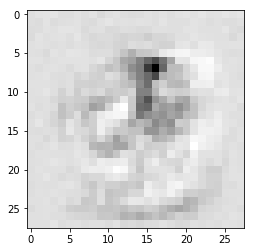

In [183]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 9
# create the output signals for this label
targets = np.zeros(outputNodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = MNISTNN.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')